In [1]:
!pip install Sastrawi deep-translator nltk contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 6.3 MB/s eta 0:00:00


# **IMPORT & LOAD DATA**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import shutil
import time
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from deep_translator import GoogleTranslator
import contractions

# Download NLTK Resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Configuration Paths (KAGGLE)

# 1. Input Datasets (Original)
DATA_DIR = '/kaggle/input/indonesia-presidential-candidates-dataset-2024/Indonesia Presidential Candidates Dataset, 2024/original data'

# 2. External Stopwords/Lexicons
STOPWORD_FILE = '/kaggle/input/indonesian-stoplist/stopwordbahasa.csv'
LEXICON_FILE = '/kaggle/input/colloquial-indonesian-lexicon/colloquial-indonesian-lexicon.csv'

# 3. Pre-computed Datasets (Check if exists to SKIP processing)
# Checks for BOTH Indonesian and English pre-computed files
PRECOMPUTED_DIR = '/kaggle/input/presidential-candidate-translated'

# 4. Output Directory (Working)
PROCESSED_DIR = '/kaggle/working/processed'
PICTURES_DIR = '/kaggle/working/pictures'
LABELED_DIR = '/kaggle/working/labeled'

os.makedirs(PROCESSED_DIR, exist_ok=True)
os.makedirs(PICTURES_DIR, exist_ok=True)
os.makedirs(LABELED_DIR, exist_ok=True)

In [4]:
df_anies = pd.read_csv('/kaggle/input/indonesia-presidential-candidates-dataset-2024/Indonesia Presidential Candidates Dataset, 2024/original data/Anies Baswedan.csv', encoding='latin1')
df_ganjar = pd.read_csv('/kaggle/input/indonesia-presidential-candidates-dataset-2024/Indonesia Presidential Candidates Dataset, 2024/original data/Ganjar Pranowo.csv', encoding='latin1')
df_prabowo = pd.read_csv('/kaggle/input/indonesia-presidential-candidates-dataset-2024/Indonesia Presidential Candidates Dataset, 2024/original data/Prabowo Subianto.csv', encoding='latin1')

print('Datasets loaded successfully.')

Datasets loaded successfully.


# **EDA (Exploratory Data Analysis)**

## Dataset Description

In [5]:
print('--- df_anies Overview ---')
print(df_anies.head())
print('\n')
df_anies.info()
print('\nMissing values in df_anies:\n', df_anies.isnull().sum())

print('\n\n--- df_ganjar Overview ---')
print(df_ganjar.head())
print('\n')
df_ganjar.info()
print('\nMissing values in df_ganjar:\n', df_ganjar.isnull().sum())

print('\n\n--- df_prabowo Overview ---')
print(df_prabowo.head())
print('\n')
df_prabowo.info()
print('\nMissing values in df_prabowo:\n', df_prabowo.isnull().sum())


--- df_anies Overview ---
   ï»¿Unnamed: 0.1                       Date                    Created  \
0                0  2023-04-16 10:04:35+00:00  2023-03-27 08:59:57+00:00   
1                1  2023-04-16 10:00:01+00:00  2012-08-21 07:34:04+00:00   
2                2  2023-04-16 09:14:46+00:00  2011-09-27 05:22:24+00:00   
3                3  2023-04-16 07:03:05+00:00  2017-10-19 12:32:28+00:00   
4                4  2023-04-16 06:03:59+00:00  2022-06-28 07:03:37+00:00   

        User ID  Followers  Following  Tweet Count     Tweet Location  \
0  1.640000e+18        981        531           22                NaN   
1  7.710306e+08      10702        123        30121  Palmerah, Jakarta   
2  3.807551e+08         11         35          230    Jakarta - Utara   
3  9.210000e+17         37         47         2670           Jakarta    
4  1.540000e+18          6        129          766      Lebak, Banten   

                                               Tweet  
0                      

## Text Length Analysis

In [6]:
df_anies['tweet_length'] = df_anies['Tweet'].fillna('').str.len()
df_ganjar['tweet_length'] = df_ganjar['Tweet'].fillna('').str.len()
df_prabowo['tweet_length'] = df_prabowo['Tweet'].fillna('').str.len()

print('--- Descriptive Statistics for Anies Baswedan Tweet Lengths ---')
print(df_anies['tweet_length'].describe())

print('\n--- Descriptive Statistics for Ganjar Pranowo Tweet Lengths ---')
print(df_ganjar['tweet_length'].describe())

print('\n--- Descriptive Statistics for Prabowo Subianto Tweet Lengths ---')
print(df_prabowo['tweet_length'].describe())

--- Descriptive Statistics for Anies Baswedan Tweet Lengths ---
count    10000.00000
mean       128.74150
std         69.98797
min          0.00000
25%         67.00000
50%        129.00000
75%        182.00000
max        290.00000
Name: tweet_length, dtype: float64

--- Descriptive Statistics for Ganjar Pranowo Tweet Lengths ---
count    10000.000000
mean       110.420700
std         67.688237
min          0.000000
25%         57.000000
50%         91.000000
75%        159.000000
max        289.000000
Name: tweet_length, dtype: float64

--- Descriptive Statistics for Prabowo Subianto Tweet Lengths ---
count    10000.000000
mean       124.970000
std         63.347729
min          0.000000
25%         78.000000
50%        120.000000
75%        171.000000
max        297.000000
Name: tweet_length, dtype: float64


## Tweet Length Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


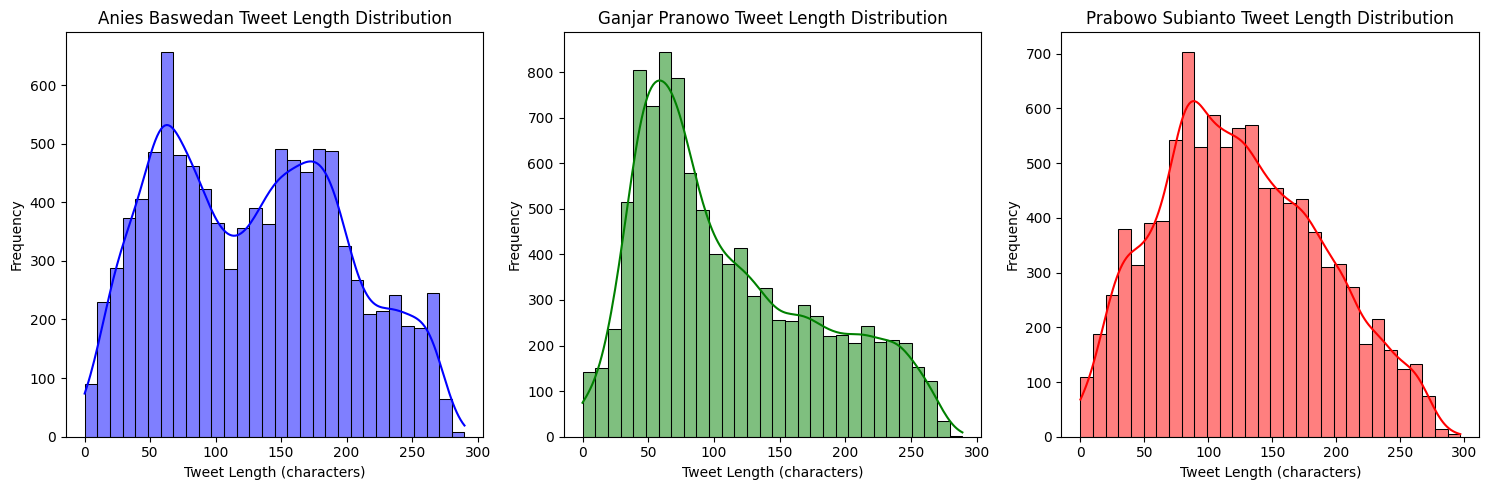

In [7]:
# Buat direktori output untuk gambar jika belum ada
os.makedirs('/kaggle/working/pictures', exist_ok=True)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_anies['tweet_length'], bins=30, kde=True, color='blue')
plt.title('Anies Baswedan Tweet Length Distribution')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_ganjar['tweet_length'], bins=30, kde=True, color='green')
plt.title('Ganjar Pranowo Tweet Length Distribution')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_prabowo['tweet_length'], bins=30, kde=True, color='red')
plt.title('Prabowo Subianto Tweet Length Distribution')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')

plt.tight_layout()

plt.savefig(os.path.join(PICTURES_DIR, 'tweet_length.png'))
plt.show()


## Duplicate Tweets

In [8]:
print('--- Duplicated Tweets for Anies Baswedan ---')
duplicate_anies_tweets = df_anies['Tweet'].value_counts()
duplicate_anies_tweets = duplicate_anies_tweets[duplicate_anies_tweets > 1]
print(duplicate_anies_tweets.head(10))

--- Duplicated Tweets for Anies Baswedan ---
Tweet
anies presiden                                                                                                                            76
anies presiden ri                                                                                                                         40
catetttttt yee druunn asmara anies didu saewad idha sir                                                                                   38
anies ahy insya allah presiden ri dan wakil presiden ri di aamiin                                                                         26
catetttttt yee druunn asmara aja anies didu saewad idha sir                                                                               24
catetttttt yee drunnn asmara aja anies didu saewad idha sir                                                                               21
salam perubahan dan pebaikan untuk indonesia lebih baik demokrat jaya pancasila abadi anies baswedan ah

In [9]:
print('\n--- Duplicated Tweets for Ganjar Pranowo ---')
duplicate_ganjar_tweets = df_ganjar['Tweet'].value_counts()
duplicate_ganjar_tweets = duplicate_ganjar_tweets[duplicate_ganjar_tweets > 1]
print(duplicate_ganjar_tweets.head(10))


--- Duplicated Tweets for Ganjar Pranowo ---
Tweet
makganjar sulawesi selatan berbagi kebaikan                                59
dukung ganjar untuk menjadi presiden pranowo                               50
ganjar pranowo pantas jadi presiden pranowo                                48
bismillah yok pak ganjar for presiden pranowo                              47
kita kawal ganjar for presiden pranowo                                     47
ganjar presiden                                                            32
dukung ganjar presiden ganjar pranowo bersih for ganjar terbaik pranowo    31
ganjar calon presiden pranowo                                              30
ganjar for presiden                                                        30
dukung ganjar pranowo sebagai presiden indonesia tahun pranowo             25
Name: count, dtype: int64


In [10]:
print('--- Duplicated Tweets for Prabowo Subianto ---')
duplicate_prabowo_tweets = df_prabowo['Tweet'].value_counts()
duplicate_prabowo_tweets = duplicate_prabowo_tweets[duplicate_prabowo_tweets > 1]
print(duplicate_prabowo_tweets.head(10))

--- Duplicated Tweets for Prabowo Subianto ---
Tweet
prabowo presiden                                                                                   109
prabowo subianto presiden                                                                           73
saat jalan sehat di samarinda gerindra kaltim dukung prabowo subianto jadi calon presiden           51
al quran allah muhammad anies baswedan presiden prabowo sandiaga uno ustad islam muslim             46
jalan sehat di samarinda gerindra kaltim dukung prabowo subianto jadi calon presiden                44
bismillah pak prabowo subianto presiden                                                             40
gerindra kaltim dukung prabowo subianto jadi calon presiden                                         31
prabowo subianto terbaik presiden                                                                   28
insyaallah mba nana paham sudah bismillah presiden tulis linanta prabowo subianto                   24
update hasil survei 

In [11]:
print('--- Characteristics of Most Duplicated Tweet for Anies Baswedan ---')
most_duplicated_anies_tweet_text = duplicate_anies_tweets.index[0]
print(f"Most duplicated tweet: '{most_duplicated_anies_tweet_text}'")

# Filter df_anies for the most duplicated tweet
filtered_anies_duplicates = df_anies[df_anies['Tweet'] == most_duplicated_anies_tweet_text]

# Display descriptive statistics for relevant columns
print('\nDescriptive statistics for ' + most_duplicated_anies_tweet_text + ' related tweets:')
print(filtered_anies_duplicates[['Followers', 'Following', 'Tweet Count']].describe())

--- Characteristics of Most Duplicated Tweet for Anies Baswedan ---
Most duplicated tweet: 'anies presiden'

Descriptive statistics for anies presiden related tweets:
         Followers    Following   Tweet Count
count    76.000000    76.000000     76.000000
mean    236.000000   502.000000   2976.289474
std     409.978308   609.336645   6765.118334
min       0.000000     2.000000      3.000000
25%      29.000000   151.000000    683.750000
50%      38.000000   250.000000   1036.000000
75%     265.000000   536.000000   2554.250000
max    1880.000000  3052.000000  53907.000000


In [12]:
print('\n--- Characteristics of Most Duplicated Tweet for Ganjar Pranowo ---')
most_duplicated_ganjar_tweet_text = duplicate_ganjar_tweets.index[0]
print(f"Most duplicated tweet: '{most_duplicated_ganjar_tweet_text}'")

# Filter df_ganjar for the most duplicated tweet
filtered_ganjar_duplicates = df_ganjar[df_ganjar['Tweet'] == most_duplicated_ganjar_tweet_text]

# Display descriptive statistics for relevant columns
print('\nDescriptive statistics for ' + most_duplicated_ganjar_tweet_text + ' related tweets:')
print(filtered_ganjar_duplicates[['Followers', 'Following', 'Tweet Count']].describe())


--- Characteristics of Most Duplicated Tweet for Ganjar Pranowo ---
Most duplicated tweet: 'makganjar sulawesi selatan berbagi kebaikan'

Descriptive statistics for makganjar sulawesi selatan berbagi kebaikan related tweets:
       Followers  Following  Tweet Count
count       59.0       59.0         59.0
mean        33.0       33.0        122.0
std          0.0        0.0          0.0
min         33.0       33.0        122.0
25%         33.0       33.0        122.0
50%         33.0       33.0        122.0
75%         33.0       33.0        122.0
max         33.0       33.0        122.0


In [13]:
print('\n--- Characteristics of Most Duplicated Tweet for Prabowo Subianto ---')
most_duplicated_prabowo_tweet_text = duplicate_prabowo_tweets.index[0]
print(f"Most duplicated tweet: '{most_duplicated_prabowo_tweet_text}'")

# Filter df_prabowo for the most duplicated tweet
filtered_prabowo_duplicates = df_prabowo[df_prabowo['Tweet'] == most_duplicated_prabowo_tweet_text]

# Display descriptive statistics for relevant columns
print('\nDescriptive statistics for ' + most_duplicated_prabowo_tweet_text + ' related tweets:')
print(filtered_prabowo_duplicates[['Followers', 'Following', 'Tweet Count']].describe())


--- Characteristics of Most Duplicated Tweet for Prabowo Subianto ---
Most duplicated tweet: 'prabowo presiden'

Descriptive statistics for prabowo presiden related tweets:
          Followers    Following    Tweet Count
count    109.000000   109.000000     109.000000
mean     587.944954   405.550459   10179.990826
std     1802.030449   691.505610   17251.710695
min        0.000000     0.000000       2.000000
25%        5.000000    39.000000     122.000000
50%      448.000000   524.000000   15021.000000
75%      448.000000   524.000000   15021.000000
max    15931.000000  6597.000000  155034.000000


/tmp/ipykernel_20/3998271908.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


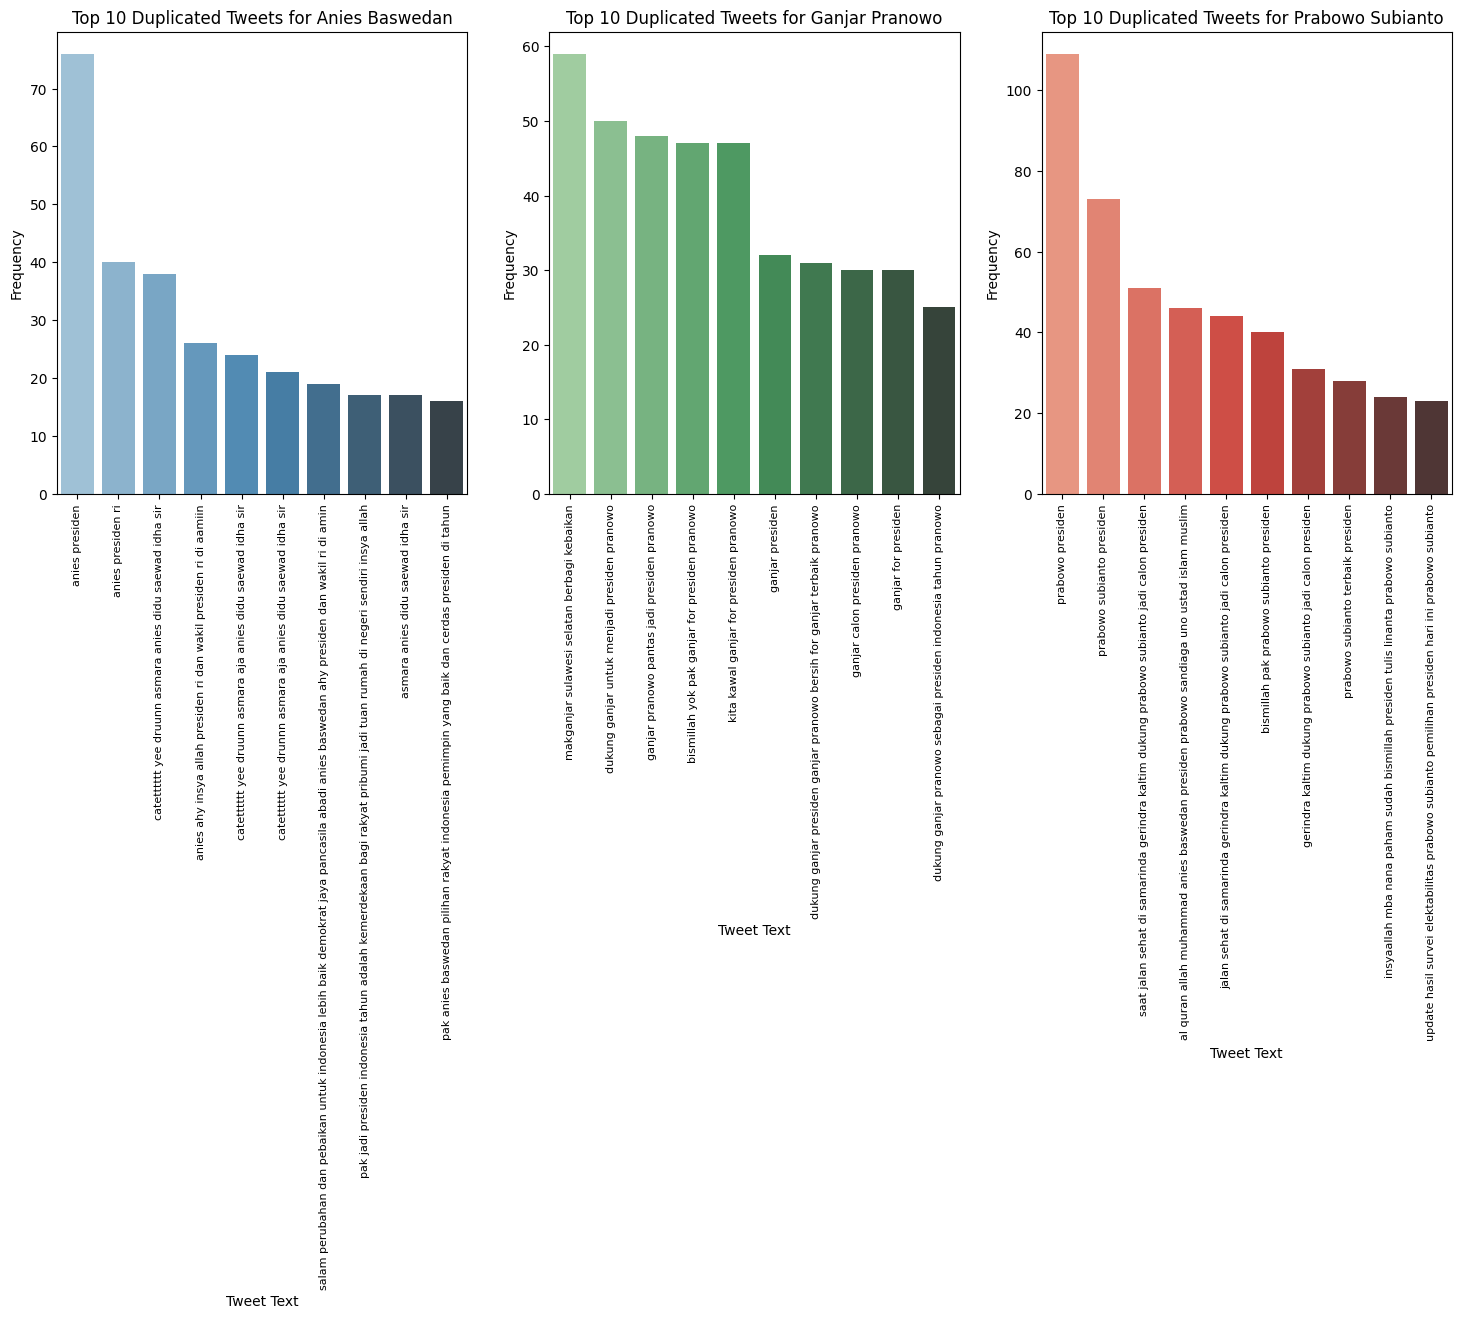

In [14]:
# Buat direktori output untuk gambar jika belum ada
os.makedirs('/kaggle/working/pictures', exist_ok=True)

# Visualize Top 10 Duplicated Tweets for each candidate
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=duplicate_anies_tweets.head(10).index, y=duplicate_anies_tweets.head(10).values, palette='Blues_d')
plt.title('Top 10 Duplicated Tweets for Anies Baswedan')
plt.xlabel('Tweet Text')
plt.ylabel('Frequency')
plt.xticks(rotation=90, fontsize=8)

plt.subplot(1, 3, 2)
sns.barplot(x=duplicate_ganjar_tweets.head(10).index, y=duplicate_ganjar_tweets.head(10).values, palette='Greens_d')
plt.title('Top 10 Duplicated Tweets for Ganjar Pranowo')
plt.xlabel('Tweet Text')
plt.ylabel('Frequency')
plt.xticks(rotation=90, fontsize=8)

plt.subplot(1, 3, 3)
sns.barplot(x=duplicate_prabowo_tweets.head(10).index, y=duplicate_prabowo_tweets.head(10).values, palette='Reds_d')
plt.title('Top 10 Duplicated Tweets for Prabowo Subianto')
plt.xlabel('Tweet Text')
plt.ylabel('Frequency')
plt.xticks(rotation=90, fontsize=8)

plt.tight_layout()

plt.savefig(os.path.join(PICTURES_DIR, 'duplicate_tweets.png'))
plt.show()

## Boxplot

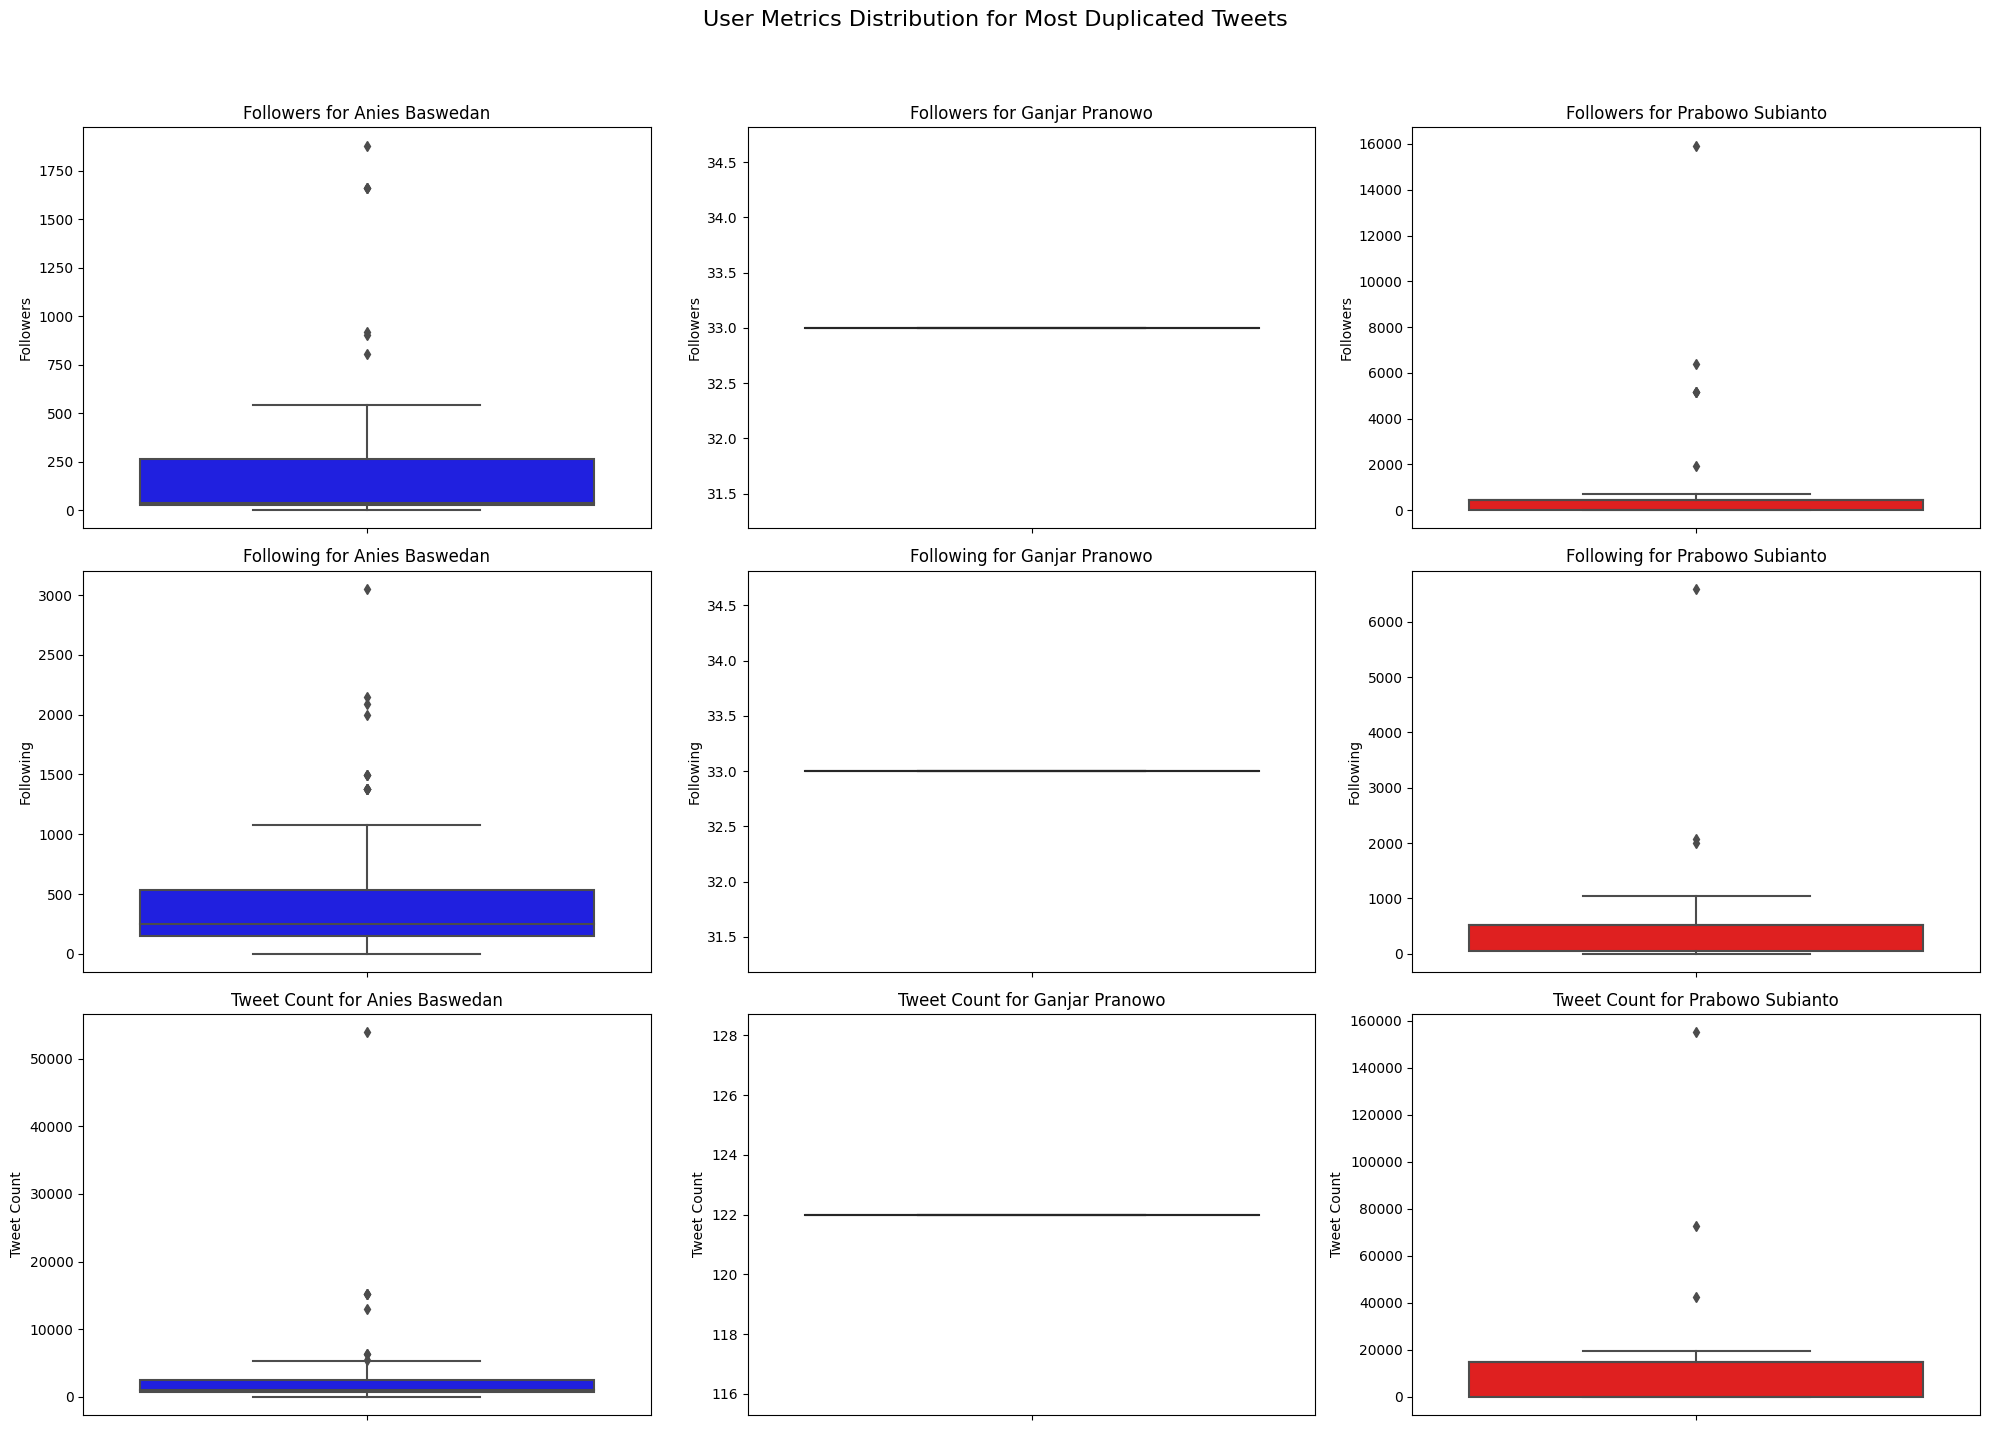

In [15]:
# Buat direktori output untuk gambar jika belum ada
os.makedirs('/kaggle/working/pictures', exist_ok=True)

# Prepare data for plotting
user_metrics = ['Followers', 'Following', 'Tweet Count']
candidates_data = {
    'Anies Baswedan': filtered_anies_duplicates,
    'Ganjar Pranowo': filtered_ganjar_duplicates,
    'Prabowo Subianto': filtered_prabowo_duplicates
}
colors = {'Anies Baswedan': 'blue', 'Ganjar Pranowo': 'green', 'Prabowo Subianto': 'red'}

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle('User Metrics Distribution for Most Duplicated Tweets', fontsize=16)

for i, candidate_name in enumerate(candidates_data.keys()):
    df = candidates_data[candidate_name]
    for j, metric in enumerate(user_metrics):
        sns.boxplot(y=df[metric], ax=axes[j, i], color=colors[candidate_name])
        axes[j, i].set_title(f'{metric} for {candidate_name}')
        axes[j, i].set_ylabel(metric)
        axes[j, i].set_xlabel('') # Remove x-label as there's only one box per subplot

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap

plt.savefig(os.path.join(PICTURES_DIR, 'boxplot.png'))
plt.show()

## Data Cleaning
1.  **Drop Missing Values**: Removing rows where the tweet content is NaN.
2.  **Drop Duplicates**: Removing duplicate tweets to eliminate noise (e.g., buzzers, spam) and ensure the sentiment analysis reflects diverse opinions.

In [16]:
# Function to clean dataframe
def clean_data(df, name):
    print(f"--- Cleaning {name} ---")
    initial_count = len(df)
    
    # 1. Drop NaN
    df_clean = df.dropna(subset=['Tweet'])
    nan_dropped = initial_count - len(df_clean)
    
    # 2. Drop Duplicates
    df_clean = df_clean.drop_duplicates(subset=['Tweet'])
    dup_dropped = initial_count - nan_dropped - len(df_clean)
    
    print(f"Initial: {initial_count}")
    print(f"Dropped NaN: {nan_dropped}")
    print(f"Dropped Duplicates: {dup_dropped}")
    print(f"Final: {len(df_clean)}")
    return df_clean

# Apply cleaning
df_anies = clean_data(df_anies, 'Anies Baswedan')
df_ganjar = clean_data(df_ganjar, 'Ganjar Pranowo')
df_prabowo = clean_data(df_prabowo, 'Prabowo Subianto')

--- Cleaning Anies Baswedan ---
Initial: 10000
Dropped NaN: 66
Dropped Duplicates: 1035
Final: 8899
--- Cleaning Ganjar Pranowo ---
Initial: 10000
Dropped NaN: 115
Dropped Duplicates: 1980
Final: 7905
--- Cleaning Prabowo Subianto ---
Initial: 10000
Dropped NaN: 88
Dropped Duplicates: 3097
Final: 6815


## WordCloud of Stopwords
Visualizing the **stopwords** present in the original tweets. This helps in deciding which words to exclude from the stopword list.

Loaded 757 stopwords.
--- Stopword Cloud for Anies Baswedan ---
Gambar disimpan ke: /kaggle/working/pictures/anies_baswedan_stopword_cloud.png


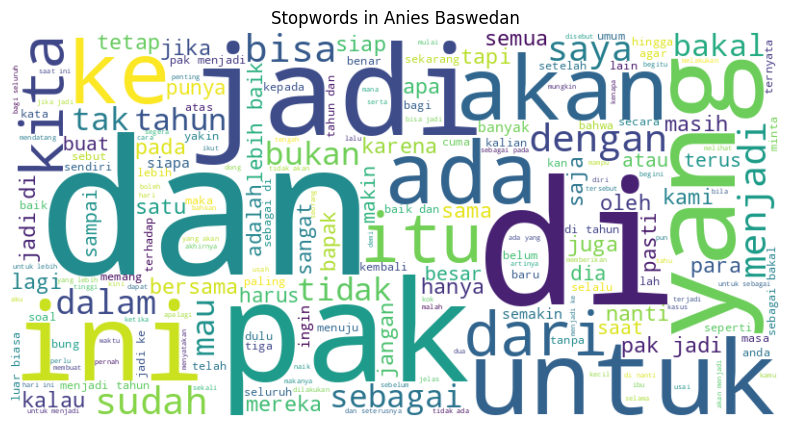

--- Stopword Cloud for Ganjar Pranowo ---
Gambar disimpan ke: /kaggle/working/pictures/ganjar_pranowo_stopword_cloud.png


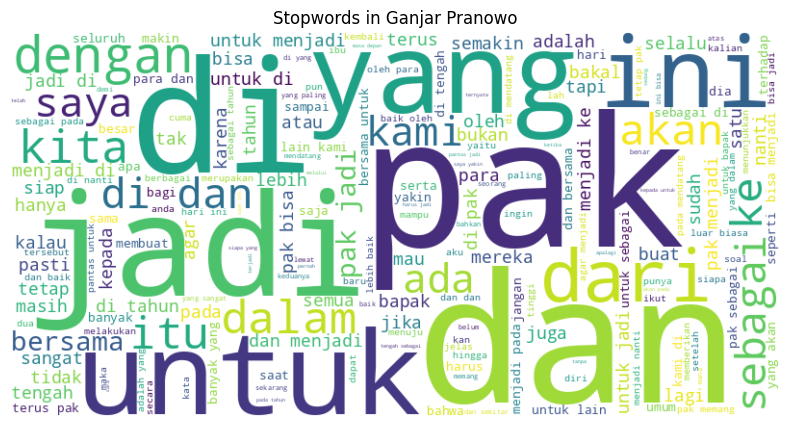

--- Stopword Cloud for Prabowo Subianto ---
Gambar disimpan ke: /kaggle/working/pictures/prabowo_subianto_stopword_cloud.png


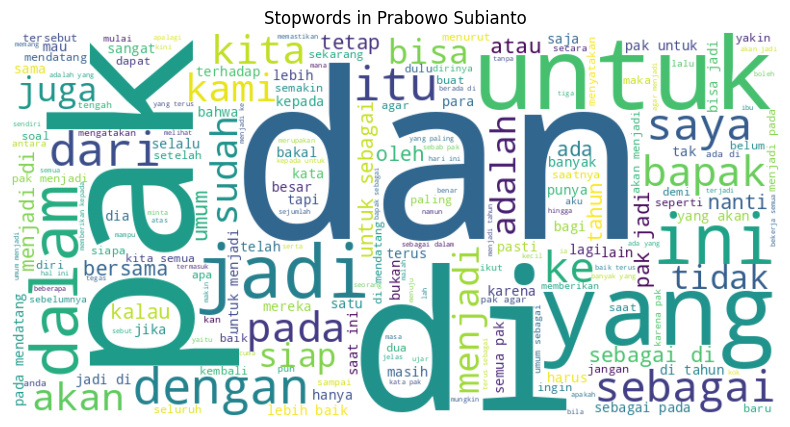

In [17]:
# Buat direktori output untuk gambar jika belum ada
os.makedirs('/kaggle/working/pictures', exist_ok=True)

# Load Stopwords dari CSV
# Kita baca menggunakan pandas, ambil kolom pertama, dan ubah jadi set
try:
    # Coba baca tanpa header (asumsi baris pertama adalah data)
    df_stop = pd.read_csv('/kaggle/input/indonesian-stoplist/stopwordbahasa.csv', header=None)
    stopwords_set = set(df_stop[0].astype(str).str.strip().tolist())
except:
    # Fallback: jika gagal, mungkin ada header, coba baca normal
    df_stop = pd.read_csv('/kaggle/input/indonesian-stoplist/stopwordbahasa.csv')
    stopwords_set = set(df_stop.iloc[:, 0].astype(str).str.strip().tolist())

print(f"Loaded {len(stopwords_set)} stopwords.")

def generate_stopword_cloud(text_series, title):
    # Combine all text
    all_text = ' '.join(text_series.fillna('').astype(str).tolist())
    
    # Filter to keep ONLY stopwords
    words = all_text.lower().split()
    stopword_only_text = ' '.join([word for word in words if word in stopwords_set])
    
    if not stopword_only_text:
        print(f"No stopwords found in {title}.")
        return

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(stopword_only_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Stopwords in {title}')

    # Simpan ke /kaggle/working/pictures dengan nama file yang aman
    safe_filename = title.replace(' ', '_').lower() + '_stopword_cloud.png'
    save_path = os.path.join(PICTURES_DIR, safe_filename)
    plt.savefig(save_path, bbox_inches='tight')
    print(f"Gambar disimpan ke: {save_path}")
    
    plt.show()

print("--- Stopword Cloud for Anies Baswedan ---")
generate_stopword_cloud(df_anies['Tweet'], 'Anies Baswedan')

print("--- Stopword Cloud for Ganjar Pranowo ---")
generate_stopword_cloud(df_ganjar['Tweet'], 'Ganjar Pranowo')

print("--- Stopword Cloud for Prabowo Subianto ---")
generate_stopword_cloud(df_prabowo['Tweet'], 'Prabowo Subianto')

# **PREPROCESSING**

1. **Text Normalization**: Converting slang/colloquial words to formal Indonesian using `colloquial-indonesian-lexicon.csv`.
2. **Stopword Removal**: Removing common words using `tala-stopwords-indonesia.txt`, with specific exclusions (negations, etc.).
3. **Stemming**: Reducing words to their root form using `Sastrawi`.
4. **Branching**: Creating 4 dataset variations for comparison:
    * Normalized + No Stemming
    * Normalized + Stemmed
    * No Normalization + No Stemming
    * No Normalization + Stemmed

## Helper Function

In [18]:
def load_stopwords(filepath):
    # Cek apakah file berupa CSV (Format Kaggle)
    if filepath.endswith('.csv'):
        try:
            # Baca CSV tanpa header, ambil kolom pertama
            df = pd.read_csv(filepath, header=None)
            stopwords = set(df[0].astype(str).str.strip().tolist())
        except:
            # Fallback: jika gagal, coba baca dengan header default
            df = pd.read_csv(filepath)
            stopwords = set(df.iloc[:, 0].astype(str).str.strip().tolist())
    else:
        # Baca file TXT biasa (Format Lokal)
        with open(filepath, 'r') as f:
            stopwords = set(line.strip() for line in f)
    
    # Exclude specific words (Negations, Intensifiers, Modals, Trust)
    excluded_words = {
        'tidak', 'bukan', 'belum', 'jangan', 'tak', 'enggak',
        'lebih', 'kurang', 'terlalu',
        'bisa', 'mampu', 'mau', 'harus',
        'yakin', 'percaya'
    }
    
    # Hapus kata-kata yang dikecualikan dari set stopwords
    return stopwords - excluded_words

def load_normalization_dict(filepath):
    if not os.path.exists(filepath):
        print(f"Lexicon file not found at: {filepath}")
        return {}
    df_lexicon = pd.read_csv(filepath)
    return dict(zip(df_lexicon['slang'], df_lexicon['formal']))

def normalize_text(text, norm_dict):
    if not isinstance(text, str): return str(text)
    words = text.split()
    normalized_words = [norm_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

def remove_stopwords(text, stopwords):
    if not isinstance(text, str): return ""
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return " ".join(filtered_words)

def apply_stemming(text, stemmer):
    if not isinstance(text, str): return ""
    return stemmer.stem(text)

# Load Resources
stopwords_ind = load_stopwords(STOPWORD_FILE)
norm_dict = load_normalization_dict(LEXICON_FILE)
factory = StemmerFactory()
stemmer_ind = factory.create_stemmer()

print(f"Resources loaded: {len(stopwords_ind)} stopwords, {len(norm_dict)} normalization entries.")

Resources loaded: 743 stopwords, 4331 normalization entries.


## Normalization, Stopword Removal, & Stemming

In [19]:
# Execute Indonesian Processing
candidates = {
    'anies': df_anies, 
    'ganjar': df_ganjar, 
    'prabowo': df_prabowo
}

for name, df in candidates.items():
    print(f"Processing Indonesian branches for {name}...")
    
    # Output Paths
    path_cleaned = os.path.join(PROCESSED_DIR, f'{name}_cleaned.csv')
    path_normalized = os.path.join(PROCESSED_DIR, f'{name}_normalized.csv')
    path_stemmed = os.path.join(PROCESSED_DIR, f'{name}_stemmed.csv')
    path_norm_stemmed = os.path.join(PROCESSED_DIR, f'{name}_normalized_stemmed.csv')
    
    # Base: Lowercase
    df_base = df.copy()
    df_base['Tweet'] = df_base['Tweet'].astype(str).str.lower()

    # Check Pre-computed Helper
    def check_precomputed(filename, dest_path):
        src_path = os.path.join(PRECOMPUTED_DIR, filename)
        if os.path.exists(src_path):
            shutil.copy(src_path, dest_path)
            print(f"  Loaded pre-computed: {filename}")
            return True
        return False
    
    # 1. Cleaned
    check_precomputed(f'{name}_cleaned.csv', path_cleaned)

    if not os.path.exists(path_cleaned):
        df_c = df_base.copy()
        df_c['Tweet'] = df_c['Tweet'].apply(lambda x: remove_stopwords(x, stopwords_ind))
        df_c.to_csv(path_cleaned, index=False)
        print(f"  Generated & Saved: {path_cleaned}")
        
    # 2. Normalized
    check_precomputed(f'{name}_normalized.csv', path_normalized)

    if not os.path.exists(path_normalized):
        df_n = df_base.copy()
        df_n['Tweet'] = df_n['Tweet'].apply(lambda x: normalize_text(x, norm_dict))
        df_n['Tweet'] = df_n['Tweet'].apply(lambda x: remove_stopwords(x, stopwords_ind))
        df_n.to_csv(path_normalized, index=False)
        print(f"  Generated & Saved: {path_normalized}")
        
    # 3. Stemmed
    check_precomputed(f'{name}_stemmed.csv', path_stemmed)

    if not os.path.exists(path_stemmed):
        df_s = df_base.copy()
        df_s['Tweet'] = df_s['Tweet'].apply(lambda x: remove_stopwords(x, stopwords_ind))
        df_s['Tweet'] = df_s['Tweet'].apply(lambda x: apply_stemming(x, stemmer_ind))
        df_s.to_csv(path_stemmed, index=False)
        print(f"  Generated & Saved: {path_stemmed}")

    # 4. Normalized + Stemmed (TARGET for InSet Labeling)
    check_precomputed(f'{name}_normalized_stemmed.csv', path_norm_stemmed)

    if not os.path.exists(path_norm_stemmed):
        df_ns = df_base.copy()
        df_ns['Tweet'] = df_ns['Tweet'].apply(lambda x: normalize_text(x, norm_dict))
        df_ns['Tweet'] = df_ns['Tweet'].apply(lambda x: remove_stopwords(x, stopwords_ind))
        df_ns['Tweet'] = df_ns['Tweet'].apply(lambda x: apply_stemming(x, stemmer_ind))
        df_ns.to_csv(path_norm_stemmed, index=False)
        print(f"  Generated & Saved: {path_norm_stemmed}")

Processing Indonesian branches for anies...
  Loaded pre-computed: anies_cleaned.csv
  Loaded pre-computed: anies_normalized.csv
  Loaded pre-computed: anies_stemmed.csv
  Loaded pre-computed: anies_normalized_stemmed.csv
Processing Indonesian branches for ganjar...
  Loaded pre-computed: ganjar_cleaned.csv
  Loaded pre-computed: ganjar_normalized.csv
  Loaded pre-computed: ganjar_stemmed.csv
  Loaded pre-computed: ganjar_normalized_stemmed.csv
Processing Indonesian branches for prabowo...
  Loaded pre-computed: prabowo_cleaned.csv
  Loaded pre-computed: prabowo_normalized.csv
  Loaded pre-computed: prabowo_stemmed.csv
  Loaded pre-computed: prabowo_normalized_stemmed.csv


## VADER Preprocessing
To use the VADER lexicon (which is natively English), we need to:
1.  **Translate** the tweets from Indonesian to English.
2.  **Preprocess** the English text (Normalize, Remove Stopwords, Stem).

In [20]:
# Initialize English tools
english_stopwords = set(stopwords.words('english'))
english_stemmer = SnowballStemmer('english')
translator = GoogleTranslator(source='id', target='en')

In [21]:
def translate_text(text):
    if not isinstance(text, str) or text.strip() == "":
        return ""
    try:
        # Basic cleaning before translation to reduce errors
        text = text.replace('\n', ' ').strip()
        return translator.translate(text)
    except Exception as e:
        print(f"Translation error: {e}")
        return text # Return original if fail

def preprocess_english(text):
    if not isinstance(text, str): return ""
    # 1. Lowercase
    text = text.lower()
    # 2. Fix Contractions (e.g., "don't" -> "do not")
    text = contractions.fix(text)
    # 3. Remove Stopwords
    words = text.split()
    words = [w for w in words if w not in english_stopwords]
    # 4. Stemming
    words = [english_stemmer.stem(w) for w in words]
    return ' '.join(words)

In [22]:
for name, df in candidates.items():
    print(f"Processing English branch for {name}...")
    output_path = os.path.join(PROCESSED_DIR, f'{name}_english_processed.csv')
    
    # A. Check Pre-computed in Input
    precomputed_path = os.path.join(PRECOMPUTED_DIR, f'{name}_english_processed.csv')
    
    if os.path.exists(precomputed_path):
        print(f"  Found pre-computed file in Input: {precomputed_path}")
        print(f"  Copying to Working directory...")
        shutil.copy(precomputed_path, output_path)
        print(f"  Skipping translation (Using pre-computed).")
        continue
        
    # B. If not found, run Translation (Resumable)
    # Note: Kaggle resets /working, so resumption works mostly if user specifically uploads partial.
    # But good to have logic.
    
    df_eng = df.copy()
    total_tweets = len(df_eng)
    start_index = 0
    
    if os.path.exists(output_path):
        try:
            df_exist = pd.read_csv(output_path)
            start_index = len(df_exist)
            print(f"  Resuming from index {start_index}...")
        except: pass
        
    if start_index >= total_tweets:
        continue
        
    BATCH_SIZE = 50
    print(f"  Translating {total_tweets - start_index} tweets...")
    
    for i in range(start_index, total_tweets, BATCH_SIZE):
        batch = df_eng.iloc[i:i+BATCH_SIZE].copy()
        batch['Tweet_English'] = batch['Tweet'].apply(translate_text)
        batch['Tweet_English_Clean'] = batch['Tweet_English'].apply(preprocess_english)
        
        # Save
        mode = 'w' if i == 0 else 'a'
        header = True if i == 0 else False
        batch.to_csv(output_path, index=False, mode=mode, header=header)
        
        time.sleep(1)
        if i % 500 == 0: print(f"    Batch {i} done.")

Processing English branch for anies...
  Found pre-computed file in Input: /kaggle/input/presidential-candidate-translated/anies_english_processed.csv
  Copying to Working directory...
  Skipping translation (Using pre-computed).
Processing English branch for ganjar...
  Found pre-computed file in Input: /kaggle/input/presidential-candidate-translated/ganjar_english_processed.csv
  Copying to Working directory...
  Skipping translation (Using pre-computed).
Processing English branch for prabowo...
  Found pre-computed file in Input: /kaggle/input/presidential-candidate-translated/prabowo_english_processed.csv
  Copying to Working directory...
  Skipping translation (Using pre-computed).


# **LABELING**
1. **InSet Lexicon**: For Indonesian (Normalized+Stemmed).
2. **VADER Lexicon**: For English.

## InSet Labeling

In [23]:
# Load InSet
def load_inset(pos_path, neg_path):
    lexicon = {}
    try:
        pos = pd.read_csv(pos_path, sep='\t')
        neg = pd.read_csv(neg_path, sep='\t')
        for _, r in pos.iterrows(): lexicon[r['word']] = r['weight']
        for _, r in neg.iterrows(): lexicon[r['word']] = r['weight']
    except Exception as e:
        print(f"Error loading InSet: {e}")
    return lexicon

inset_lexicon = load_inset(
    '/kaggle/input/indo-sentiment-lexicon/positive.tsv', 
    '/kaggle/input/indo-sentiment-lexicon/negative.tsv'
)
print(f"Loaded InSet Lexicon with {len(inset_lexicon)} words.")

# InSet Labeling Function
def label_inset(text, lexicon):
    score = 0
    if isinstance(text, str):
        for word in text.split():
            score += lexicon.get(word, 0)
    return 1 if score > 0 else (0 if score < 0 else -1)

# Execution
for name in ['anies', 'ganjar', 'prabowo']:
    print(f"Labeling {name}...")
    # 1. InSet (On Normalized Stemmed)
    path_ns_in = os.path.join(PROCESSED_DIR, f'{name}_normalized_stemmed.csv')
    path_ns_out = os.path.join(LABELED_DIR, f'{name}_normalized_stemmed.csv')
    
    if os.path.exists(path_ns_in):
        df = pd.read_csv(path_ns_in)
        df['Label_InSet'] = df['Tweet'].apply(lambda x: label_inset(x, inset_lexicon))
        df.to_csv(path_ns_out, index=False)
        print(f"  InSet applied. Saved to {path_ns_out}")

Loaded InSet Lexicon with 9074 words.
Labeling anies...
  InSet applied. Saved to /kaggle/working/labeled/anies_normalized_stemmed.csv
Labeling ganjar...
  InSet applied. Saved to /kaggle/working/labeled/ganjar_normalized_stemmed.csv
Labeling prabowo...
  InSet applied. Saved to /kaggle/working/labeled/prabowo_normalized_stemmed.csv


## VADER Labeling

In [24]:
# Load VADER
analyzer = SentimentIntensityAnalyzer()

# VADER Labeling Function
def label_vader(text):
    if not isinstance(text, str): return -1
    score = analyzer.polarity_scores(text)['compound']
    return 1 if score >= 0.05 else (0 if score <= -0.05 else -1)

# Execution
for name in ['anies', 'ganjar', 'prabowo']:
    print(f"Labeling {name}...")
    # 2. VADER (On English)
    path_eng_in = os.path.join(PROCESSED_DIR, f'{name}_english_processed.csv')
    path_eng_out = os.path.join(LABELED_DIR, f'{name}_english_processed.csv')
    
    if os.path.exists(path_eng_in):
        df = pd.read_csv(path_eng_in)
        # Check if Tweet_English_Clean exists, else use Tweet_English
        col = 'Tweet_English_Clean' if 'Tweet_English_Clean' in df.columns else 'Tweet_English'
        df['Label_VADER'] = df[col].apply(label_vader)
        df.to_csv(path_eng_out, index=False)
        print(f"  VADER applied. Saved to {path_eng_out}")

Labeling anies...
  VADER applied. Saved to /kaggle/working/labeled/anies_english_processed.csv
Labeling ganjar...
  VADER applied. Saved to /kaggle/working/labeled/ganjar_english_processed.csv
Labeling prabowo...
  VADER applied. Saved to /kaggle/working/labeled/prabowo_english_processed.csv


## Label Visualization

Generating Percentage Histograms...


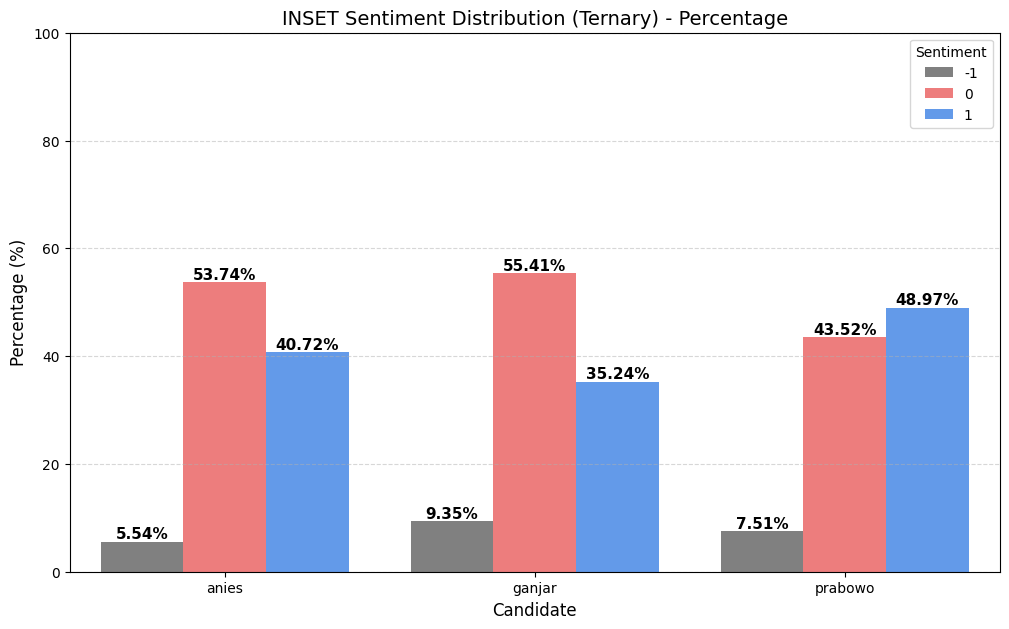

Saved inset_ternary_percentage.png


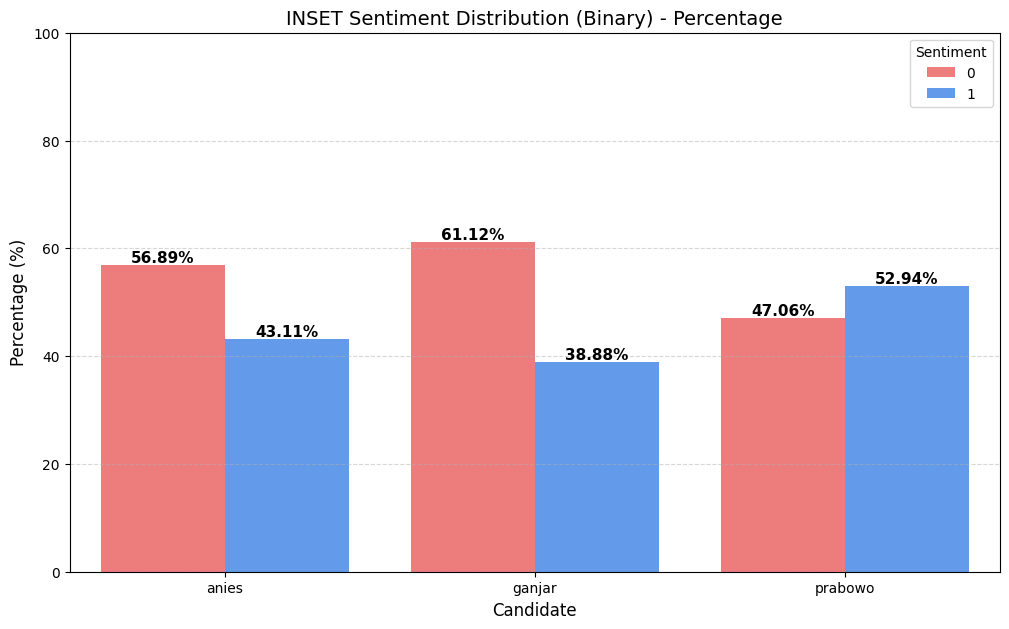

Saved inset_binary_percentage.png


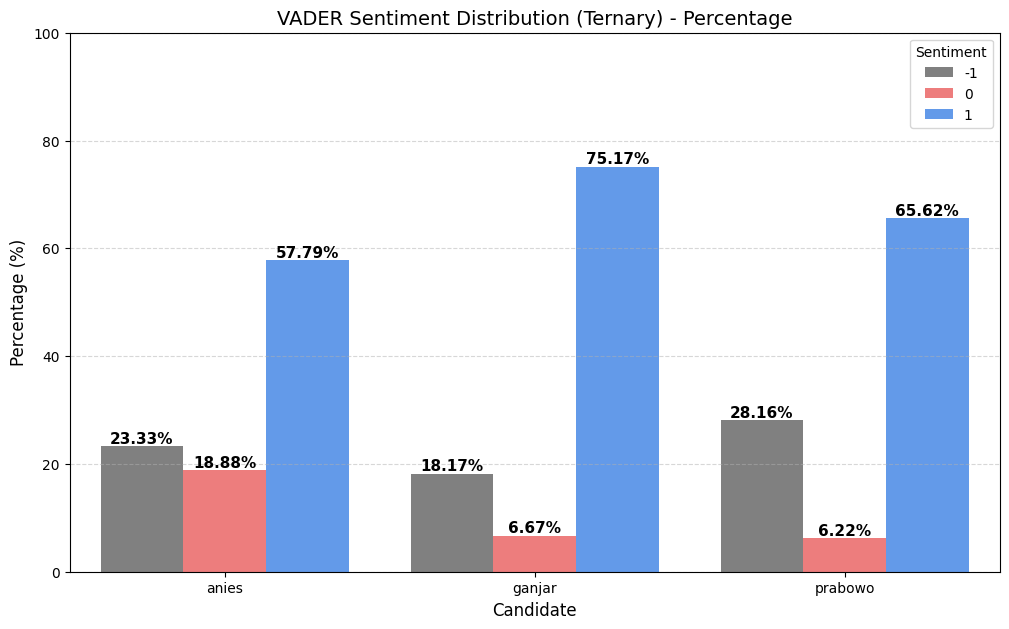

Saved vader_ternary_percentage.png


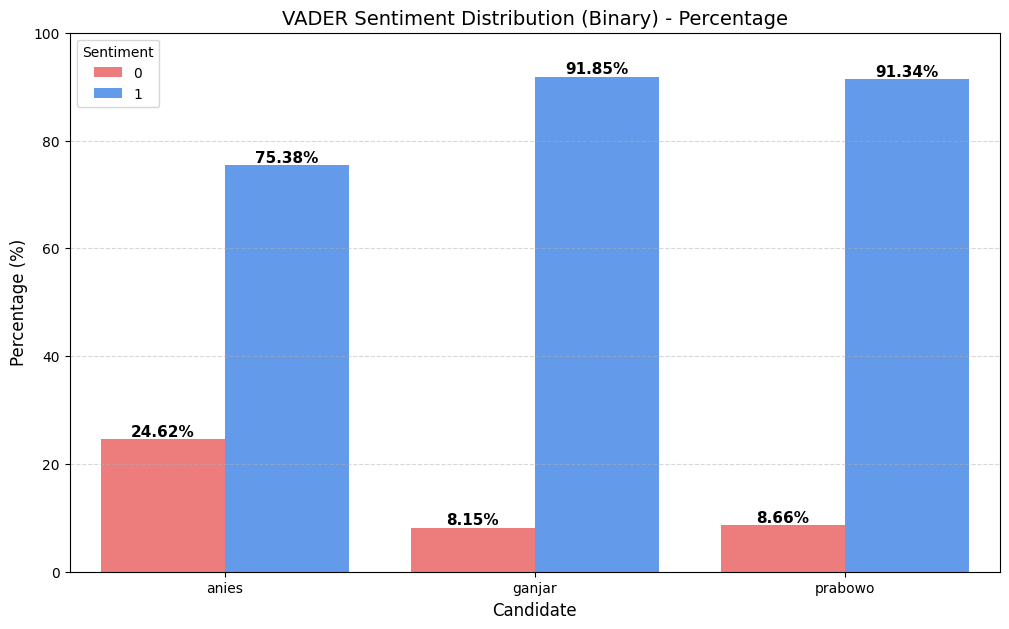

Saved vader_binary_percentage.png
Visualization Compelte.


In [25]:
# **BINARY REFINEMENT & VISUALIZATION (PERCENTAGE)**

# Container for visualization data
vis_data_inset = []
vis_data_vader = []

for name in ['anies', 'ganjar', 'prabowo']:
    # --- InSet ---
    input_path_inset = os.path.join(LABELED_DIR, f'{name}_normalized_stemmed.csv')
    if os.path.exists(input_path_inset):
        df = pd.read_csv(input_path_inset)
        
        # Save Binary (Drop Neutral -1)
        df_binary = df[df['Label_InSet'] != -1].copy()
        df_binary.to_csv(os.path.join(LABELED_DIR, f'{name}_inset_binary.csv'), index=False)
        
        # Add to vis data
        df['Candidate'] = name
        vis_data_inset.append(df[['Candidate', 'Label_InSet']])

    # --- VADER ---
    input_path_vader = os.path.join(LABELED_DIR, f'{name}_english_processed.csv')
    if os.path.exists(input_path_vader):
        df = pd.read_csv(input_path_vader)
        
        # Save Binary (Drop Neutral -1)
        df_binary = df[df['Label_VADER'] != -1].copy()
        df_binary.to_csv(os.path.join(LABELED_DIR, f'{name}_vader_binary.csv'), index=False)
        
         # Add to vis data
        df['Candidate'] = name
        vis_data_vader.append(df[['Candidate', 'Label_VADER']])

# --- Improved Visualization Function ---
def plot_percentage_histogram(data_list, method_name, label_col):
    if not data_list:
        return
    
    df_all = pd.concat(data_list)
    
    # Define variants to plot: Ternary (with -1) and Binary (without -1)
    variants = [
        {'title': 'Ternary', 'df': df_all, 'palette': {-1: 'gray', 0: '#FF6B6B', 1: '#4D96FF'}},
        {'title': 'Binary', 'df': df_all[df_all[label_col] != -1], 'palette': {0: '#FF6B6B', 1: '#4D96FF'}}
    ]
    
    for var in variants:
        df_curr = var['df']
        if df_curr.empty: continue

        # Calculate Percentages
        # Group by Candidate and Label -> Count -> Transform to %
        counts = df_curr.groupby(['Candidate', label_col]).size().reset_index(name='Count')
        total_per_candidate = df_curr.groupby('Candidate').size().reset_index(name='Total')
        
        merged = pd.merge(counts, total_per_candidate, on='Candidate')
        merged['Percentage'] = (merged['Count'] / merged['Total']) * 100
        merged['Percentage'] = merged['Percentage'].round(2)
        
        # Plotting
        plt.figure(figsize=(12, 7))
        ax = sns.barplot(x='Candidate', y='Percentage', hue=label_col, data=merged, palette=var['palette'])
        
        plt.title(f'{method_name.upper()} Sentiment Distribution ({var["title"]}) - Percentage', fontsize=14)
        plt.xlabel('Candidate', fontsize=12)
        plt.ylabel('Percentage (%)', fontsize=12)
        plt.ylim(0, 100) # Fix scale 0-100%
        plt.legend(title='Sentiment')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        
        # Annotations (Text on bars)
        for p in ax.patches:
            if p.get_height() > 0:
                ax.annotate(f'{p.get_height():.2f}%',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')
        
        filename = f'{method_name.lower()}_{var["title"].lower()}_percentage.png'
        plt.savefig(os.path.join(PICTURES_DIR, filename))
        plt.show()
        print(f"Saved {filename}")

# Run Visualization
print("Generating Percentage Histograms...")
plot_percentage_histogram(vis_data_inset, 'InSet', 'Label_InSet')
plot_percentage_histogram(vis_data_vader, 'VADER', 'Label_VADER')
print("Visualization Compelte.")

In [26]:
os.listdir(LABELED_DIR)

['anies_normalized_stemmed.csv',
 'ganjar_english_processed.csv',
 'anies_vader_binary.csv',
 'ganjar_vader_binary.csv',
 'prabowo_english_processed.csv',
 'anies_inset_binary.csv',
 'ganjar_inset_binary.csv',
 'prabowo_vader_binary.csv',
 'prabowo_normalized_stemmed.csv',
 'anies_english_processed.csv',
 'ganjar_normalized_stemmed.csv',
 'prabowo_inset_binary.csv']

# **FEATURE EXTRACTION**

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle

print("=" * 60)
print("FEATURE EXTRACTION - TF-IDF")
print("=" * 60)

# Function to load and prepare dataset
def load_labeled_data(method='inset'):
    """
    Load labeled data for all candidates
    method: 'inset' or 'vader'
    """
    dfs = []
    for name in ['anies', 'ganjar', 'prabowo']:
        if method == 'inset':
            path = os.path.join(LABELED_DIR, f'{name}_inset_binary.csv')
            label_col = 'Label_InSet'
            text_col = 'Tweet'
        else:
            path = os.path.join(LABELED_DIR, f'{name}_vader_binary.csv')
            label_col = 'Label_VADER'
            text_col = 'Tweet_English_Clean'
        
        if os.path.exists(path):
            df = pd.read_csv(path)
            df['Candidate'] = name
            # Rename text column to 'Tweet' for consistency
            if text_col != 'Tweet':
                df['Tweet'] = df[text_col]
            dfs.append(df[['Tweet', label_col, 'Candidate']])
    
    if not dfs:
        print(f"No {method} labeled data found!")
        return None
    
    combined_df = pd.concat(dfs, ignore_index=True)
    print(f"\n{method.upper()} Dataset loaded:")
    print(f"Total samples: {len(combined_df)}")
    print(f"Label distribution:\n{combined_df[label_col].value_counts()}")
    return combined_df

# Load InSet labeled data (Indonesian - Normalized + Stemmed)
df_inset = load_labeled_data(method='inset')

# Load VADER labeled data (English)
df_vader = load_labeled_data(method='vader')

# Feature Extraction Function
def extract_tfidf_features(df, label_col, text_col='Tweet', max_features=5000, ngram_range=(1, 2)):
    """
    Extract TF-IDF features from text data
    """
    print(f"\n--- Extracting TF-IDF Features ---")
    print(f"Max features: {max_features}")
    print(f"N-gram range: {ngram_range}")
    
    # Prepare data
    X = df[text_col].fillna('')
    y = df[label_col]
    
    # Initialize TF-IDF Vectorizer
    tfidf = TfidfVectorizer(
        max_features=max_features,
        ngram_range=ngram_range,
        min_df=2,  # Ignore terms that appear in less than 2 documents
        max_df=0.95,  # Ignore terms that appear in more than 95% of documents
        sublinear_tf=True  # Apply sublinear tf scaling
    )
    
    # Fit and transform
    X_tfidf = tfidf.fit_transform(X)
    
    print(f"TF-IDF shape: {X_tfidf.shape}")
    print(f"Vocabulary size: {len(tfidf.vocabulary_)}")
    
    return X_tfidf, y, tfidf

# Extract features for InSet (Indonesian)
if df_inset is not None:
    print("\n" + "=" * 60)
    print("INDONESIAN TEXT (InSet Labeling)")
    print("=" * 60)
    X_inset, y_inset, tfidf_inset = extract_tfidf_features(
        df_inset, 
        label_col='Label_InSet',
        max_features=5000,
        ngram_range=(1, 2)
    )
    
    # Save TF-IDF vectorizer for later use
    with open(os.path.join(PROCESSED_DIR, 'tfidf_inset.pkl'), 'wb') as f:
        pickle.dump(tfidf_inset, f)
    print("✓ TF-IDF vectorizer saved (InSet)")
    
    # Display top features
    feature_names = tfidf_inset.get_feature_names_out()
    print(f"\nSample features: {list(feature_names[:20])}")

# Extract features for VADER (English)  
if df_vader is not None:
    print("\n" + "=" * 60)
    print("ENGLISH TEXT (VADER Labeling)")
    print("=" * 60)
    X_vader, y_vader, tfidf_vader = extract_tfidf_features(
        df_vader,
        label_col='Label_VADER', 
        text_col='Tweet',  # Already renamed in load_labeled_data()
        max_features=5000,
        ngram_range=(1, 2)
    )
    
    # Save TF-IDF vectorizer
    with open(os.path.join(PROCESSED_DIR, 'tfidf_vader.pkl'), 'wb') as f:
        pickle.dump(tfidf_vader, f)
    print("✓ TF-IDF vectorizer saved (VADER)")
    
    # Display top features
    feature_names = tfidf_vader.get_feature_names_out()
    print(f"\nSample features: {list(feature_names[:20])}")

# Train-Test Split
def split_dataset(X, y, test_size=0.2, random_state=42):
    """
    Split dataset into training and testing sets
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )
    
    print(f"\nTrain-Test Split:")
    print(f"Training samples: {X_train.shape[0]}")
    print(f"Testing samples: {X_test.shape[0]}")
    print(f"Train label distribution:\n{pd.Series(y_train).value_counts()}")
    print(f"Test label distribution:\n{pd.Series(y_test).value_counts()}")
    
    return X_train, X_test, y_train, y_test

# Split InSet dataset
if df_inset is not None:
    print("\n" + "=" * 60)
    print("SPLITTING INSET DATASET")
    print("=" * 60)
    X_train_inset, X_test_inset, y_train_inset, y_test_inset = split_dataset(X_inset, y_inset)
    
    # Save splits
    import scipy.sparse as sp
    sp.save_npz(os.path.join(PROCESSED_DIR, 'X_train_inset.npz'), X_train_inset)
    sp.save_npz(os.path.join(PROCESSED_DIR, 'X_test_inset.npz'), X_test_inset)
    pd.Series(y_train_inset).to_csv(os.path.join(PROCESSED_DIR, 'y_train_inset.csv'), index=False, header=['label'])
    pd.Series(y_test_inset).to_csv(os.path.join(PROCESSED_DIR, 'y_test_inset.csv'), index=False, header=['label'])
    print("✓ InSet splits saved")

# Split VADER dataset
if df_vader is not None:
    print("\n" + "=" * 60)
    print("SPLITTING VADER DATASET")
    print("=" * 60)
    X_train_vader, X_test_vader, y_train_vader, y_test_vader = split_dataset(X_vader, y_vader)
    
    # Save splits
    sp.save_npz(os.path.join(PROCESSED_DIR, 'X_train_vader.npz'), X_train_vader)
    sp.save_npz(os.path.join(PROCESSED_DIR, 'X_test_vader.npz'), X_test_vader)
    pd.Series(y_train_vader).to_csv(os.path.join(PROCESSED_DIR, 'y_train_vader.csv'), index=False, header=['label'])
    pd.Series(y_test_vader).to_csv(os.path.join(PROCESSED_DIR, 'y_test_vader.csv'), index=False, header=['label'])
    print("✓ VADER splits saved")

print("\n" + "=" * 60)
print("FEATURE EXTRACTION COMPLETED")
print("=" * 60)

FEATURE EXTRACTION - TF-IDF

INSET Dataset loaded:
Total samples: 21875
Label distribution:
Label_InSet
0    12128
1     9747
Name: count, dtype: int64

VADER Dataset loaded:
Total samples: 18188
Label distribution:
Label_VADER
1    15557
0     2631
Name: count, dtype: int64

INDONESIAN TEXT (InSet Labeling)

--- Extracting TF-IDF Features ---
Max features: 5000
N-gram range: (1, 2)
TF-IDF shape: (21875, 5000)
Vocabulary size: 5000
✓ TF-IDF vectorizer saved (InSet)

Sample features: ['aalamiin', 'aalamiin moga', 'aalona', 'aamiinn', 'ab', 'abad', 'abad nu', 'abadi', 'abadi anies', 'abah', 'abai', 'abal', 'abang', 'abang becak', 'abdi', 'abdul', 'abu', 'abu janda', 'abud', 'abw']

ENGLISH TEXT (VADER Labeling)

--- Extracting TF-IDF Features ---
Max features: 5000
N-gram range: (1, 2)
TF-IDF shape: (18188, 5000)
Vocabulary size: 5000
✓ TF-IDF vectorizer saved (VADER)

Sample features: ['2018', 'aalamiin', 'aalona', 'aamiin', 'abdul', 'abil', 'abl', 'abl becom', 'abl bring', 'abl continu

# **CLASSIFICATION MODELING**

In [28]:
from sklearn.model_selection import GridSearchCV

def tune_model(model, param_grid, X_train, y_train, model_name, candidate_name=''):
    print(f"\n🔍 Running HPT for {model_name} ...")
    
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='f1_weighted',
        cv=3,
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )
    
    grid.fit(X_train, y_train)
    
    print(f"✓ Best params for {model_name}: {grid.best_params_}")
    print(f"✓ Best score: {grid.best_score_:.4f}")
    
    # Create results DataFrame
    cv_results = pd.DataFrame(grid.cv_results_)
    
    # Display top 5 configurations
    print(f"\n📊 Top 5 Configurations for {model_name}:")
    top_results = cv_results.nlargest(5, 'mean_test_score')[
        ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
    ]
    print(top_results.to_string(index=False))
    
    # Visualize HPT results
    visualize_hpt_results(cv_results, model_name, candidate_name, param_grid)
    
    return grid.best_estimator_, cv_results

def visualize_hpt_results(cv_results, model_name, candidate_name, param_grid):
    """Visualize hyperparameter tuning results"""
    
    # Extract parameter columns
    param_cols = [col for col in cv_results.columns if col.startswith('param_')]
    
    if len(param_cols) == 0:
        return
    
    # Create visualization based on number of parameters
    if len(param_cols) == 1:
        # Single parameter - bar plot
        param_name = param_cols[0].replace('param_', '')
        
        plt.figure(figsize=(10, 6))
        
        # Sort by parameter value
        plot_data = cv_results.sort_values(param_cols[0])
        x_labels = [str(val) for val in plot_data[param_cols[0]]]
        
        bars = plt.bar(range(len(x_labels)), plot_data['mean_test_score'], 
                       color='skyblue', alpha=0.8, edgecolor='navy')
        plt.errorbar(range(len(x_labels)), plot_data['mean_test_score'], 
                    yerr=plot_data['std_test_score'], fmt='none', 
                    color='red', capsize=5, alpha=0.6)
        
        # Highlight best
        best_idx = plot_data['mean_test_score'].idxmax()
        best_pos = list(plot_data.index).index(best_idx)
        bars[best_pos].set_color('gold')
        bars[best_pos].set_edgecolor('darkgoldenrod')
        bars[best_pos].set_linewidth(2)
        
        plt.xlabel(param_name, fontsize=12, fontweight='bold')
        plt.ylabel('Mean F1-Score (CV)', fontsize=12, fontweight='bold')
        plt.title(f'HPT Results: {model_name}\n{candidate_name}', fontsize=14, fontweight='bold')
        plt.xticks(range(len(x_labels)), x_labels, rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        
        # Save
        safe_name = f"hpt_{candidate_name}_{model_name}".replace(' ', '_').replace('(', '').replace(')', '').lower()
        plt.savefig(os.path.join(PICTURES_DIR, f'{safe_name}.png'), dpi=150, bbox_inches='tight')
        plt.show()
        
    elif len(param_cols) == 2:
        # Two parameters - heatmap
        param1 = param_cols[0].replace('param_', '')
        param2 = param_cols[1].replace('param_', '')
        
        # Create pivot table
        pivot_data = cv_results.pivot_table(
            values='mean_test_score',
            index=param_cols[0],
            columns=param_cols[1],
            aggfunc='mean'
        )
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(pivot_data, annot=True, fmt='.4f', cmap='YlGnBu', 
                    cbar_kws={'label': 'Mean F1-Score'}, linewidths=0.5)
        plt.xlabel(param2, fontsize=12, fontweight='bold')
        plt.ylabel(param1, fontsize=12, fontweight='bold')
        plt.title(f'HPT Heatmap: {model_name}\n{candidate_name}', fontsize=14, fontweight='bold')
        plt.tight_layout()
        
        # Save
        safe_name = f"hpt_{candidate_name}_{model_name}".replace(' ', '_').replace('(', '').replace(')', '').lower()
        plt.savefig(os.path.join(PICTURES_DIR, f'{safe_name}.png'), dpi=150, bbox_inches='tight')
        plt.show()
        
    else:
        # Multiple parameters - parallel coordinates plot
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Plot 1: Score distribution
        axes[0].hist(cv_results['mean_test_score'], bins=20, color='skyblue', edgecolor='navy', alpha=0.7)
        axes[0].axvline(cv_results['mean_test_score'].max(), color='red', linestyle='--', 
                       linewidth=2, label=f"Best: {cv_results['mean_test_score'].max():.4f}")
        axes[0].set_xlabel('Mean F1-Score', fontsize=11, fontweight='bold')
        axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
        axes[0].set_title(f'Score Distribution: {model_name}', fontsize=12, fontweight='bold')
        axes[0].legend()
        axes[0].grid(alpha=0.3)
        
        # Plot 2: Top vs Bottom configurations
        top_5 = cv_results.nlargest(5, 'mean_test_score')
        bottom_5 = cv_results.nsmallest(5, 'mean_test_score')
        
        x_pos = range(5)
        axes[1].barh(x_pos, top_5['mean_test_score'].values, color='green', alpha=0.6, label='Top 5')
        axes[1].barh([i+6 for i in x_pos], bottom_5['mean_test_score'].values, color='red', alpha=0.6, label='Bottom 5')
        
        axes[1].set_yticks(list(x_pos) + [i+6 for i in x_pos])
        axes[1].set_yticklabels([f"Top {i+1}" for i in x_pos] + [f"Bottom {i+1}" for i in x_pos], fontsize=9)
        axes[1].set_xlabel('Mean F1-Score', fontsize=11, fontweight='bold')
        axes[1].set_title(f'Best vs Worst: {model_name}', fontsize=12, fontweight='bold')
        axes[1].legend()
        axes[1].grid(axis='x', alpha=0.3)
        
        plt.suptitle(f'HPT Analysis: {candidate_name}', fontsize=14, fontweight='bold', y=1.02)
        plt.tight_layout()
        
        # Save
        safe_name = f"hpt_{candidate_name}_{model_name}".replace(' ', '_').replace('(', '').replace(')', '').lower()
        plt.savefig(os.path.join(PICTURES_DIR, f'{safe_name}.png'), dpi=150, bbox_inches='tight')
        plt.show()

2025-12-08 17:24:52.187018: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765214692.374430      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765214692.441526      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

CLASSIFICATION MODELING - PER CANDIDATE

TRAINING MODELS FOR: ANIES

############################################################
INSET METHOD - ANIES
############################################################

ANIES - INSET Dataset:
Total samples: 8406
Label distribution: {0: 4782, 1: 3624}

############################################################
TRAINING MODELS - Anies (InSet)
############################################################

[1/5] Training Multinomial Naive Bayes...

🔍 Running HPT for Naive Bayes ...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
✓ Best params for Naive Bayes: {'alpha': 2.0}
✓ Best score: 0.8099

📊 Top 5 Configurations for Naive Bayes:
        params  mean_test_score  std_test_score  rank_test_score
{'alpha': 2.0}         0.809923        0.006959                1
{'alpha': 0.1}         0.808262        0.008184                2
{'alpha': 0.5}         0.804675        0.009102                3
{'alpha': 1.0}         0.803946        0.007

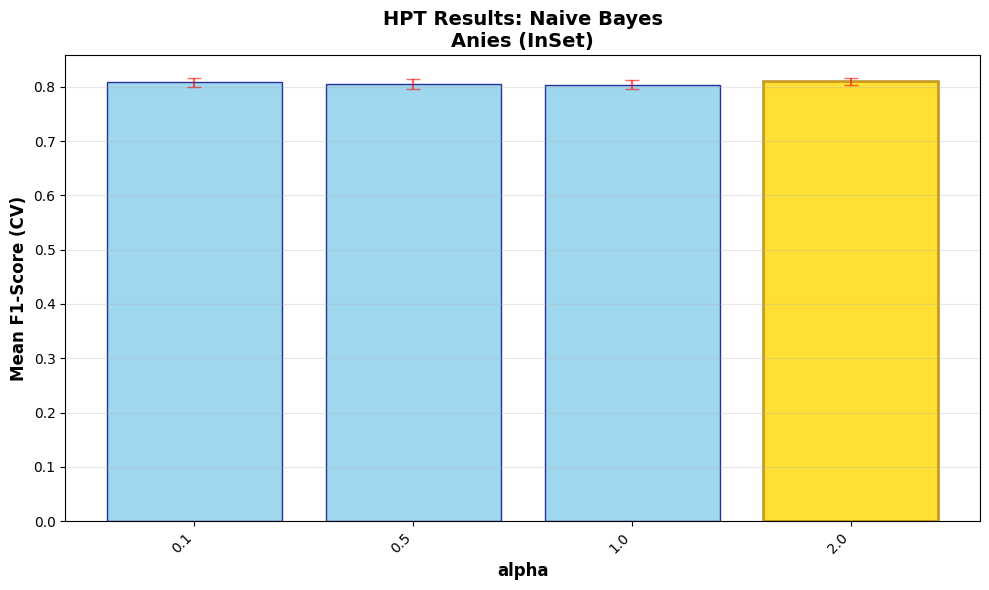

✓ Training completed

Anies (InSet) - Naive Bayes - EVALUATION RESULTS

Accuracy:  0.8086
Precision: 0.8209
Recall:    0.8086
F1-Score:  0.8094

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.89      0.76      0.82       957
    Positive       0.73      0.87      0.80       725

    accuracy                           0.81      1682
   macro avg       0.81      0.82      0.81      1682
weighted avg       0.82      0.81      0.81      1682


--- Confusion Matrix ---
[[728 229]
 [ 93 632]]


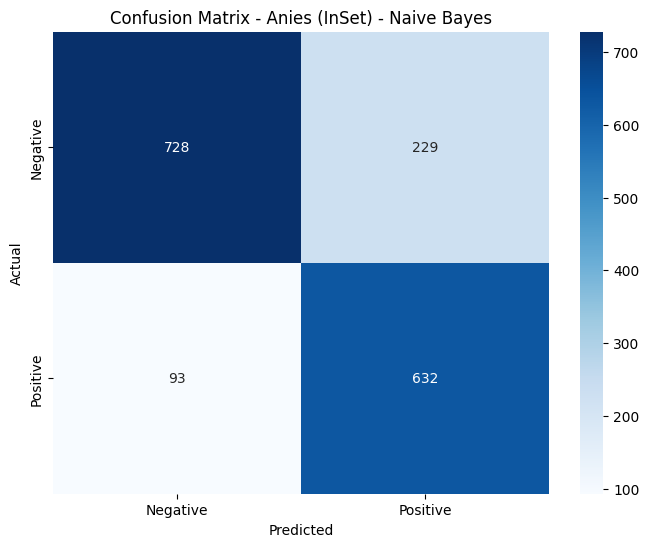


[2/5] Training SVM (Linear Kernel)...

🔍 Running HPT for SVM ...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
✓ Best params for SVM: {'C': 5, 'kernel': 'linear'}
✓ Best score: 0.8835

📊 Top 5 Configurations for SVM:
                        params  mean_test_score  std_test_score  rank_test_score
  {'C': 5, 'kernel': 'linear'}         0.883480        0.004061                1
  {'C': 1, 'kernel': 'linear'}         0.876146        0.010223                2
{'C': 0.1, 'kernel': 'linear'}         0.806696        0.009685                3


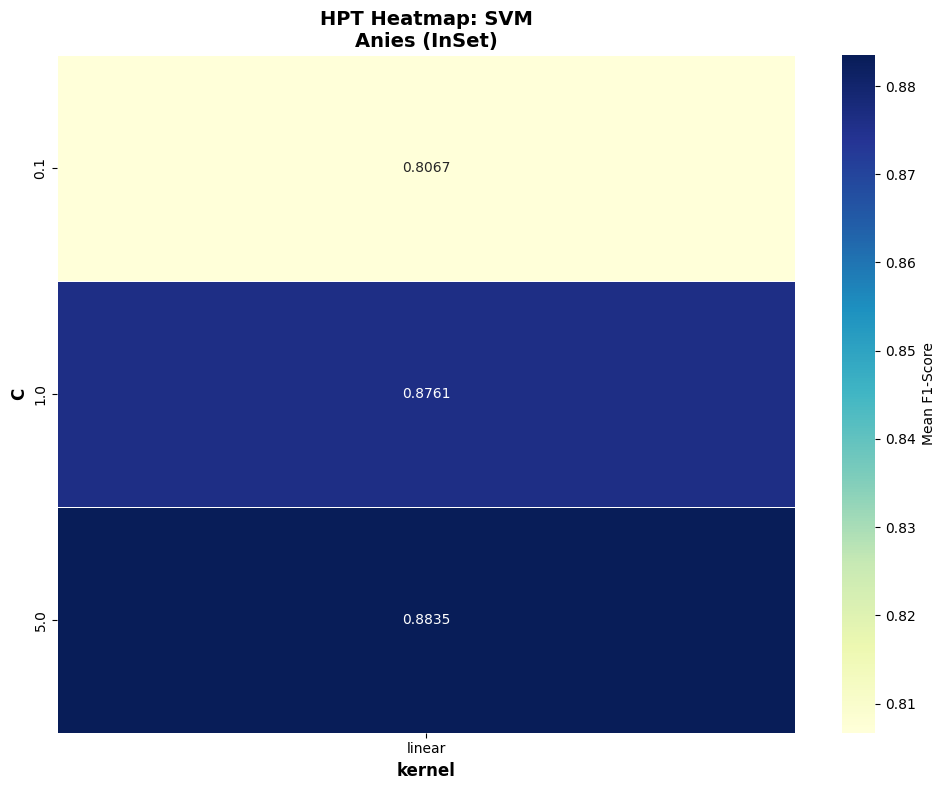

✓ Training completed

Anies (InSet) - SVM - EVALUATION RESULTS

Accuracy:  0.8900
Precision: 0.8899
Recall:    0.8900
F1-Score:  0.8899

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.90      0.91      0.90       957
    Positive       0.88      0.86      0.87       725

    accuracy                           0.89      1682
   macro avg       0.89      0.89      0.89      1682
weighted avg       0.89      0.89      0.89      1682


--- Confusion Matrix ---
[[870  87]
 [ 98 627]]


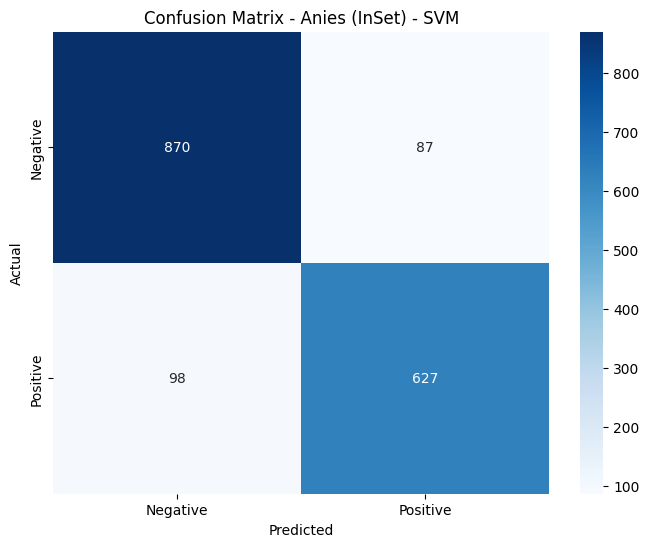


[3/5] Training Random Forest...

🔍 Running HPT for Random Forest ...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✓ Best params for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
✓ Best score: 0.8264

📊 Top 5 Configurations for Random Forest:
                                                          params  mean_test_score  std_test_score  rank_test_score
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}         0.826353        0.008897                1
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}         0.826234        0.008407                2
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}         0.821975        0.009015                3
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}         0.821339        0.009739                4
  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}         0.791056        0.011058                5


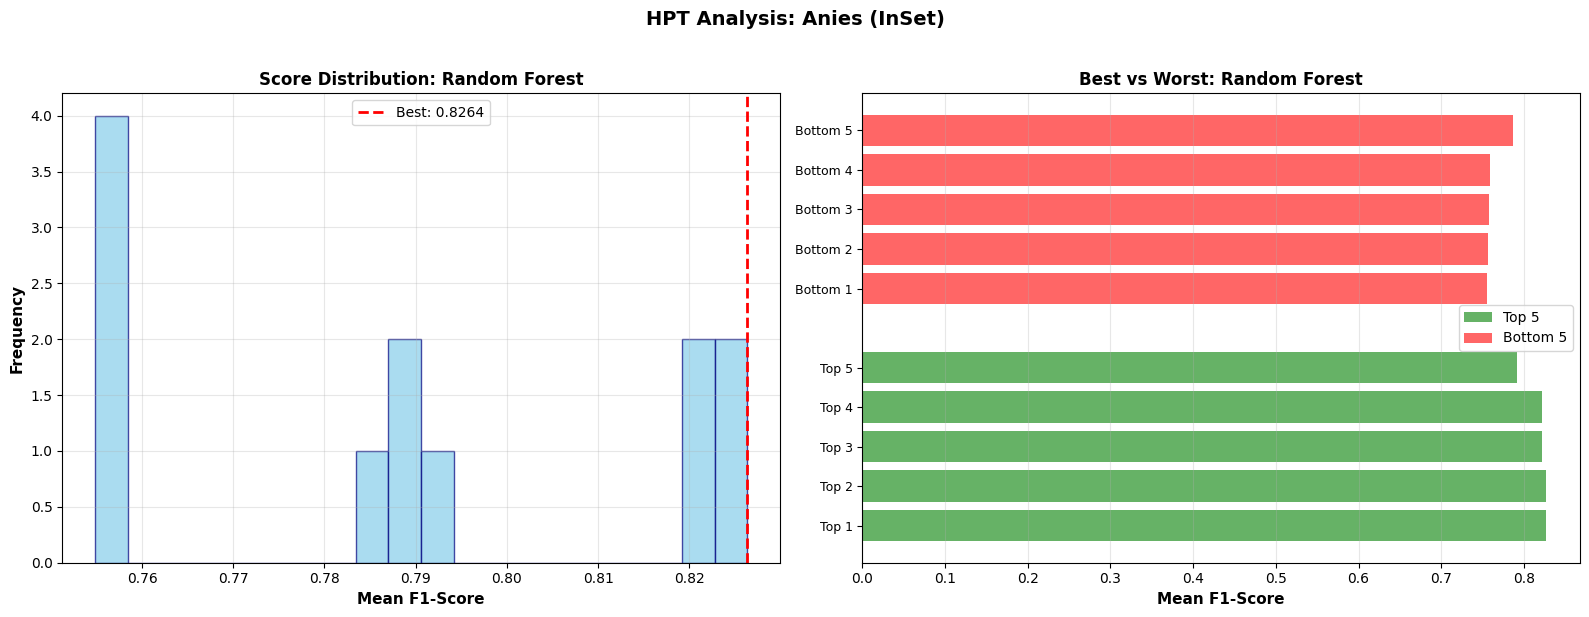

✓ Training completed

Anies (InSet) - Random Forest - EVALUATION RESULTS

Accuracy:  0.8282
Precision: 0.8278
Recall:    0.8282
F1-Score:  0.8278

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.84      0.86      0.85       957
    Positive       0.81      0.78      0.80       725

    accuracy                           0.83      1682
   macro avg       0.83      0.82      0.82      1682
weighted avg       0.83      0.83      0.83      1682


--- Confusion Matrix ---
[[825 132]
 [157 568]]


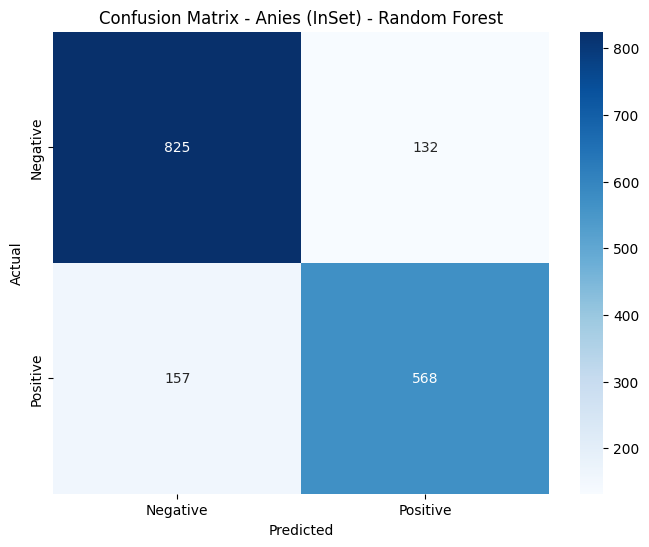


[4/5] Training IndoBERT...

[Training IndoBERT for Anies (InSet)]
Loading IndoBERT tokenizer and model...


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ Model loaded
Preparing datasets...


model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Training IndoBERT...


✓ Training completed
Evaluating IndoBERT...



IndoBERT Results:
Accuracy:  0.9043
Precision: 0.9043
Recall:    0.9043
F1-Score:  0.9043


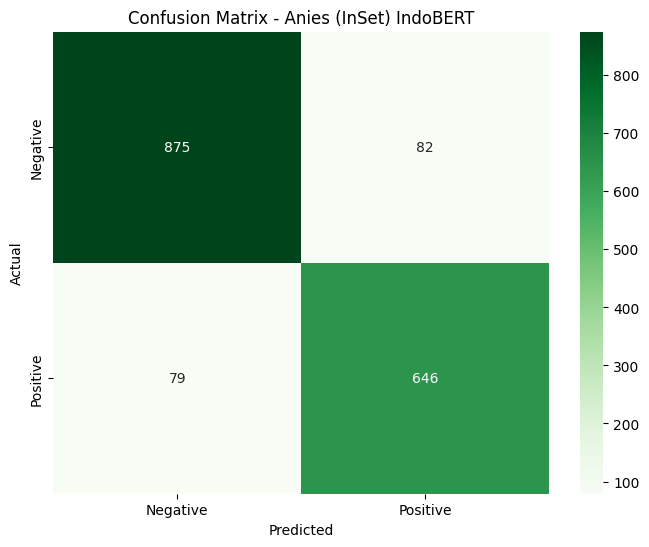


[5/5] Training Ensemble Model (Voting)...

🔍 Running HPT for Ensemble ...
Fitting 3 folds for each of 7 candidates, totalling 21 fits
✓ Best params for Ensemble: {'weights': [1, 2, 1]}
✓ Best score: 0.8833

📊 Top 5 Configurations for Ensemble:
                params  mean_test_score  std_test_score  rank_test_score
{'weights': [1, 2, 1]}         0.883264        0.006772                1
{'weights': [1, 2, 2]}         0.880310        0.006793                2
{'weights': [2, 2, 1]}         0.877220        0.005756                3
{'weights': [1, 1, 1]}         0.871977        0.006337                4
{'weights': [2, 1, 1]}         0.866070        0.007004                5


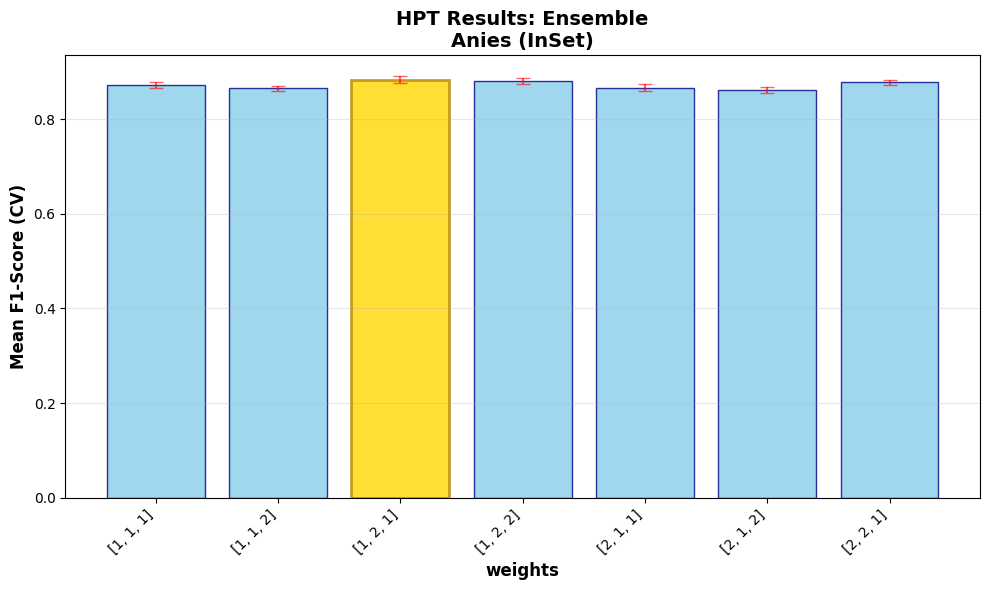

✓ Training completed

Anies (InSet) - Ensemble - EVALUATION RESULTS

Accuracy:  0.8882
Precision: 0.8881
Recall:    0.8882
F1-Score:  0.8881

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.90      0.91      0.90       957
    Positive       0.88      0.86      0.87       725

    accuracy                           0.89      1682
   macro avg       0.89      0.89      0.89      1682
weighted avg       0.89      0.89      0.89      1682


--- Confusion Matrix ---
[[868  89]
 [ 99 626]]


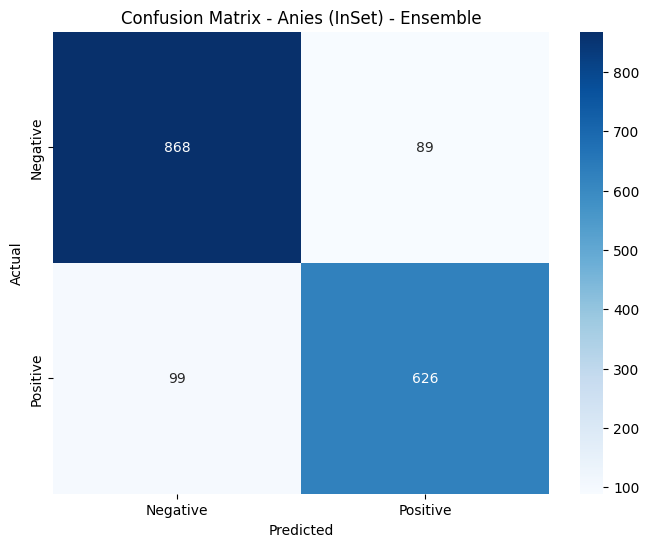


############################################################
VADER METHOD - ANIES
############################################################

ANIES - VADER Dataset:
Total samples: 6823
Label distribution: {1: 5143, 0: 1680}

############################################################
TRAINING MODELS - Anies (VADER)
############################################################

[1/5] Training Multinomial Naive Bayes...

🔍 Running HPT for Naive Bayes ...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
✓ Best params for Naive Bayes: {'alpha': 0.1}
✓ Best score: 0.8348

📊 Top 5 Configurations for Naive Bayes:
        params  mean_test_score  std_test_score  rank_test_score
{'alpha': 0.1}         0.834779        0.003805                1
{'alpha': 0.5}         0.821579        0.007051                2
{'alpha': 1.0}         0.815196        0.005205                3
{'alpha': 2.0}         0.800808        0.007701                4


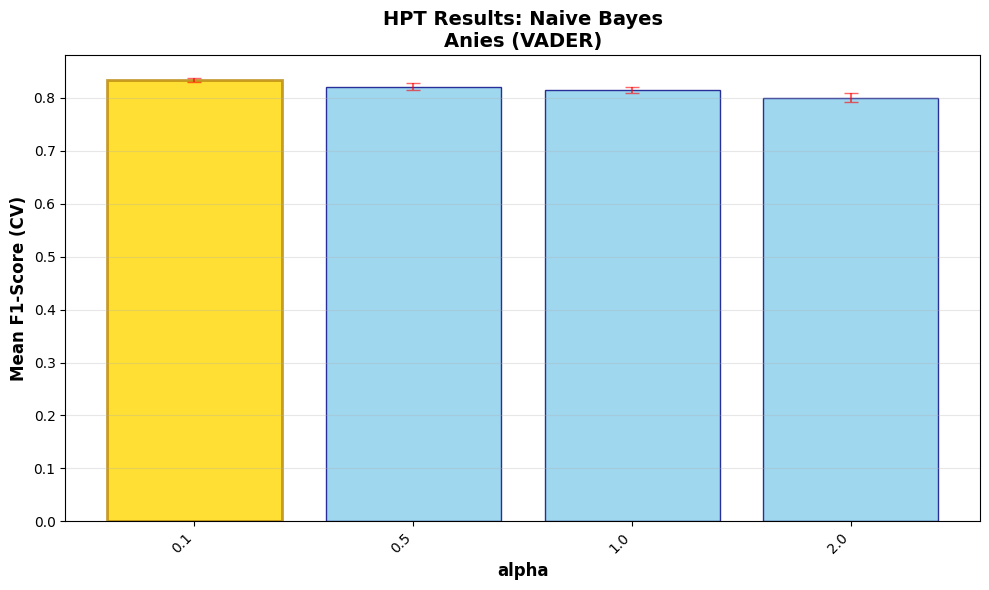

✓ Training completed

Anies (VADER) - Naive Bayes - EVALUATION RESULTS

Accuracy:  0.8571
Precision: 0.8514
Recall:    0.8571
F1-Score:  0.8492

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.79      0.58      0.67       336
    Positive       0.87      0.95      0.91      1029

    accuracy                           0.86      1365
   macro avg       0.83      0.76      0.79      1365
weighted avg       0.85      0.86      0.85      1365


--- Confusion Matrix ---
[[194 142]
 [ 53 976]]


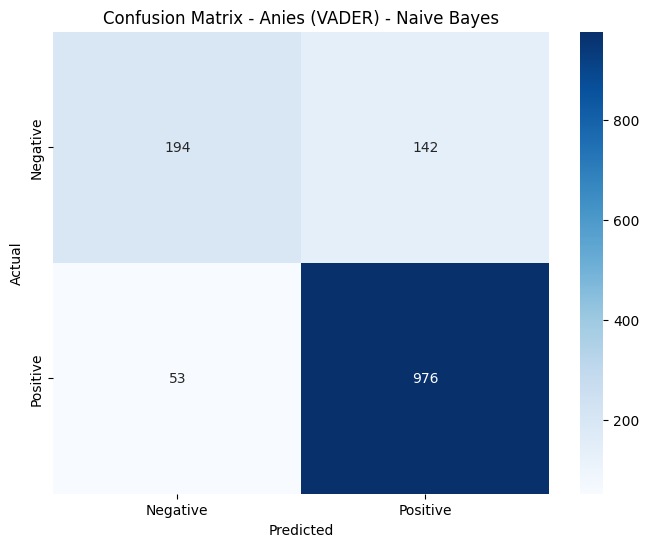


[2/5] Training SVM (Linear Kernel)...

🔍 Running HPT for SVM ...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
✓ Best params for SVM: {'C': 5, 'kernel': 'linear'}
✓ Best score: 0.8873

📊 Top 5 Configurations for SVM:
                        params  mean_test_score  std_test_score  rank_test_score
  {'C': 5, 'kernel': 'linear'}         0.887293        0.002453                1
  {'C': 1, 'kernel': 'linear'}         0.878866        0.003189                2
{'C': 0.1, 'kernel': 'linear'}         0.744391        0.002407                3


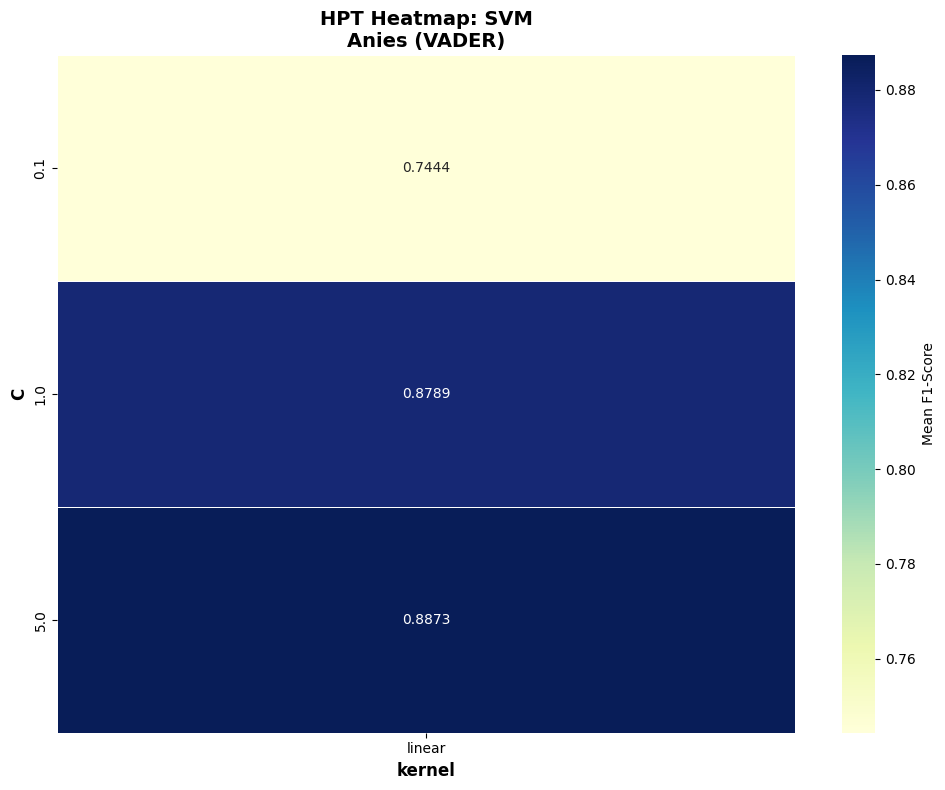

✓ Training completed

Anies (VADER) - SVM - EVALUATION RESULTS

Accuracy:  0.9077
Precision: 0.9065
Recall:    0.9077
F1-Score:  0.9069

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.83      0.79      0.81       336
    Positive       0.93      0.95      0.94      1029

    accuracy                           0.91      1365
   macro avg       0.88      0.87      0.87      1365
weighted avg       0.91      0.91      0.91      1365


--- Confusion Matrix ---
[[265  71]
 [ 55 974]]


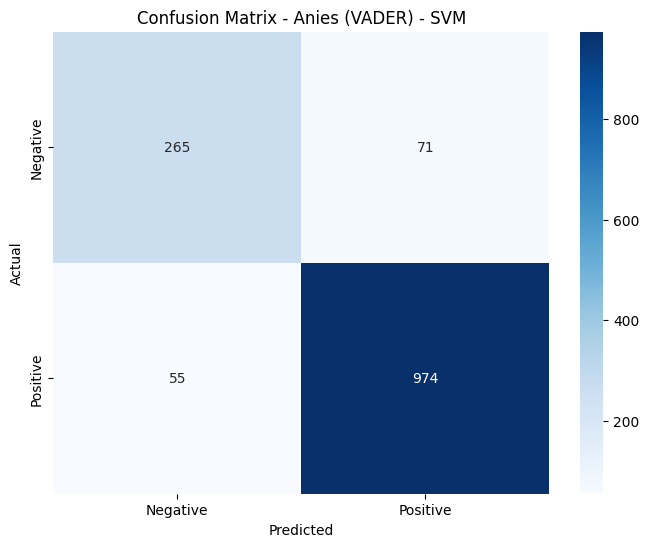


[3/5] Training Random Forest...

🔍 Running HPT for Random Forest ...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✓ Best params for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
✓ Best score: 0.8282

📊 Top 5 Configurations for Random Forest:
                                                          params  mean_test_score  std_test_score  rank_test_score
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}         0.828151        0.003423                1
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}         0.826681        0.002704                2
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}         0.824973        0.004031                3
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}         0.824490        0.005552                4
  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}         0.773315        0.004129                5


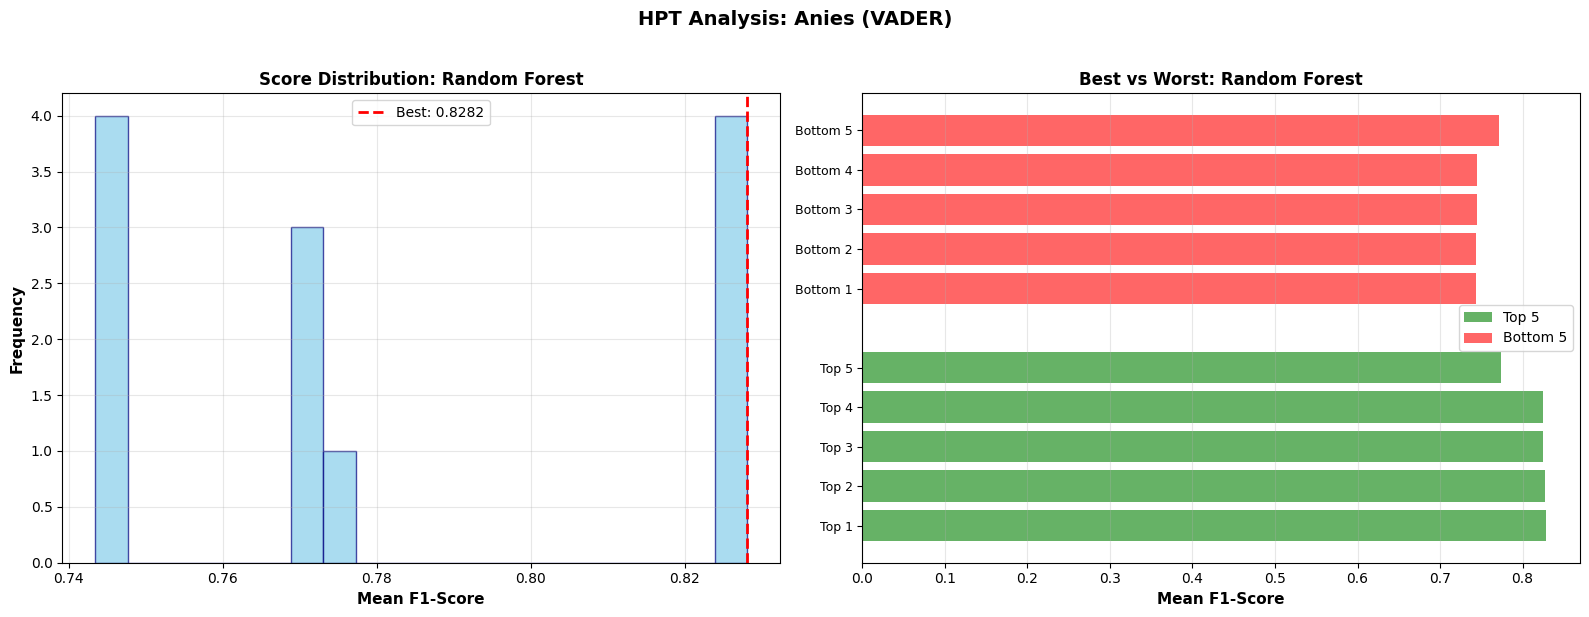

✓ Training completed

Anies (VADER) - Random Forest - EVALUATION RESULTS

Accuracy:  0.8601
Precision: 0.8586
Recall:    0.8601
F1-Score:  0.8478

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.85      0.53      0.65       336
    Positive       0.86      0.97      0.91      1029

    accuracy                           0.86      1365
   macro avg       0.85      0.75      0.78      1365
weighted avg       0.86      0.86      0.85      1365


--- Confusion Matrix ---
[[177 159]
 [ 32 997]]


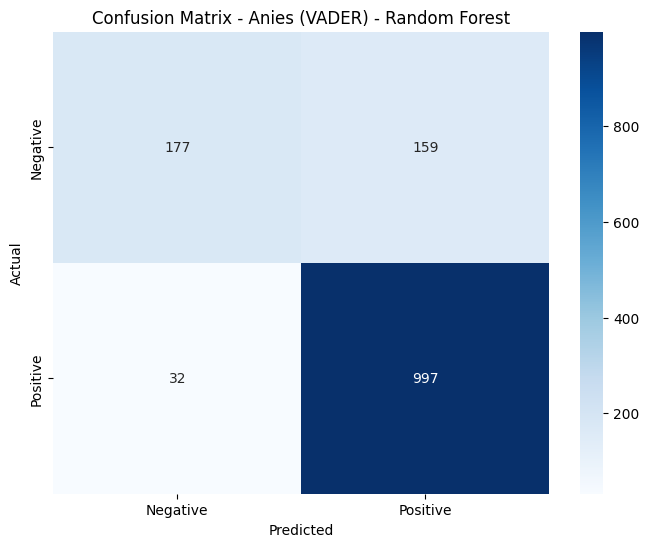


[4/5] Skipping IndoBERT (only for Indonesian text)...

[5/5] Training Ensemble Model (Voting)...

🔍 Running HPT for Ensemble ...
Fitting 3 folds for each of 7 candidates, totalling 21 fits
✓ Best params for Ensemble: {'weights': [1, 2, 1]}
✓ Best score: 0.8785

📊 Top 5 Configurations for Ensemble:
                params  mean_test_score  std_test_score  rank_test_score
{'weights': [1, 2, 1]}         0.878511        0.005552                1
{'weights': [1, 2, 2]}         0.870798        0.003593                2
{'weights': [2, 2, 1]}         0.867249        0.004896                3
{'weights': [1, 1, 1]}         0.862144        0.004514                4
{'weights': [1, 1, 2]}         0.854325        0.003133                5


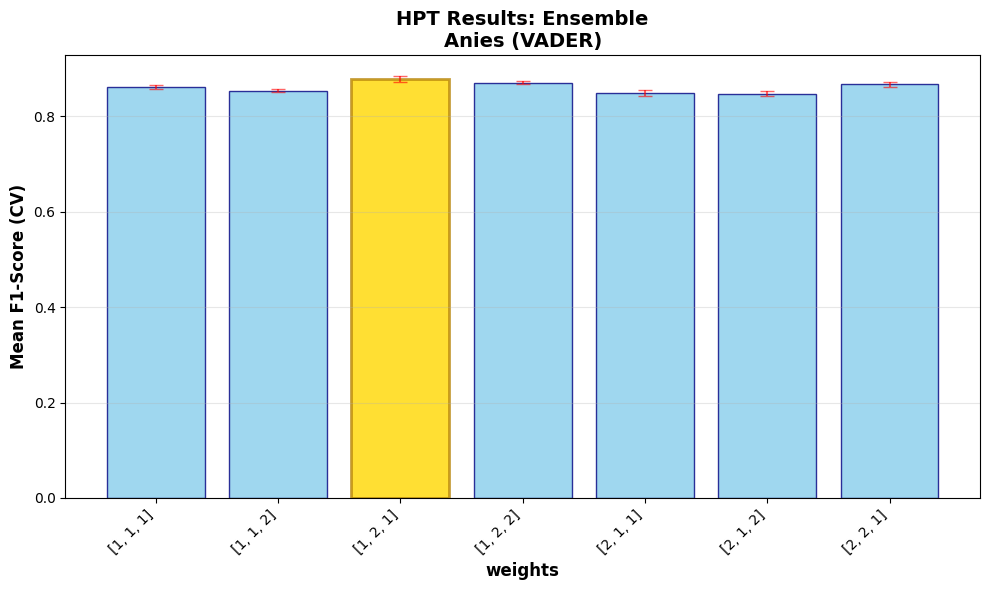

✓ Training completed

Anies (VADER) - Ensemble - EVALUATION RESULTS

Accuracy:  0.9055
Precision: 0.9040
Recall:    0.9055
F1-Score:  0.9020

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.88      0.71      0.79       336
    Positive       0.91      0.97      0.94      1029

    accuracy                           0.91      1365
   macro avg       0.90      0.84      0.86      1365
weighted avg       0.90      0.91      0.90      1365


--- Confusion Matrix ---
[[240  96]
 [ 33 996]]


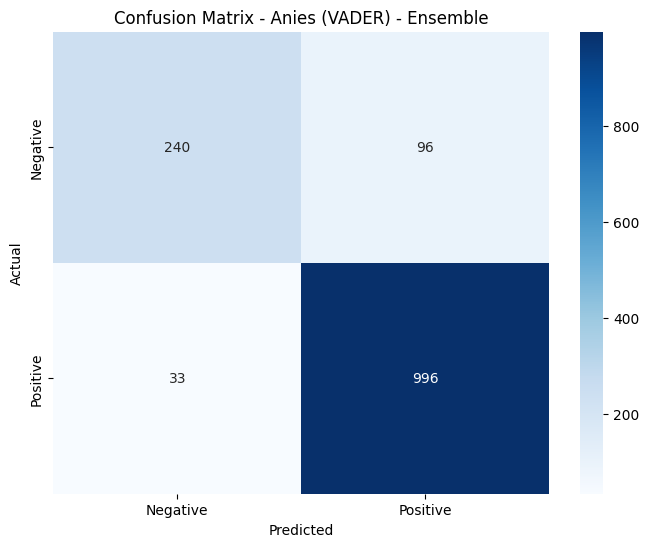


TRAINING MODELS FOR: GANJAR

############################################################
INSET METHOD - GANJAR
############################################################

GANJAR - INSET Dataset:
Total samples: 7166
Label distribution: {0: 4380, 1: 2786}

############################################################
TRAINING MODELS - Ganjar (InSet)
############################################################

[1/5] Training Multinomial Naive Bayes...

🔍 Running HPT for Naive Bayes ...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
✓ Best params for Naive Bayes: {'alpha': 0.5}
✓ Best score: 0.8249

📊 Top 5 Configurations for Naive Bayes:
        params  mean_test_score  std_test_score  rank_test_score
{'alpha': 0.5}         0.824923        0.012855                1
{'alpha': 1.0}         0.822511        0.012723                2
{'alpha': 0.1}         0.817640        0.010451                3
{'alpha': 2.0}         0.804630        0.014899                4


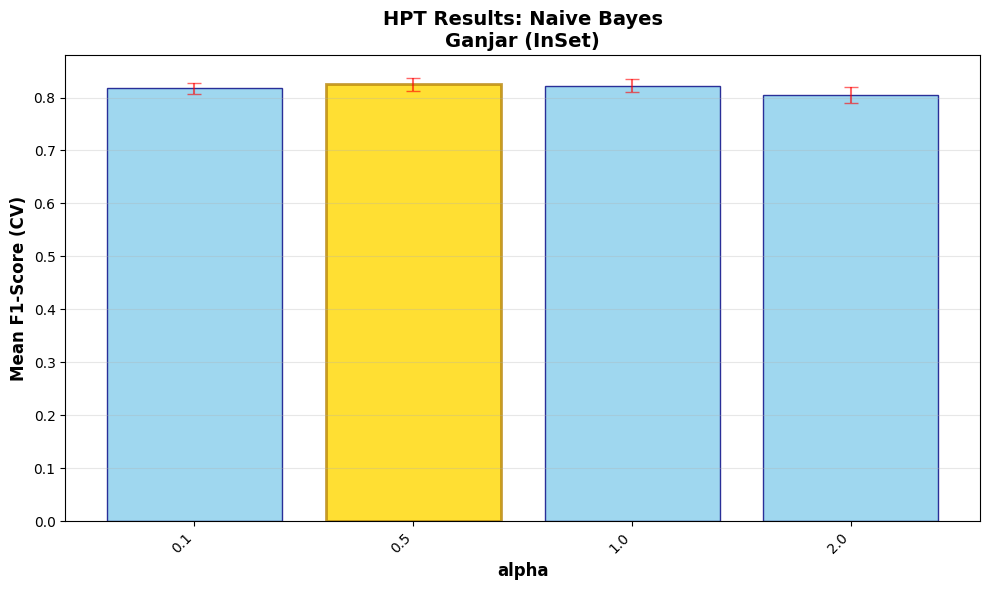

✓ Training completed

Ganjar (InSet) - Naive Bayes - EVALUATION RESULTS

Accuracy:  0.8522
Precision: 0.8525
Recall:    0.8522
F1-Score:  0.8500

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.85      0.92      0.88       876
    Positive       0.86      0.75      0.80       558

    accuracy                           0.85      1434
   macro avg       0.85      0.83      0.84      1434
weighted avg       0.85      0.85      0.85      1434


--- Confusion Matrix ---
[[806  70]
 [142 416]]


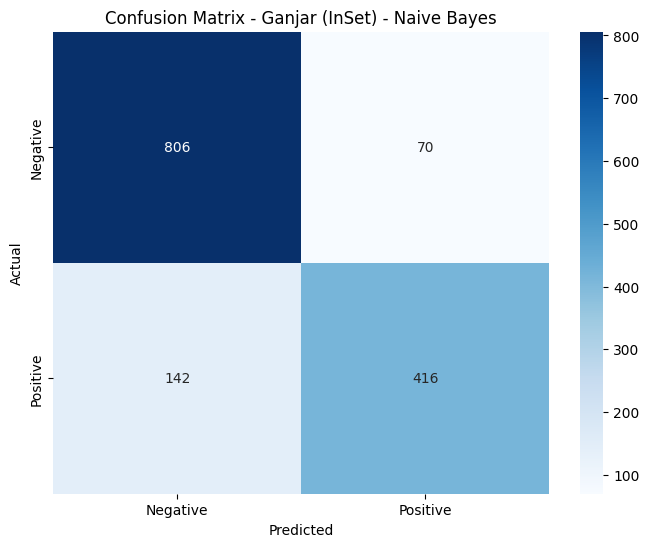


[2/5] Training SVM (Linear Kernel)...

🔍 Running HPT for SVM ...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
✓ Best params for SVM: {'C': 5, 'kernel': 'linear'}
✓ Best score: 0.8865

📊 Top 5 Configurations for SVM:
                        params  mean_test_score  std_test_score  rank_test_score
  {'C': 5, 'kernel': 'linear'}         0.886494        0.001029                1
  {'C': 1, 'kernel': 'linear'}         0.874484        0.006574                2
{'C': 0.1, 'kernel': 'linear'}         0.747351        0.013720                3


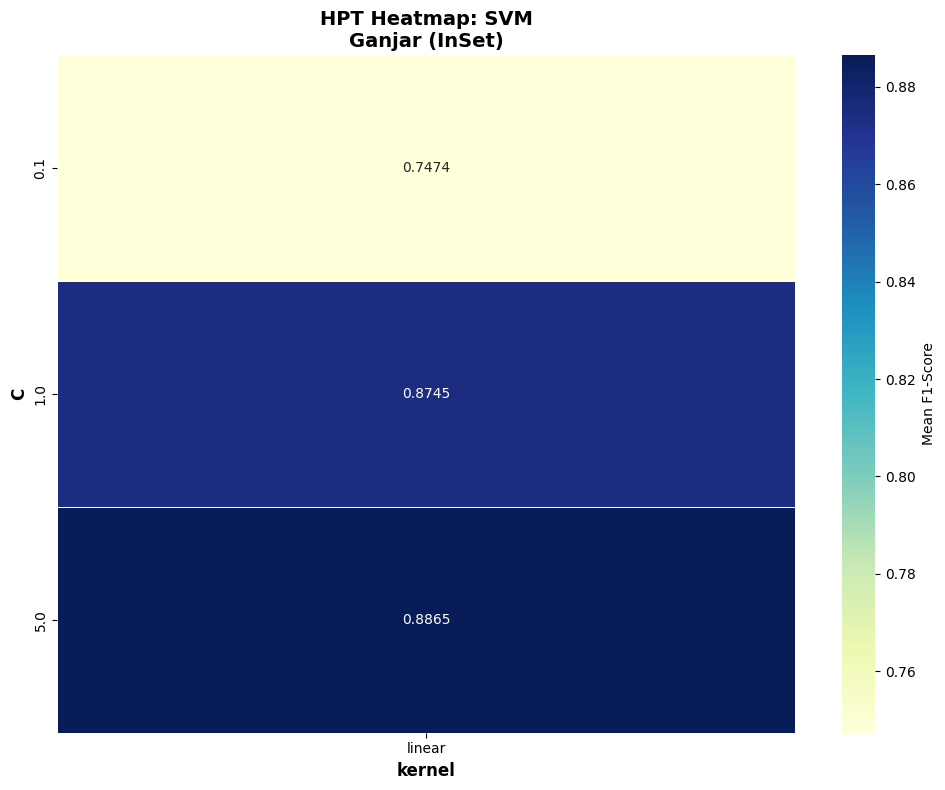

✓ Training completed

Ganjar (InSet) - SVM - EVALUATION RESULTS

Accuracy:  0.8926
Precision: 0.8926
Recall:    0.8926
F1-Score:  0.8926

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91       876
    Positive       0.86      0.86      0.86       558

    accuracy                           0.89      1434
   macro avg       0.89      0.89      0.89      1434
weighted avg       0.89      0.89      0.89      1434


--- Confusion Matrix ---
[[799  77]
 [ 77 481]]


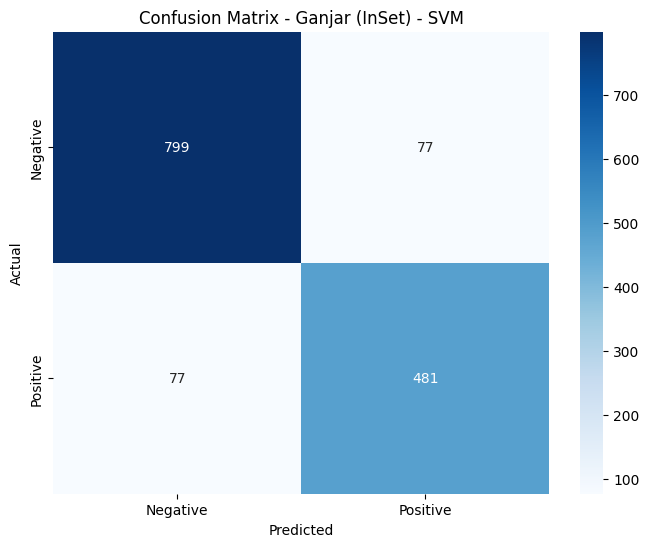


[3/5] Training Random Forest...

🔍 Running HPT for Random Forest ...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✓ Best params for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
✓ Best score: 0.8373

📊 Top 5 Configurations for Random Forest:
                                                          params  mean_test_score  std_test_score  rank_test_score
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}         0.837264        0.005866                1
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}         0.834633        0.002107                2
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}         0.833539        0.003765                3
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}         0.831392        0.003069                4
  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}         0.753838        0.011544                5


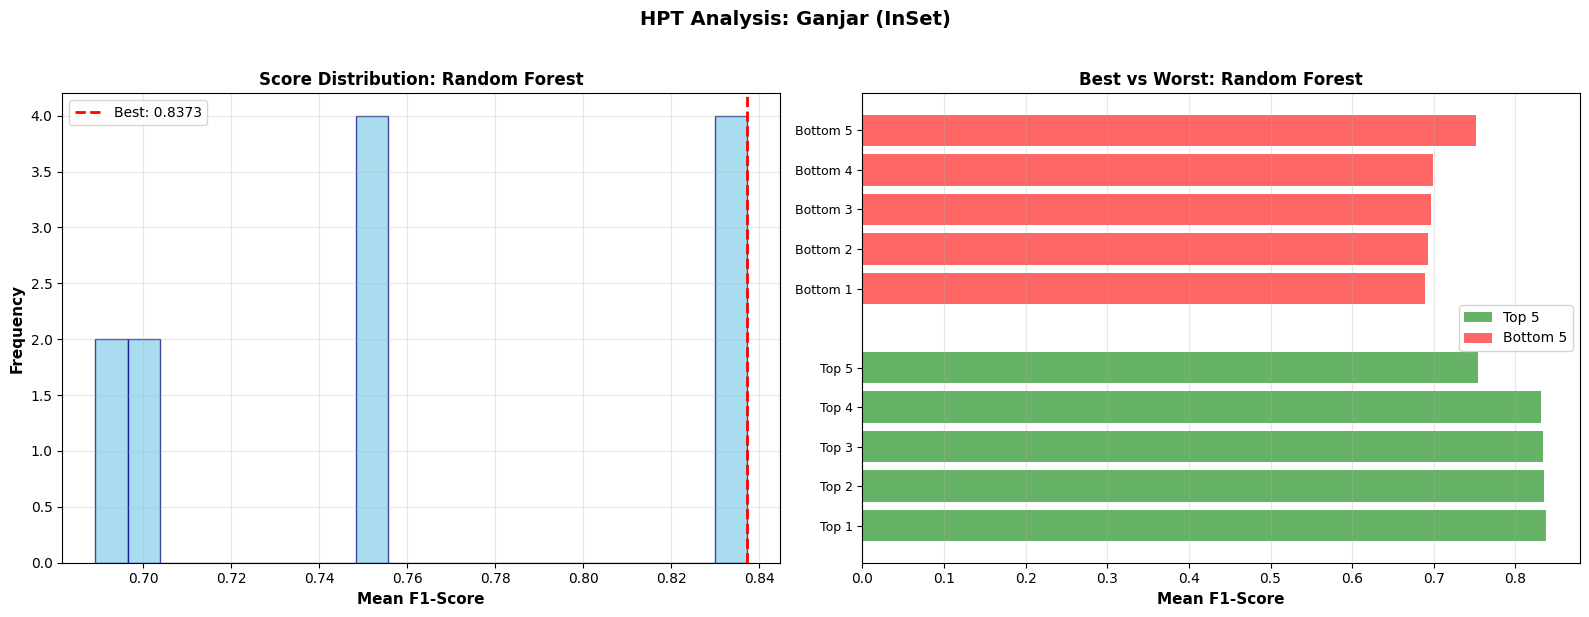

✓ Training completed

Ganjar (InSet) - Random Forest - EVALUATION RESULTS

Accuracy:  0.8675
Precision: 0.8705
Recall:    0.8675
F1-Score:  0.8647

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.85      0.95      0.90       876
    Positive       0.90      0.74      0.81       558

    accuracy                           0.87      1434
   macro avg       0.88      0.85      0.86      1434
weighted avg       0.87      0.87      0.86      1434


--- Confusion Matrix ---
[[829  47]
 [143 415]]


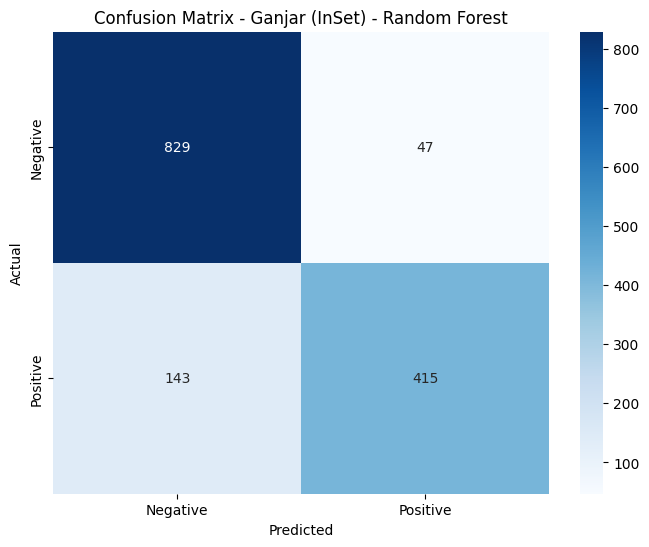


[4/5] Training IndoBERT...

[Training IndoBERT for Ganjar (InSet)]
Loading IndoBERT tokenizer and model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ Model loaded
Preparing datasets...
Training IndoBERT...


✓ Training completed
Evaluating IndoBERT...



IndoBERT Results:
Accuracy:  0.9121
Precision: 0.9121
Recall:    0.9121
F1-Score:  0.9121


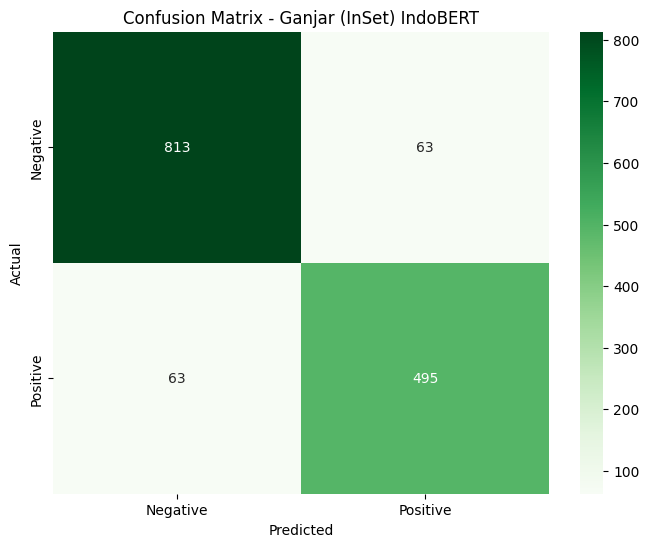


[5/5] Training Ensemble Model (Voting)...

🔍 Running HPT for Ensemble ...
Fitting 3 folds for each of 7 candidates, totalling 21 fits
✓ Best params for Ensemble: {'weights': [1, 2, 1]}
✓ Best score: 0.8871

📊 Top 5 Configurations for Ensemble:
                params  mean_test_score  std_test_score  rank_test_score
{'weights': [1, 2, 1]}         0.887058        0.006748                1
{'weights': [1, 2, 2]}         0.884315        0.006153                2
{'weights': [2, 2, 1]}         0.883971        0.006933                3
{'weights': [1, 1, 1]}         0.880765        0.008214                4
{'weights': [2, 1, 1]}         0.872751        0.010878                5


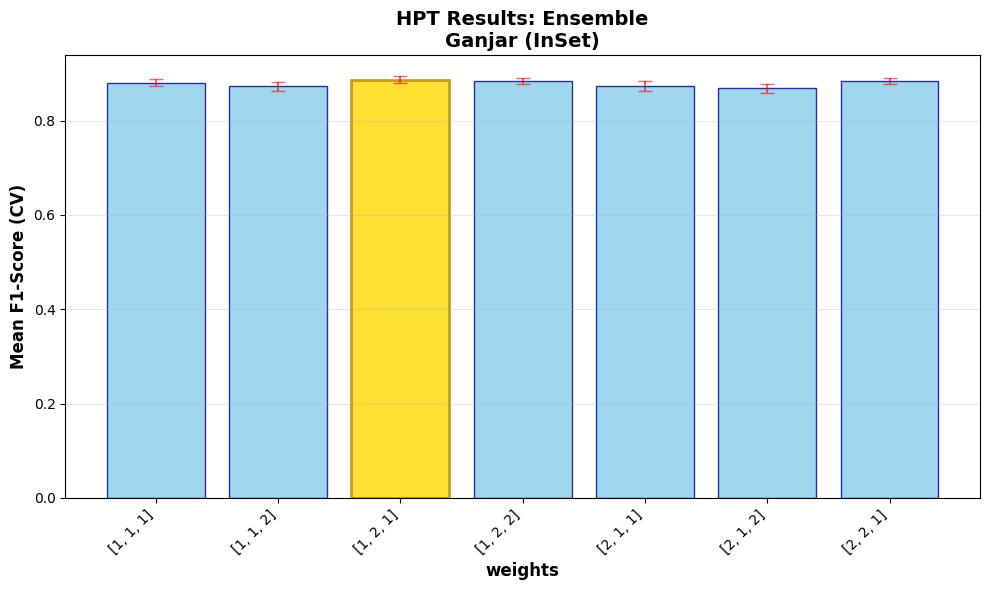

✓ Training completed

Ganjar (InSet) - Ensemble - EVALUATION RESULTS

Accuracy:  0.8940
Precision: 0.8936
Recall:    0.8940
F1-Score:  0.8935

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.90      0.93      0.91       876
    Positive       0.88      0.84      0.86       558

    accuracy                           0.89      1434
   macro avg       0.89      0.88      0.89      1434
weighted avg       0.89      0.89      0.89      1434


--- Confusion Matrix ---
[[813  63]
 [ 89 469]]


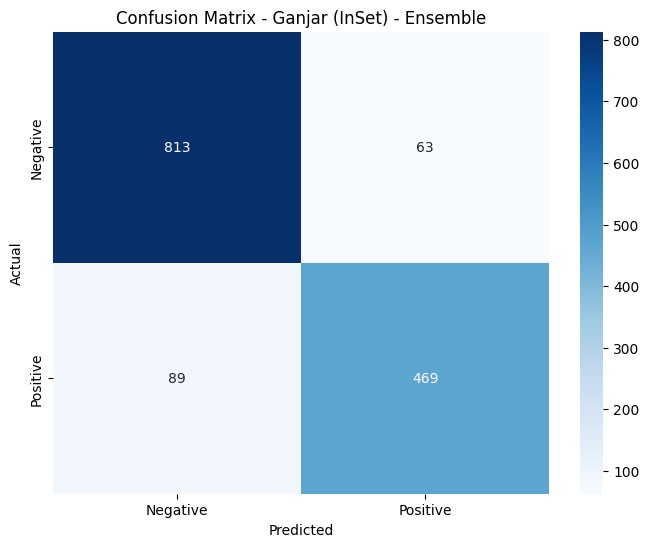


############################################################
VADER METHOD - GANJAR
############################################################

GANJAR - VADER Dataset:
Total samples: 6469
Label distribution: {1: 5942, 0: 527}

############################################################
TRAINING MODELS - Ganjar (VADER)
############################################################

[1/5] Training Multinomial Naive Bayes...

🔍 Running HPT for Naive Bayes ...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
✓ Best params for Naive Bayes: {'alpha': 0.1}
✓ Best score: 0.9327

📊 Top 5 Configurations for Naive Bayes:
        params  mean_test_score  std_test_score  rank_test_score
{'alpha': 0.1}         0.932725        0.005450                1
{'alpha': 0.5}         0.908334        0.004162                2
{'alpha': 1.0}         0.887978        0.002935                3
{'alpha': 2.0}         0.880359        0.000933                4


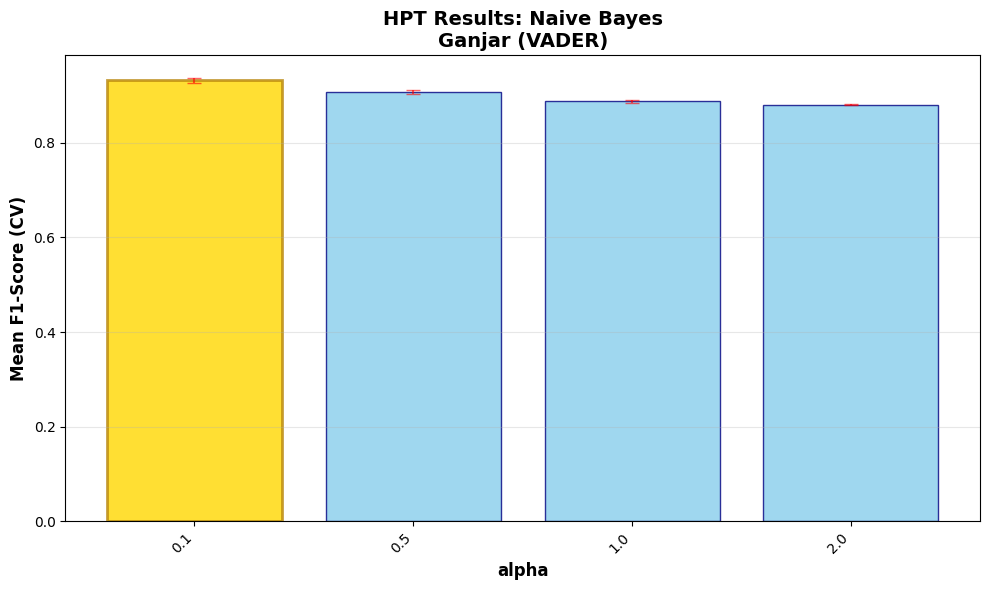

✓ Training completed

Ganjar (VADER) - Naive Bayes - EVALUATION RESULTS

Accuracy:  0.9420
Precision: 0.9361
Recall:    0.9420
F1-Score:  0.9319

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.81      0.37      0.51       105
    Positive       0.95      0.99      0.97      1189

    accuracy                           0.94      1294
   macro avg       0.88      0.68      0.74      1294
weighted avg       0.94      0.94      0.93      1294


--- Confusion Matrix ---
[[  39   66]
 [   9 1180]]


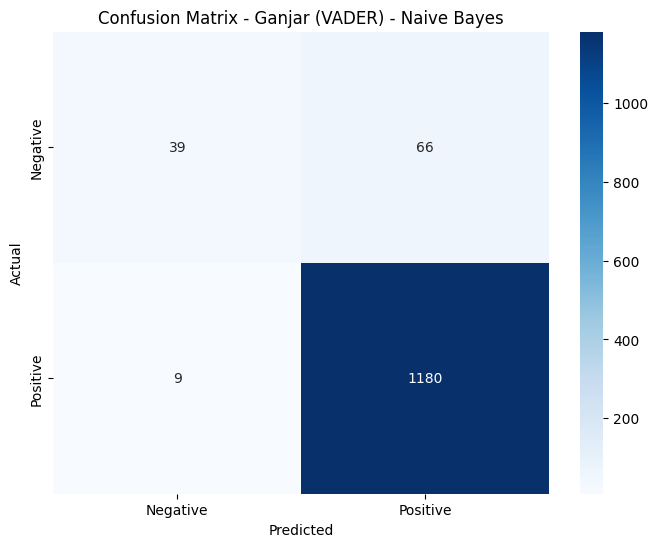


[2/5] Training SVM (Linear Kernel)...

🔍 Running HPT for SVM ...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
✓ Best params for SVM: {'C': 5, 'kernel': 'linear'}
✓ Best score: 0.9450

📊 Top 5 Configurations for SVM:
                        params  mean_test_score  std_test_score  rank_test_score
  {'C': 5, 'kernel': 'linear'}         0.945047        0.003427                1
  {'C': 1, 'kernel': 'linear'}         0.938569        0.002313                2
{'C': 0.1, 'kernel': 'linear'}         0.916220        0.000498                3


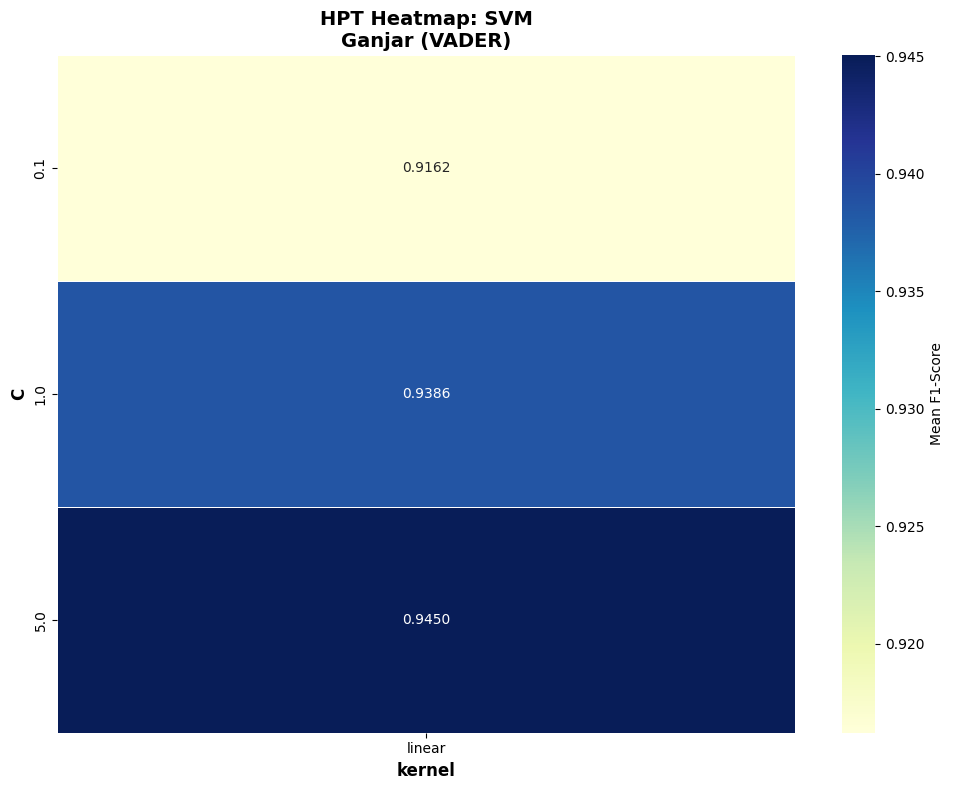

✓ Training completed

Ganjar (VADER) - SVM - EVALUATION RESULTS

Accuracy:  0.9606
Precision: 0.9584
Recall:    0.9606
F1-Score:  0.9590

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.81      0.68      0.74       105
    Positive       0.97      0.99      0.98      1189

    accuracy                           0.96      1294
   macro avg       0.89      0.83      0.86      1294
weighted avg       0.96      0.96      0.96      1294


--- Confusion Matrix ---
[[  71   34]
 [  17 1172]]


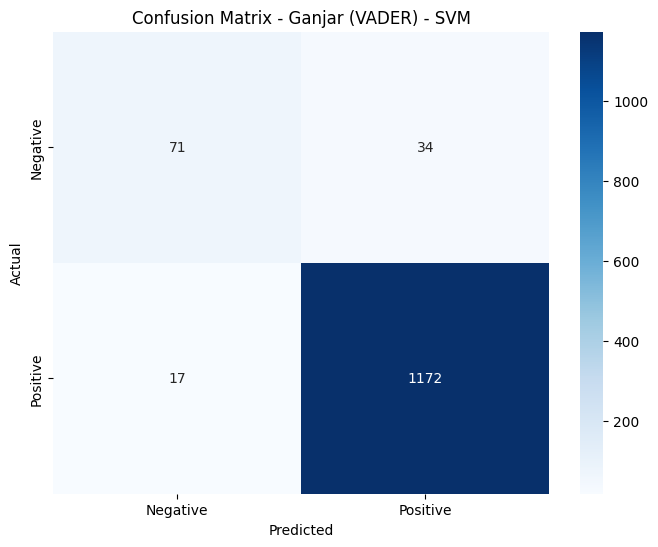


[3/5] Training Random Forest...

🔍 Running HPT for Random Forest ...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✓ Best params for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
✓ Best score: 0.9396

📊 Top 5 Configurations for Random Forest:
                                                          params  mean_test_score  std_test_score  rank_test_score
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}         0.939551        0.004285                1
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}         0.939454        0.003966                2
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}         0.938752        0.003487                3
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}         0.938678        0.003650                4
  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}         0.909318        0.002036                5


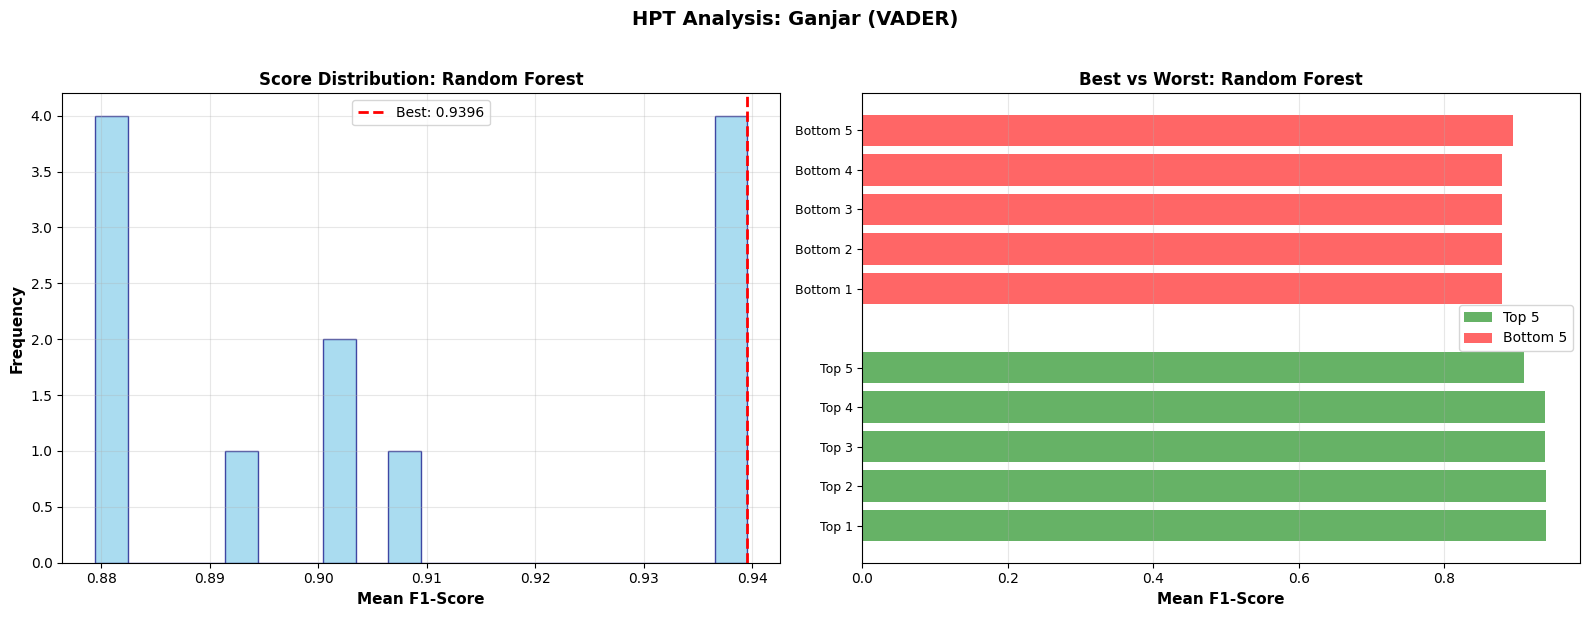

✓ Training completed

Ganjar (VADER) - Random Forest - EVALUATION RESULTS

Accuracy:  0.9544
Precision: 0.9547
Recall:    0.9544
F1-Score:  0.9468

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.96      0.46      0.62       105
    Positive       0.95      1.00      0.98      1189

    accuracy                           0.95      1294
   macro avg       0.96      0.73      0.80      1294
weighted avg       0.95      0.95      0.95      1294


--- Confusion Matrix ---
[[  48   57]
 [   2 1187]]


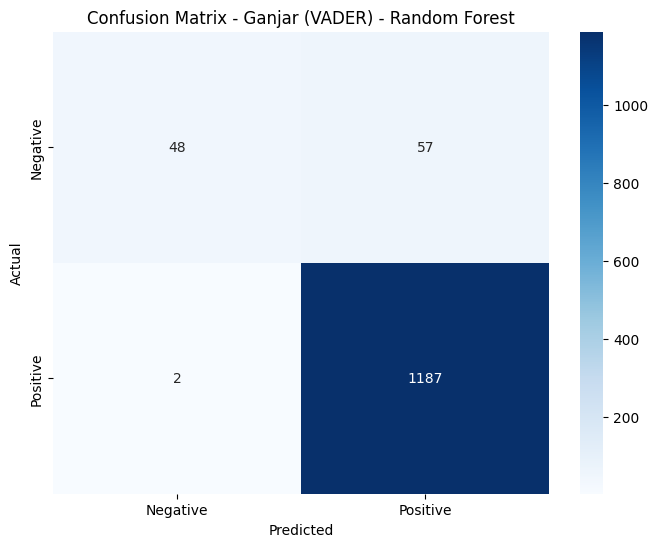


[4/5] Skipping IndoBERT (only for Indonesian text)...

[5/5] Training Ensemble Model (Voting)...

🔍 Running HPT for Ensemble ...
Fitting 3 folds for each of 7 candidates, totalling 21 fits
✓ Best params for Ensemble: {'weights': [1, 2, 1]}
✓ Best score: 0.9423

📊 Top 5 Configurations for Ensemble:
                params  mean_test_score  std_test_score  rank_test_score
{'weights': [1, 2, 1]}         0.942288        0.007194                1
{'weights': [1, 2, 2]}         0.941495        0.006059                2
{'weights': [1, 1, 1]}         0.941056        0.005900                3
{'weights': [1, 1, 2]}         0.940225        0.004503                4
{'weights': [2, 2, 1]}         0.939823        0.006665                5


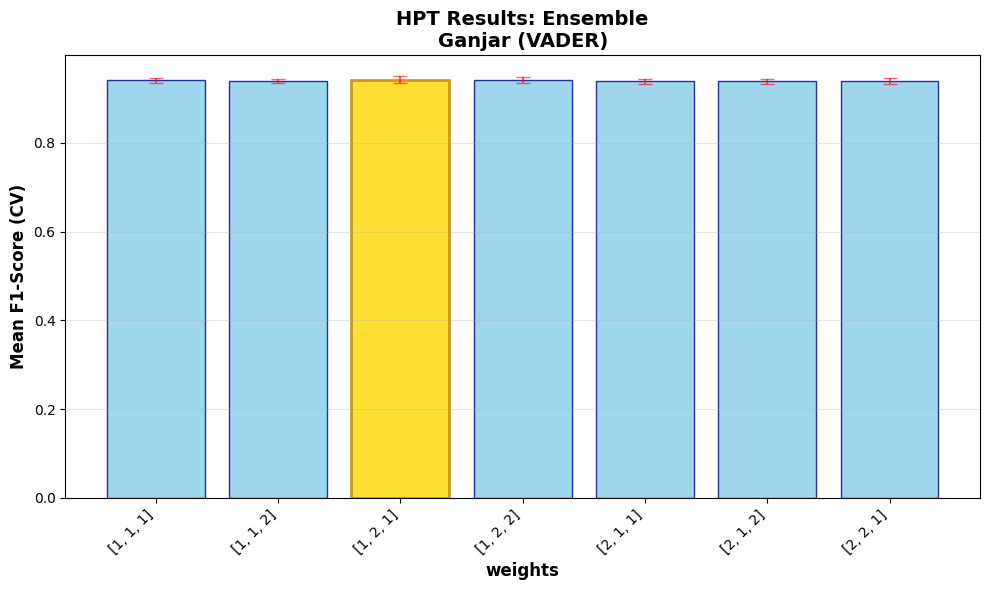

✓ Training completed

Ganjar (VADER) - Ensemble - EVALUATION RESULTS

Accuracy:  0.9621
Precision: 0.9613
Recall:    0.9621
F1-Score:  0.9579

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.94      0.57      0.71       105
    Positive       0.96      1.00      0.98      1189

    accuracy                           0.96      1294
   macro avg       0.95      0.78      0.84      1294
weighted avg       0.96      0.96      0.96      1294


--- Confusion Matrix ---
[[  60   45]
 [   4 1185]]


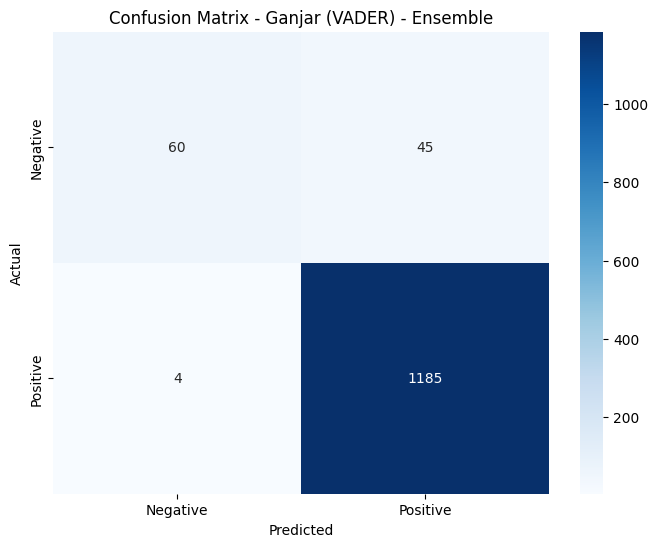


TRAINING MODELS FOR: PRABOWO

############################################################
INSET METHOD - PRABOWO
############################################################

PRABOWO - INSET Dataset:
Total samples: 6303
Label distribution: {1: 3337, 0: 2966}

############################################################
TRAINING MODELS - Prabowo (InSet)
############################################################

[1/5] Training Multinomial Naive Bayes...

🔍 Running HPT for Naive Bayes ...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
✓ Best params for Naive Bayes: {'alpha': 1.0}
✓ Best score: 0.8159

📊 Top 5 Configurations for Naive Bayes:
        params  mean_test_score  std_test_score  rank_test_score
{'alpha': 1.0}         0.815868        0.006094                1
{'alpha': 0.5}         0.815250        0.003516                2
{'alpha': 0.1}         0.807507        0.005543                3
{'alpha': 2.0}         0.805010        0.005033                4


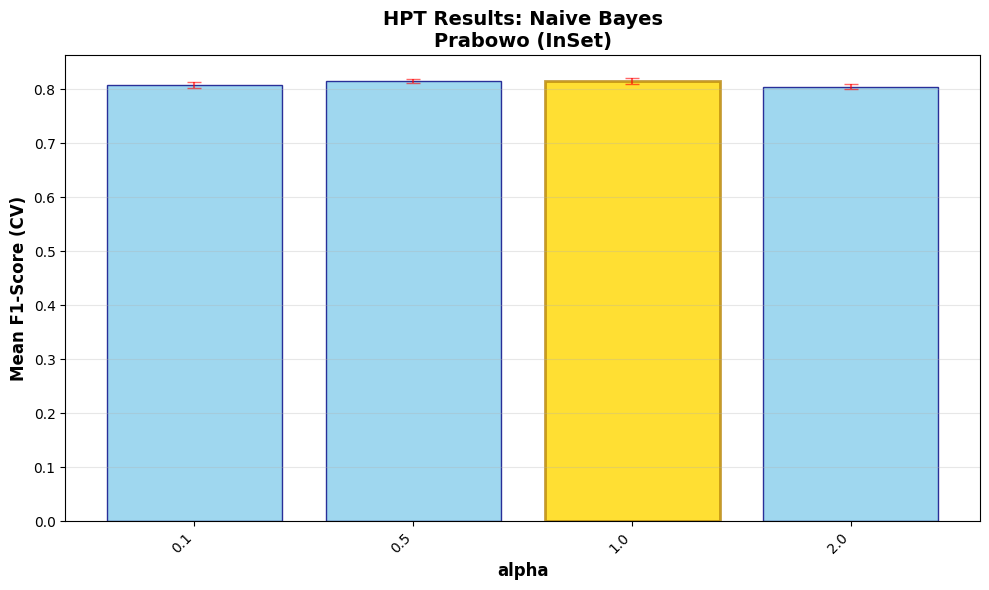

✓ Training completed

Prabowo (InSet) - Naive Bayes - EVALUATION RESULTS

Accuracy:  0.8224
Precision: 0.8226
Recall:    0.8224
F1-Score:  0.8220

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.83      0.79      0.81       593
    Positive       0.82      0.85      0.84       668

    accuracy                           0.82      1261
   macro avg       0.82      0.82      0.82      1261
weighted avg       0.82      0.82      0.82      1261


--- Confusion Matrix ---
[[466 127]
 [ 97 571]]


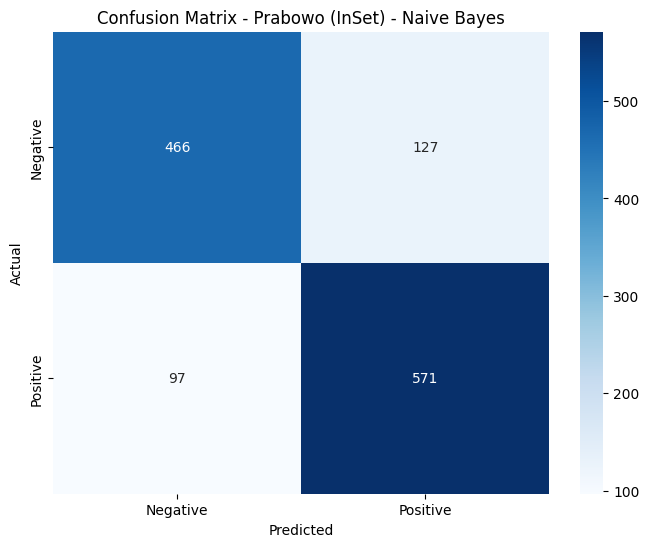


[2/5] Training SVM (Linear Kernel)...

🔍 Running HPT for SVM ...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
✓ Best params for SVM: {'C': 5, 'kernel': 'linear'}
✓ Best score: 0.8835

📊 Top 5 Configurations for SVM:
                        params  mean_test_score  std_test_score  rank_test_score
  {'C': 5, 'kernel': 'linear'}         0.883528        0.006289                1
  {'C': 1, 'kernel': 'linear'}         0.873835        0.012330                2
{'C': 0.1, 'kernel': 'linear'}         0.809885        0.014687                3


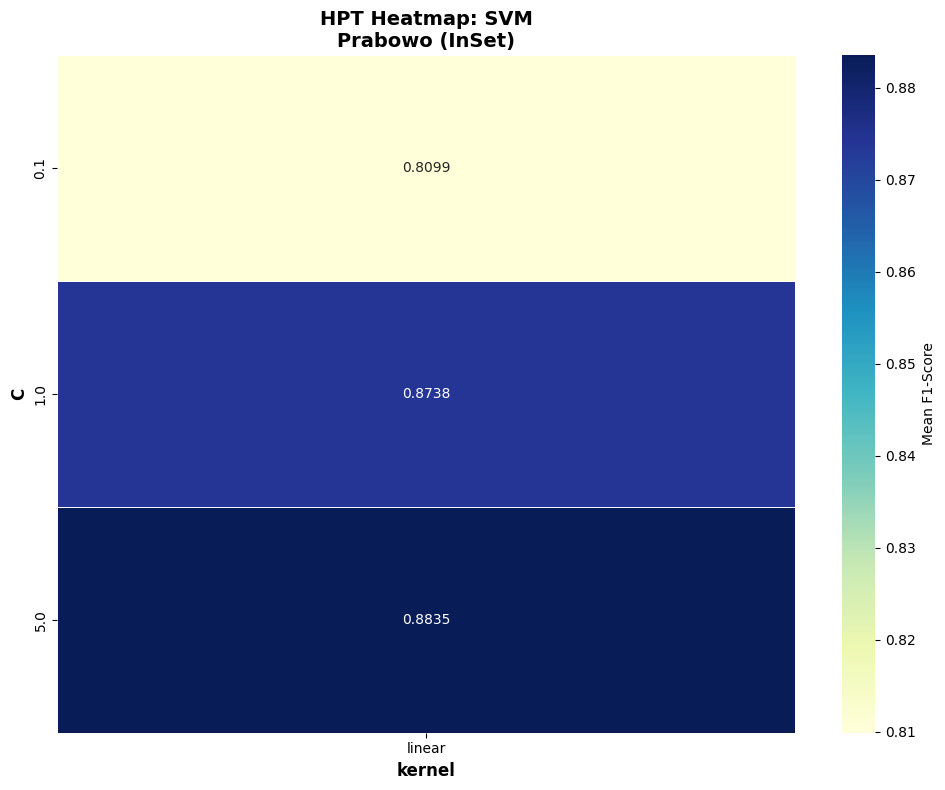

✓ Training completed

Prabowo (InSet) - SVM - EVALUATION RESULTS

Accuracy:  0.8866
Precision: 0.8866
Recall:    0.8866
F1-Score:  0.8866

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88       593
    Positive       0.89      0.90      0.89       668

    accuracy                           0.89      1261
   macro avg       0.89      0.89      0.89      1261
weighted avg       0.89      0.89      0.89      1261


--- Confusion Matrix ---
[[520  73]
 [ 70 598]]


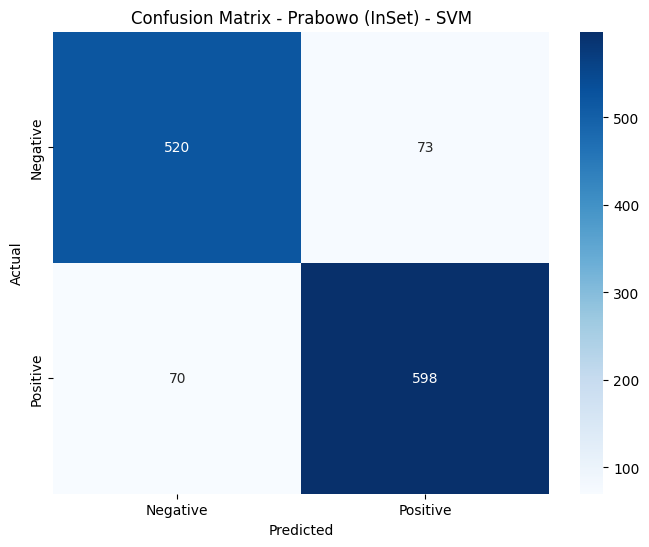


[3/5] Training Random Forest...

🔍 Running HPT for Random Forest ...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✓ Best params for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
✓ Best score: 0.8332

📊 Top 5 Configurations for Random Forest:
                                                          params  mean_test_score  std_test_score  rank_test_score
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}         0.833174        0.013935                1
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}         0.831927        0.014473                2
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}         0.831152        0.010618                3
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}         0.830059        0.014079                4
  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}         0.800511        0.012190                5


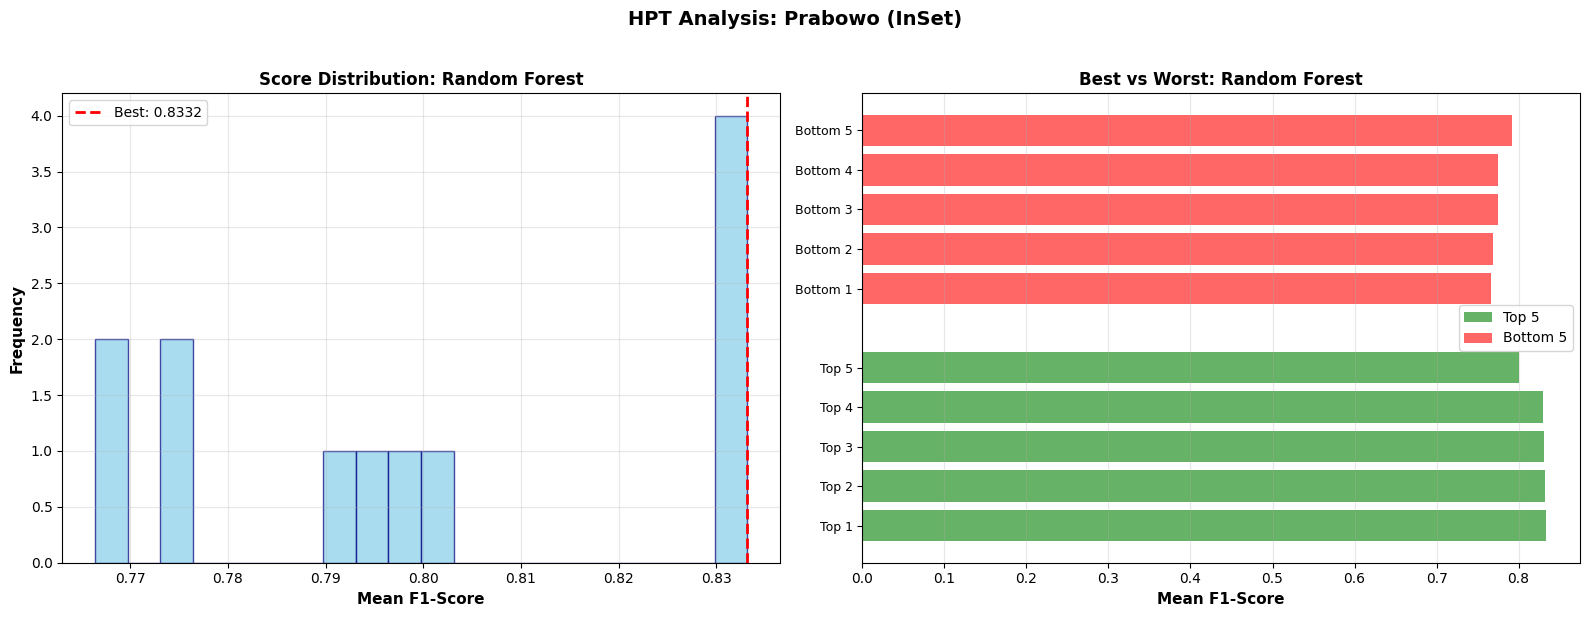

✓ Training completed

Prabowo (InSet) - Random Forest - EVALUATION RESULTS

Accuracy:  0.8279
Precision: 0.8278
Recall:    0.8279
F1-Score:  0.8278

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.82      0.81      0.82       593
    Positive       0.83      0.84      0.84       668

    accuracy                           0.83      1261
   macro avg       0.83      0.83      0.83      1261
weighted avg       0.83      0.83      0.83      1261


--- Confusion Matrix ---
[[480 113]
 [104 564]]


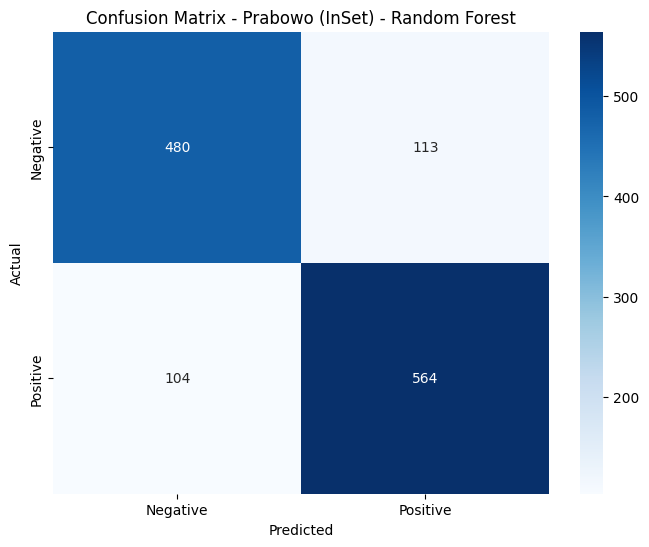


[4/5] Training IndoBERT...

[Training IndoBERT for Prabowo (InSet)]
Loading IndoBERT tokenizer and model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ Model loaded
Preparing datasets...
Training IndoBERT...


✓ Training completed
Evaluating IndoBERT...



IndoBERT Results:
Accuracy:  0.8969
Precision: 0.8974
Recall:    0.8969
F1-Score:  0.8970


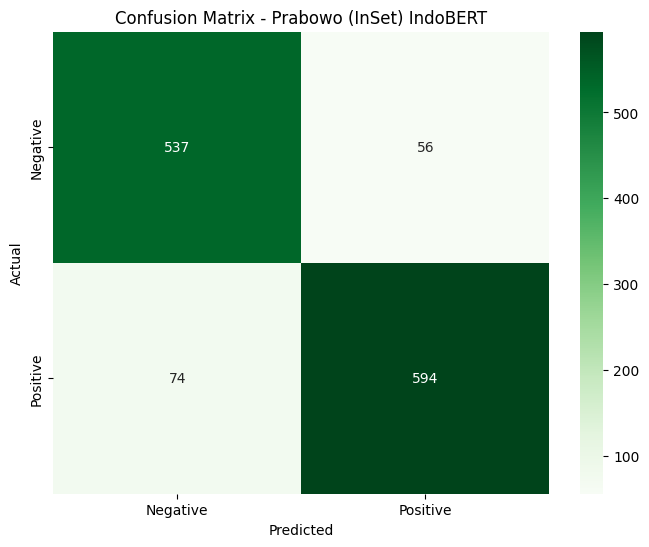


[5/5] Training Ensemble Model (Voting)...

🔍 Running HPT for Ensemble ...
Fitting 3 folds for each of 7 candidates, totalling 21 fits
✓ Best params for Ensemble: {'weights': [1, 2, 1]}
✓ Best score: 0.8827

📊 Top 5 Configurations for Ensemble:
                params  mean_test_score  std_test_score  rank_test_score
{'weights': [1, 2, 1]}         0.882698        0.010336                1
{'weights': [1, 2, 2]}         0.882514        0.009102                2
{'weights': [2, 2, 1]}         0.881095        0.010547                3
{'weights': [1, 1, 1]}         0.880521        0.010098                4
{'weights': [1, 1, 2]}         0.876706        0.009776                5


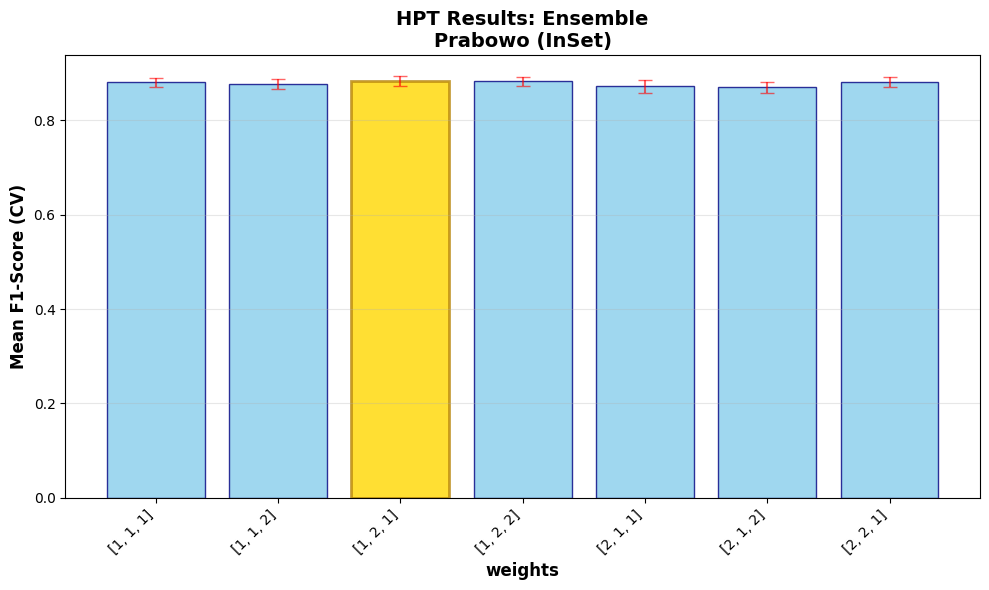

✓ Training completed

Prabowo (InSet) - Ensemble - EVALUATION RESULTS

Accuracy:  0.8850
Precision: 0.8850
Recall:    0.8850
F1-Score:  0.8849

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.88       593
    Positive       0.89      0.90      0.89       668

    accuracy                           0.89      1261
   macro avg       0.89      0.88      0.88      1261
weighted avg       0.89      0.89      0.88      1261


--- Confusion Matrix ---
[[515  78]
 [ 67 601]]


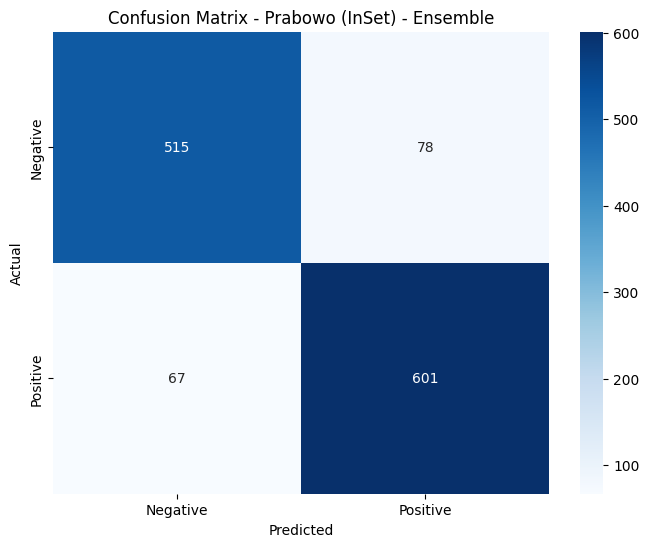


############################################################
VADER METHOD - PRABOWO
############################################################

PRABOWO - VADER Dataset:
Total samples: 4896
Label distribution: {1: 4472, 0: 424}

############################################################
TRAINING MODELS - Prabowo (VADER)
############################################################

[1/5] Training Multinomial Naive Bayes...

🔍 Running HPT for Naive Bayes ...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
✓ Best params for Naive Bayes: {'alpha': 0.1}
✓ Best score: 0.9124

📊 Top 5 Configurations for Naive Bayes:
        params  mean_test_score  std_test_score  rank_test_score
{'alpha': 0.1}         0.912416        0.004834                1
{'alpha': 0.5}         0.889446        0.002153                2
{'alpha': 1.0}         0.877480        0.001306                3
{'alpha': 2.0}         0.872729        0.000859                4


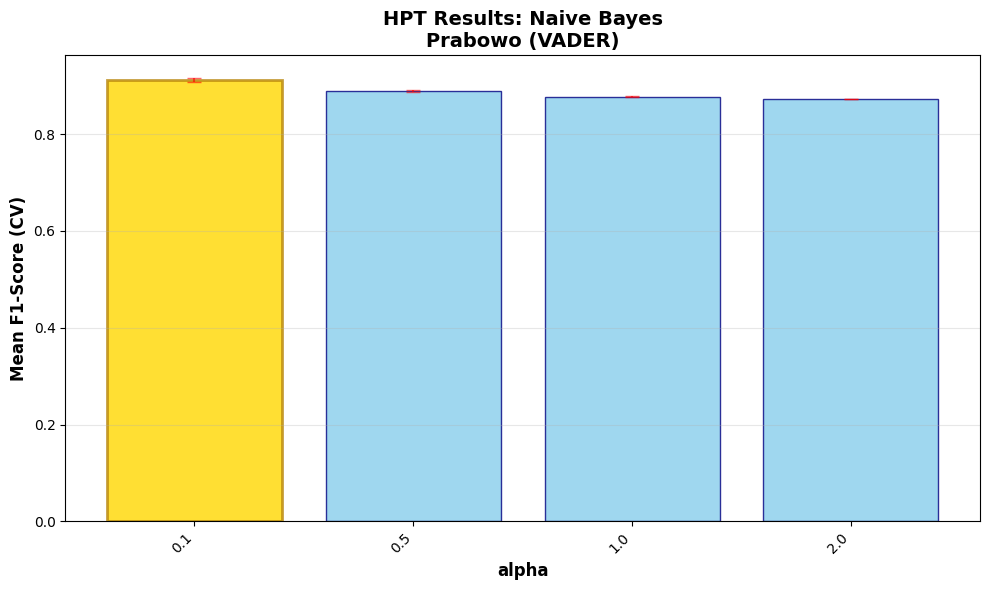

✓ Training completed

Prabowo (VADER) - Naive Bayes - EVALUATION RESULTS

Accuracy:  0.9337
Precision: 0.9247
Recall:    0.9337
F1-Score:  0.9232

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.74      0.36      0.49        85
    Positive       0.94      0.99      0.96       895

    accuracy                           0.93       980
   macro avg       0.84      0.68      0.73       980
weighted avg       0.92      0.93      0.92       980


--- Confusion Matrix ---
[[ 31  54]
 [ 11 884]]


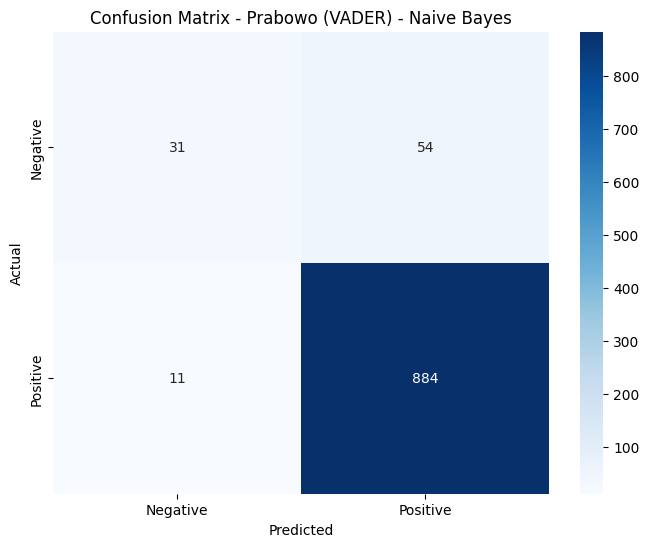


[2/5] Training SVM (Linear Kernel)...

🔍 Running HPT for SVM ...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
✓ Best params for SVM: {'C': 5, 'kernel': 'linear'}
✓ Best score: 0.9311

📊 Top 5 Configurations for SVM:
                        params  mean_test_score  std_test_score  rank_test_score
  {'C': 5, 'kernel': 'linear'}         0.931063        0.005868                1
  {'C': 1, 'kernel': 'linear'}         0.904690        0.002461                2
{'C': 0.1, 'kernel': 'linear'}         0.872106        0.000045                3


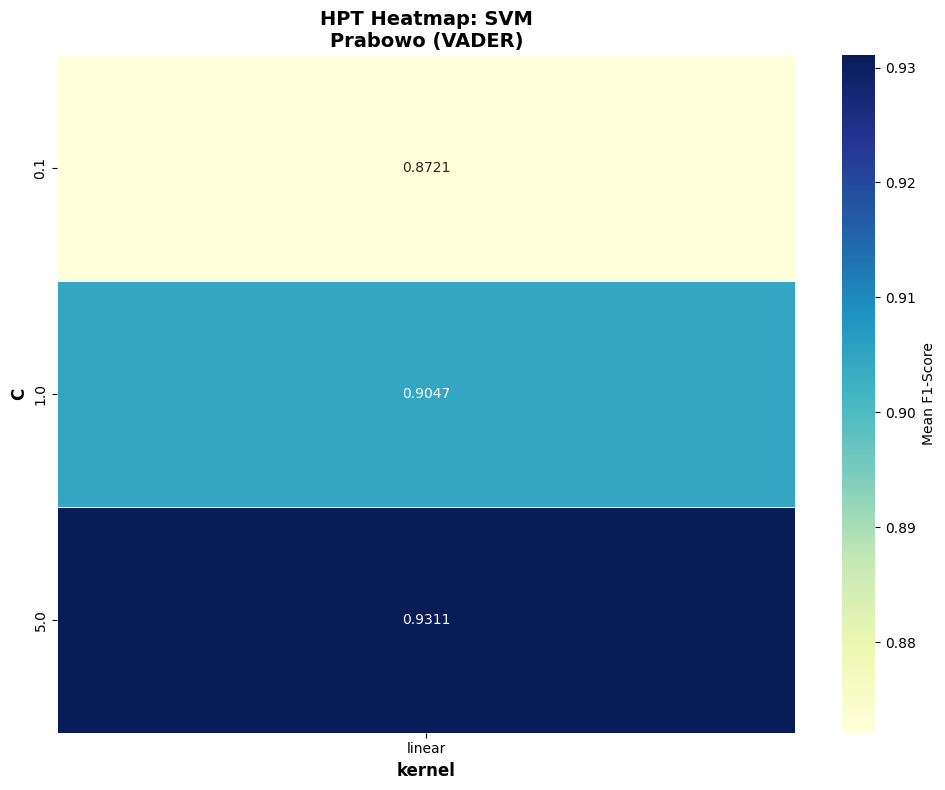

✓ Training completed

Prabowo (VADER) - SVM - EVALUATION RESULTS

Accuracy:  0.9531
Precision: 0.9496
Recall:    0.9531
F1-Score:  0.9492

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.83      0.58      0.68        85
    Positive       0.96      0.99      0.97       895

    accuracy                           0.95       980
   macro avg       0.90      0.78      0.83       980
weighted avg       0.95      0.95      0.95       980


--- Confusion Matrix ---
[[ 49  36]
 [ 10 885]]


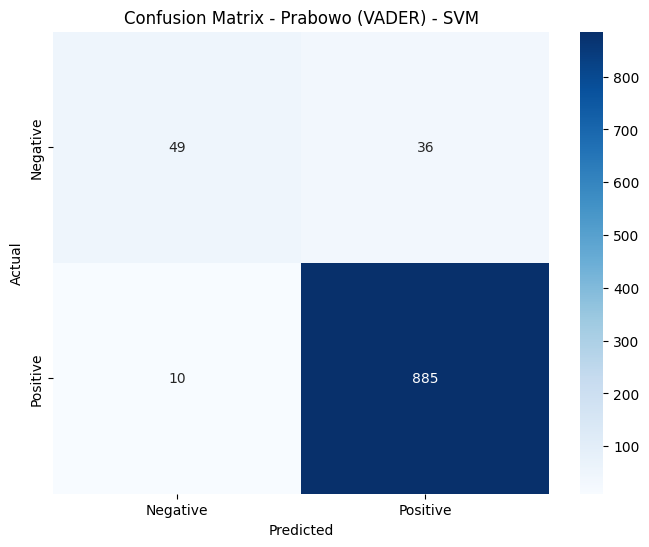


[3/5] Training Random Forest...

🔍 Running HPT for Random Forest ...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✓ Best params for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
✓ Best score: 0.9009

📊 Top 5 Configurations for Random Forest:
                                                          params  mean_test_score  std_test_score  rank_test_score
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}         0.900909        0.000993                1
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}         0.898519        0.002647                2
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}         0.897998        0.004292                3
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}         0.896907        0.001358                4
  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}         0.875816        0.000044                5


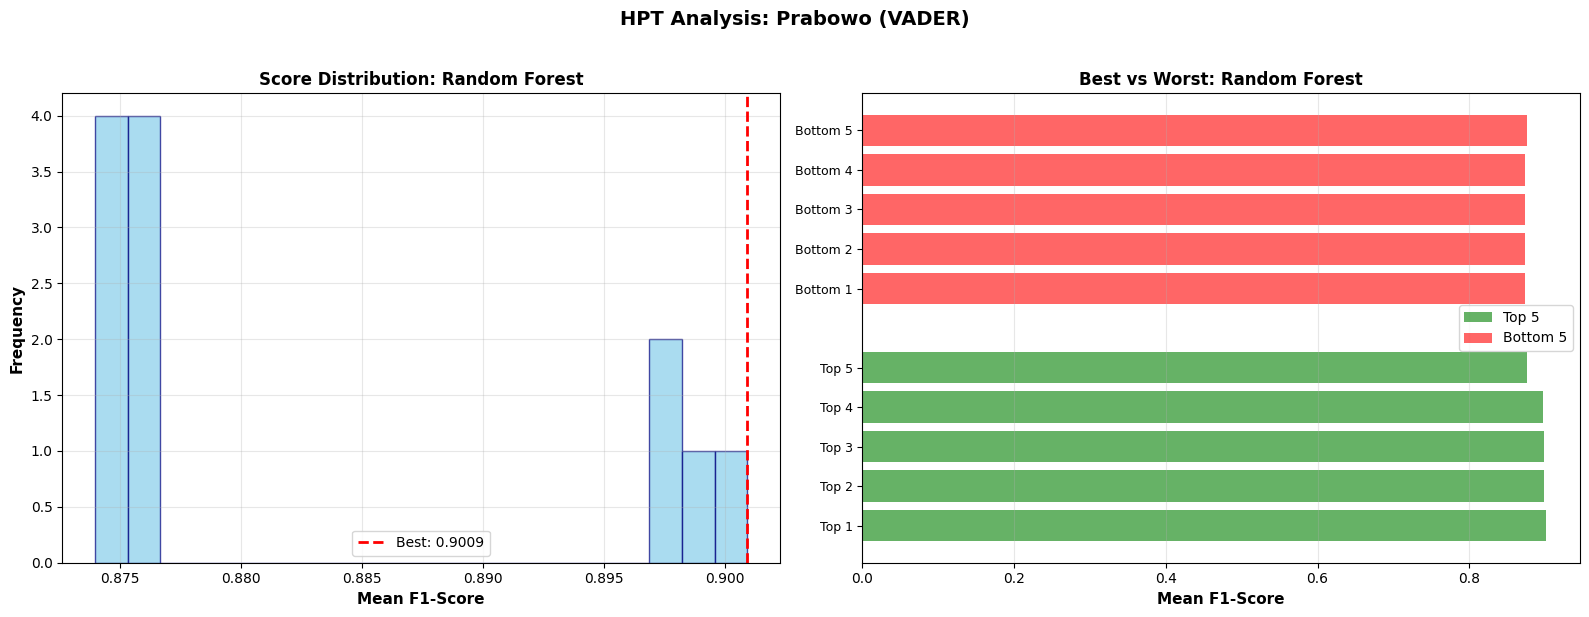

✓ Training completed

Prabowo (VADER) - Random Forest - EVALUATION RESULTS

Accuracy:  0.9276
Precision: 0.9329
Recall:    0.9276
F1-Score:  0.9030

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       1.00      0.16      0.28        85
    Positive       0.93      1.00      0.96       895

    accuracy                           0.93       980
   macro avg       0.96      0.58      0.62       980
weighted avg       0.93      0.93      0.90       980


--- Confusion Matrix ---
[[ 14  71]
 [  0 895]]


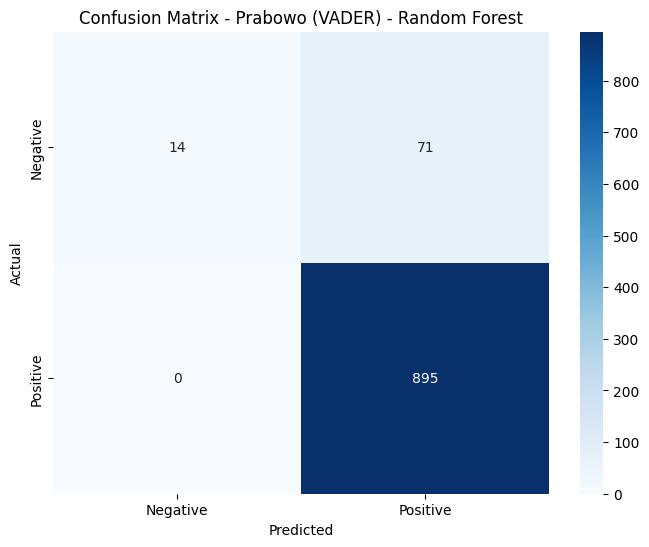


[4/5] Skipping IndoBERT (only for Indonesian text)...

[5/5] Training Ensemble Model (Voting)...

🔍 Running HPT for Ensemble ...
Fitting 3 folds for each of 7 candidates, totalling 21 fits
✓ Best params for Ensemble: {'weights': [1, 2, 1]}
✓ Best score: 0.9279

📊 Top 5 Configurations for Ensemble:
                params  mean_test_score  std_test_score  rank_test_score
{'weights': [1, 2, 1]}         0.927913        0.001513                1
{'weights': [2, 2, 1]}         0.925427        0.001385                2
{'weights': [1, 1, 1]}         0.920509        0.001571                3
{'weights': [1, 2, 2]}         0.920464        0.001519                4
{'weights': [2, 1, 1]}         0.919675        0.004019                5


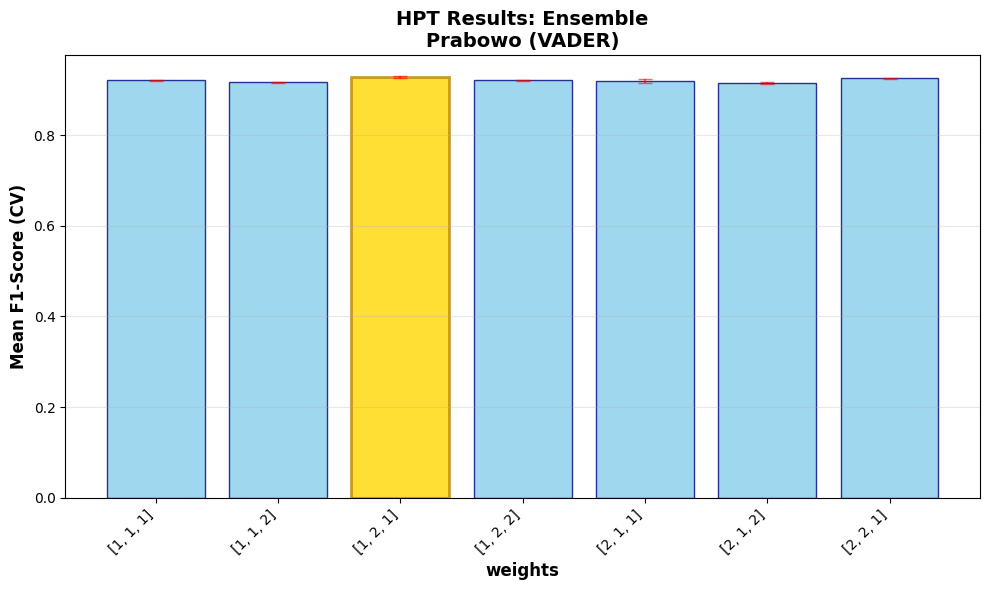

✓ Training completed

Prabowo (VADER) - Ensemble - EVALUATION RESULTS

Accuracy:  0.9408
Precision: 0.9370
Recall:    0.9408
F1-Score:  0.9299

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.86      0.38      0.52        85
    Positive       0.94      0.99      0.97       895

    accuracy                           0.94       980
   macro avg       0.90      0.69      0.75       980
weighted avg       0.94      0.94      0.93       980


--- Confusion Matrix ---
[[ 32  53]
 [  5 890]]


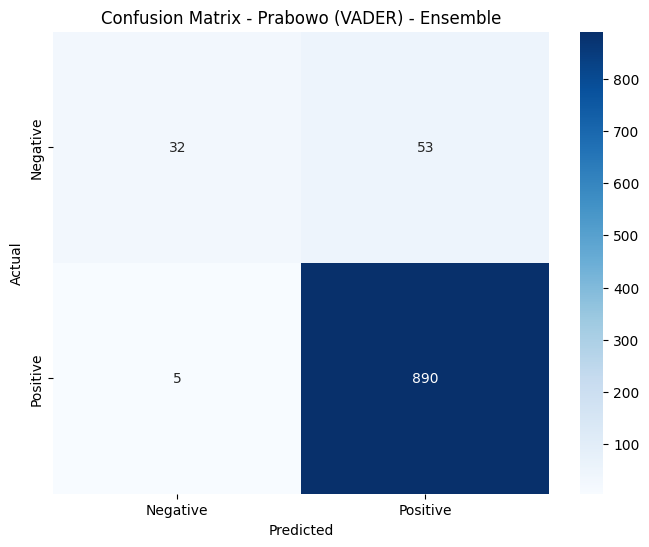


CLASSIFICATION MODELING COMPLETED FOR ALL CANDIDATES


In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import scipy.sparse as sp
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset

print("=" * 60)
print("CLASSIFICATION MODELING - PER CANDIDATE")
print("=" * 60)

# Load saved data (if needed)
def load_saved_splits(method='inset'):
    """Load previously saved train-test splits"""
    X_train = sp.load_npz(os.path.join(PROCESSED_DIR, f'X_train_{method}.npz'))
    X_test = sp.load_npz(os.path.join(PROCESSED_DIR, f'X_test_{method}.npz'))
    y_train = pd.read_csv(os.path.join(PROCESSED_DIR, f'y_train_{method}.csv'))['label'].values
    y_test = pd.read_csv(os.path.join(PROCESSED_DIR, f'y_test_{method}.csv'))['label'].values
    return X_train, X_test, y_train, y_test

# Evaluation Function
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate model and print metrics"""
    print(f"\n{'=' * 60}")
    print(f"{model_name} - EVALUATION RESULTS")
    print('=' * 60)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    print(f"\nAccuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    print(f"\n--- Classification Report ---")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], zero_division=0))
    
    print(f"\n--- Confusion Matrix ---")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    # Visualize Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    # Save confusion matrix
    safe_name = model_name.replace(' ', '_').lower()
    plt.savefig(os.path.join(PICTURES_DIR, f'confusion_matrix_{safe_name}.png'))
    plt.show()
    
    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# IndoBERT Dataset Class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        # Convert labels to numpy array to avoid pandas indexing issues
        self.labels = labels.values if hasattr(labels, 'values') else labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])
        
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# IndoBERT Training Function
def train_indobert(texts_train, y_train, texts_test, y_test, method_name='InSet'):
    """Train IndoBERT model"""
    print(f"\n[Training IndoBERT for {method_name}]")
    print("Loading IndoBERT tokenizer and model...")
    
    # Load pre-trained IndoBERT
    model_name = "indobenchmark/indobert-base-p1"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=2,
        ignore_mismatched_sizes=True
    )
    
    print("✓ Model loaded")
    
    # Prepare datasets
    print("Preparing datasets...")
    train_dataset = SentimentDataset(texts_train, y_train, tokenizer)
    test_dataset = SentimentDataset(texts_test, y_test, tokenizer)
    
    # Training arguments
    training_args = TrainingArguments(
        output_dir=os.path.join(PROCESSED_DIR, f'indobert_{method_name.lower()}'),
        num_train_epochs=3,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir=os.path.join(PROCESSED_DIR, 'logs'),
        
        # 👇👇 Ini WAJIB buat munculin progress
        logging_steps=10,
        logging_first_step=True, 
        report_to="none",
    
        eval_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="accuracy"
    )
    
    # Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=lambda p: {
            'accuracy': accuracy_score(p.label_ids, p.predictions.argmax(-1))
        }
    )
    
    # Train
    print("Training IndoBERT...")
    trainer.train()
    print("✓ Training completed")
    
    # Evaluate
    print("Evaluating IndoBERT...")
    predictions = trainer.predict(test_dataset)
    y_pred = predictions.predictions.argmax(-1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    print(f"\nIndoBERT Results:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {method_name} IndoBERT')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(os.path.join(PICTURES_DIR, f'confusion_matrix_{method_name.lower()}_indobert.png'))
    plt.show()
    
    result = {
        'model': f'{method_name} - IndoBERT',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    return result, model, tokenizer

# Training Function
def train_and_evaluate(X_train, X_test, y_train, y_test, texts_train=None, texts_test=None, method_name='InSet'):
    """Train multiple models and evaluate"""
    print(f"\n{'#' * 60}")
    print(f"TRAINING MODELS - {method_name}")
    print('#' * 60)
    
    results = []
    
    # 1. MULTINOMIAL NAIVE BAYES
    print("\n[1/5] Training Multinomial Naive Bayes...")
    nb_params = {'alpha': [0.1, 0.5, 1.0, 2.0]}
    nb_model, nb_cv_results = tune_model(MultinomialNB(), nb_params, X_train, y_train, "Naive Bayes", method_name)
    print("✓ Training completed")
    result_nb = evaluate_model(nb_model, X_test, y_test, f'{method_name} - Naive Bayes')
    results.append(result_nb)
    
    # 2. SVM (LINEAR KERNEL)
    print("\n[2/5] Training SVM (Linear Kernel)...")
    svm_params = {
        'C': [0.1, 1, 5],
        'kernel': ['linear'],
    }
    svm_model, svm_cv_results = tune_model(SVC(probability=True), svm_params, X_train, y_train, "SVM", method_name)
    print("✓ Training completed")
    result_svm = evaluate_model(svm_model, X_test, y_test, f'{method_name} - SVM')
    results.append(result_svm)
    
    # 3. RANDOM FOREST
    print("\n[3/5] Training Random Forest...")
    rf_params = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }
    rf_model, rf_cv_results = tune_model(RandomForestClassifier(random_state=42), rf_params, X_train, y_train, "Random Forest", method_name)
    print("✓ Training completed")
    result_rf = evaluate_model(rf_model, X_test, y_test, f'{method_name} - Random Forest')
    results.append(result_rf)
    
    # 4. INDOBERT (Only for InSet/Indonesian text)
    indobert_model = None
    indobert_tokenizer = None
    if 'InSet' in method_name and texts_train is not None:
        print("\n[4/5] Training IndoBERT...")
        result_indobert, indobert_model, indobert_tokenizer = train_indobert(
            texts_train, y_train, texts_test, y_test, method_name
        )
        results.append(result_indobert)
    else:
        print("\n[4/5] Skipping IndoBERT (only for Indonesian text)...")
    
    # 5. ENSEMBLE (VOTING CLASSIFIER)
    print(f"\n[5/5] Training Ensemble Model (Voting)...")
    # Param weights untuk HPT
    vote_params = {
        'weights': [
            [1,1,1],
            [2,1,1],
            [1,2,1],
            [1,1,2],
            [2,2,1],
            [2,1,2],
            [1,2,2]
        ]
    }
    
    # Voting classifier dengan estimators yang SUDAH TUNED
    base_ensemble = VotingClassifier(
        estimators=[
            ('nb', nb_model),
            ('svm', svm_model),
            ('rf', rf_model)
        ],
        voting='soft'
    )
    
    # Hyperparameter Tuning Ensemble
    ensemble_model, ensemble_cv_results = tune_model(
        base_ensemble,
        vote_params,
        X_train,
        y_train,
        "Ensemble",
        method_name
    )
    print("✓ Training completed")
    result_ensemble = evaluate_model(ensemble_model, X_test, y_test, f'{method_name} - Ensemble')
    results.append(result_ensemble)
    
    models_dict = {
        'nb': nb_model,
        'svm': svm_model,
        'rf': rf_model,
        'ensemble': ensemble_model
    }
    
    # Store CV results for HPT summary
    hpt_results_dict = {
        'nb': nb_cv_results,
        'svm': svm_cv_results,
        'rf': rf_cv_results,
        'ensemble': ensemble_cv_results
    }
    
    if indobert_model is not None:
        models_dict['indobert'] = (indobert_model, indobert_tokenizer)
    
    return results, models_dict, hpt_results_dict

# Helper function to load per-candidate data
def load_candidate_data(candidate_name, method='inset'):
    """Load data for a specific candidate"""
    if method == 'inset':
        path = os.path.join(LABELED_DIR, f'{candidate_name}_inset_binary.csv')
        label_col = 'Label_InSet'
        text_col = 'Tweet'
    else:
        path = os.path.join(LABELED_DIR, f'{candidate_name}_vader_binary.csv')
        label_col = 'Label_VADER'
        text_col = 'Tweet_English_Clean'
    
    if not os.path.exists(path):
        print(f"File not found: {path}")
        return None, None, None
    
    df = pd.read_csv(path)
    
    # Rename text column for consistency
    if text_col != 'Tweet':
        df['Tweet'] = df[text_col]
    
    X_text = df['Tweet'].fillna('').values
    y = df[label_col].values
    
    print(f"\n{candidate_name.upper()} - {method.upper()} Dataset:")
    print(f"Total samples: {len(df)}")
    print(f"Label distribution: {pd.Series(y).value_counts().to_dict()}")
    
    return X_text, y, df

# Storage for all results
all_results = []
all_models = {}
all_hpt_results = {}  # Store HPT results for summary

# Train for each candidate
candidates = ['anies', 'ganjar', 'prabowo']

for candidate in candidates:
    print("\n" + "=" * 80)
    print(f"TRAINING MODELS FOR: {candidate.upper()}")
    print("=" * 80)
    
    # === INSET (Indonesian) ===
    print(f"\n{'#' * 60}")
    print(f"INSET METHOD - {candidate.upper()}")
    print('#' * 60)
    
    X_text_inset, y_inset, df_cand_inset = load_candidate_data(candidate, method='inset')
    
    if X_text_inset is not None:
        # TF-IDF Vectorization
        from sklearn.feature_extraction.text import TfidfVectorizer
        tfidf_inset = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.95, sublinear_tf=True)
        X_tfidf_inset = tfidf_inset.fit_transform(X_text_inset)
        
        # Train-test split
        from sklearn.model_selection import train_test_split
        X_train_inset, X_test_inset, y_train_inset, y_test_inset = train_test_split(
            X_tfidf_inset, y_inset, test_size=0.2, random_state=42, stratify=y_inset
        )
        
        # Also split texts for IndoBERT
        texts_train_inset, texts_test_inset, _, _ = train_test_split(
            X_text_inset, y_inset, test_size=0.2, random_state=42, stratify=y_inset
        )
        
        # Train models
        method_name = f"{candidate.capitalize()} (InSet)"
        results_inset, models_inset, hpt_inset = train_and_evaluate(
            X_train_inset, X_test_inset, y_train_inset, y_test_inset,
            texts_train_inset, texts_test_inset,
            method_name=method_name
        )
        
        all_results.extend(results_inset)
        all_models[f'{candidate}_inset'] = models_inset
        all_hpt_results[f'{candidate}_inset'] = hpt_inset
    
    # === VADER (English) ===
    print(f"\n{'#' * 60}")
    print(f"VADER METHOD - {candidate.upper()}")
    print('#' * 60)
    
    X_text_vader, y_vader, df_cand_vader = load_candidate_data(candidate, method='vader')
    
    if X_text_vader is not None:
        # TF-IDF Vectorization
        tfidf_vader = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.95, sublinear_tf=True)
        X_tfidf_vader = tfidf_vader.fit_transform(X_text_vader)
        
        # Train-test split
        X_train_vader, X_test_vader, y_train_vader, y_test_vader = train_test_split(
            X_tfidf_vader, y_vader, test_size=0.2, random_state=42, stratify=y_vader
        )
        
        # Train models (no IndoBERT for English)
        method_name = f"{candidate.capitalize()} (VADER)"
        results_vader, models_vader, hpt_vader = train_and_evaluate(
            X_train_vader, X_test_vader, y_train_vader, y_test_vader,
            method_name=method_name
        )
        
        all_results.extend(results_vader)
        all_models[f'{candidate}_vader'] = models_vader
        all_hpt_results[f'{candidate}_vader'] = hpt_vader

print("\n" + "=" * 80)
print("CLASSIFICATION MODELING COMPLETED FOR ALL CANDIDATES")
print("=" * 80)

## Hyperparameter Summary

HYPERPARAMETER TUNING SUMMARY

📊 Complete HPT Summary Table:
Candidate Method    Model  Best_Score  Std_Dev                                                      Best_Params  Total_Configs
    Anies  INSET       NB    0.809923 0.006959                                                   {'alpha': 2.0}              4
    Anies  INSET      SVM    0.883480 0.004061                                     {'C': 5, 'kernel': 'linear'}              3
    Anies  INSET       RF    0.826353 0.008897 {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}             12
    Anies  INSET ENSEMBLE    0.883264 0.006772                                           {'weights': [1, 2, 1]}              7
    Anies  VADER       NB    0.834779 0.003805                                                   {'alpha': 0.1}              4
    Anies  VADER      SVM    0.887293 0.002453                                     {'C': 5, 'kernel': 'linear'}              3
    Anies  VADER       RF    0.828151 0.003423 {'m

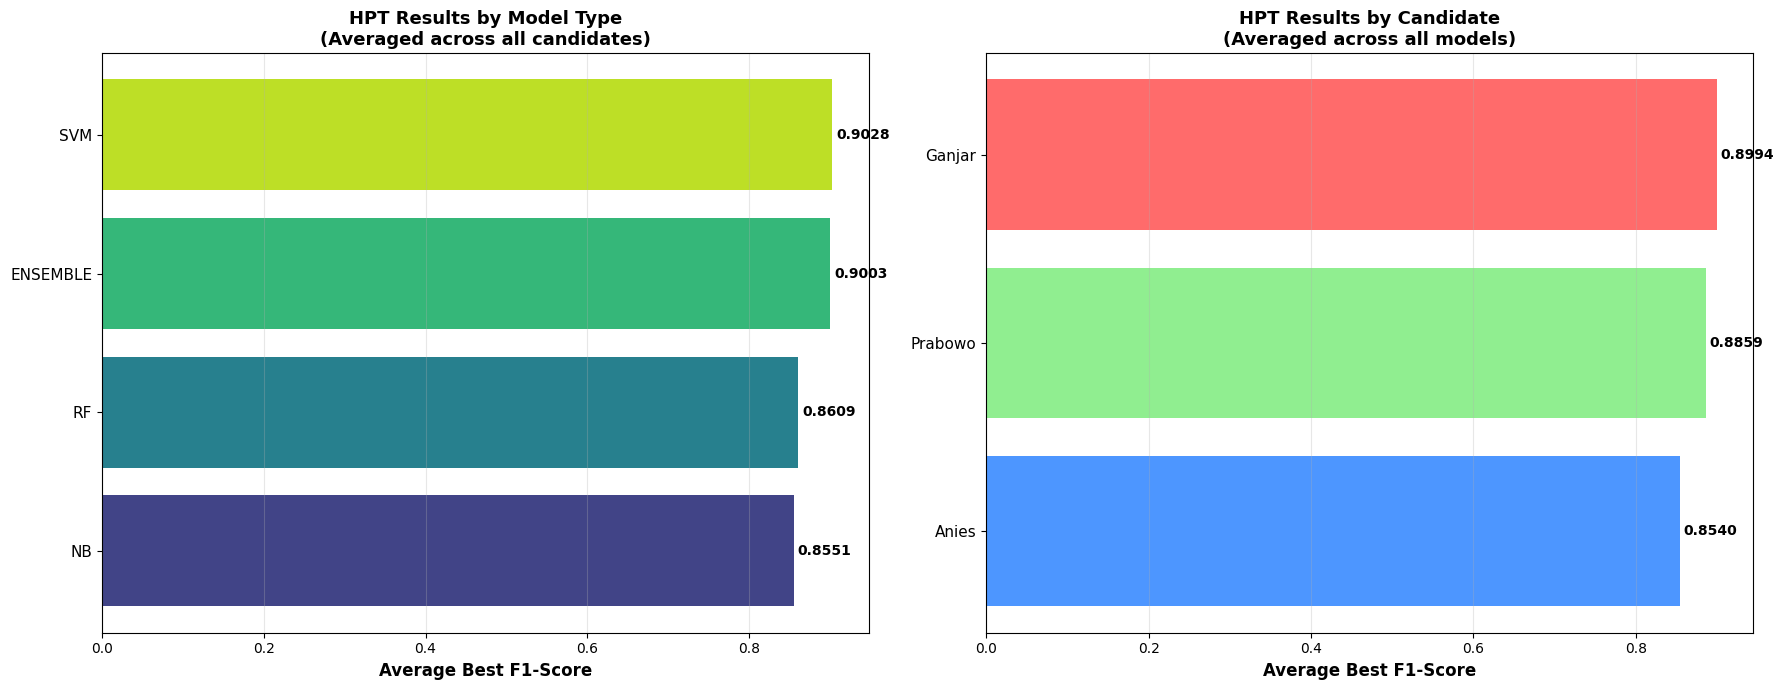


📊 Generating detailed HPT heatmap...


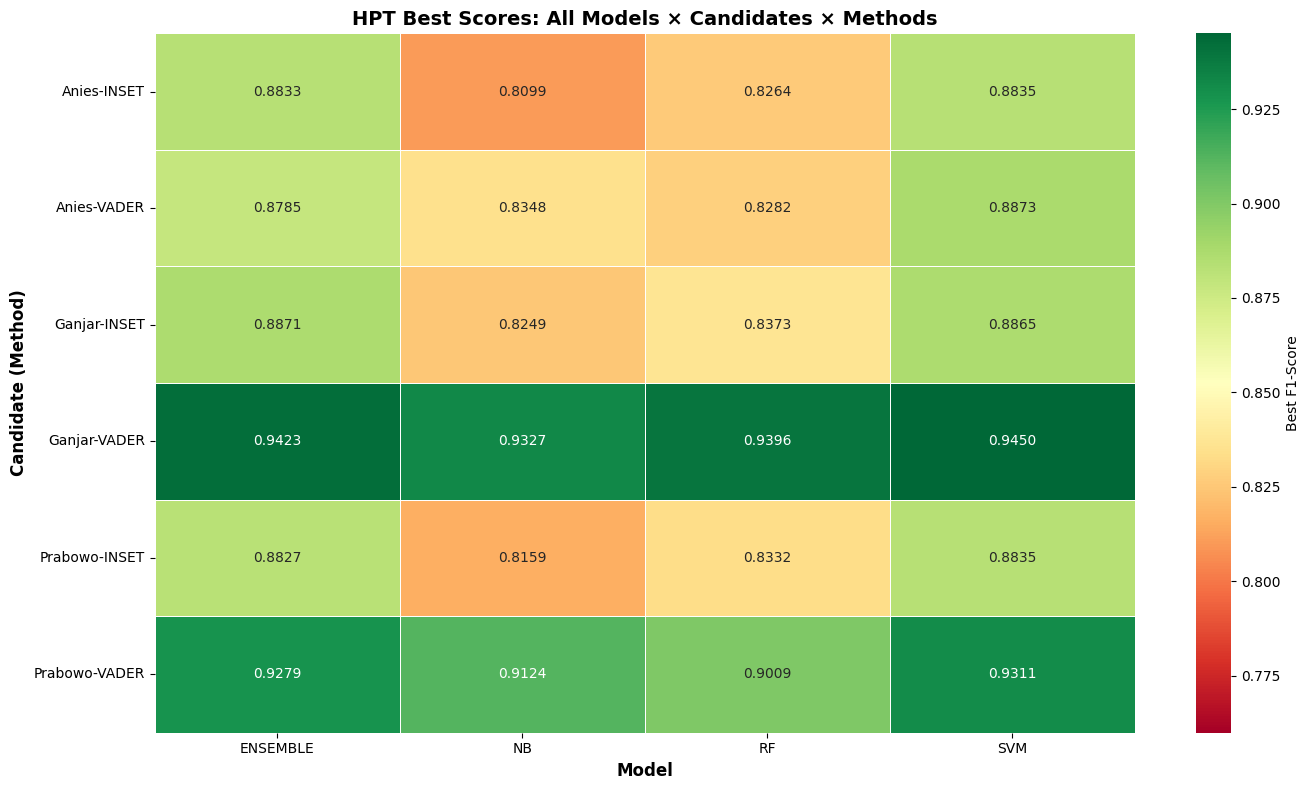


✓ HPT Summary visualizations completed!


In [30]:
# HPT Summary Report
print("=" * 80)
print("HYPERPARAMETER TUNING SUMMARY")
print("=" * 80)

hpt_summary_data = []

for key, hpt_dict in all_hpt_results.items():
    candidate_method = key  # e.g., 'anies_inset'
    
    for model_name, cv_results in hpt_dict.items():
        # Get best result
        best_idx = cv_results['mean_test_score'].idxmax()
        best_row = cv_results.loc[best_idx]
        
        # Extract parameters
        param_cols = [col for col in cv_results.columns if col.startswith('param_')]
        best_params = {col.replace('param_', ''): best_row[col] for col in param_cols}
        
        hpt_summary_data.append({
            'Candidate': candidate_method.split('_')[0].capitalize(),
            'Method': candidate_method.split('_')[1].upper(),
            'Model': model_name.upper(),
            'Best_Score': best_row['mean_test_score'],
            'Std_Dev': best_row['std_test_score'],
            'Best_Params': str(best_params),
            'Total_Configs': len(cv_results)
        })

# Create DataFrame
df_hpt_summary = pd.DataFrame(hpt_summary_data)

print("\n📊 Complete HPT Summary Table:")
print(df_hpt_summary.to_string(index=False))

# Save to CSV
hpt_summary_path = os.path.join(PROCESSED_DIR, 'hpt_summary.csv')
df_hpt_summary.to_csv(hpt_summary_path, index=False)
print(f"\n✓ HPT Summary saved to: {hpt_summary_path}")

# Visualize HPT Summary
print("\n📈 Generating HPT Comparison Visualizations...")

# Plot 1: Best scores across all models and candidates
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# By Model Type
ax1 = axes[0]
model_scores = df_hpt_summary.groupby('Model')['Best_Score'].mean().sort_values(ascending=True)
colors_model = plt.cm.viridis(np.linspace(0.2, 0.9, len(model_scores)))
bars1 = ax1.barh(range(len(model_scores)), model_scores.values, color=colors_model)
ax1.set_yticks(range(len(model_scores)))
ax1.set_yticklabels(model_scores.index, fontsize=11)
ax1.set_xlabel('Average Best F1-Score', fontsize=12, fontweight='bold')
ax1.set_title('HPT Results by Model Type\n(Averaged across all candidates)', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars1, model_scores.values)):
    ax1.text(val + 0.005, i, f'{val:.4f}', va='center', fontsize=10, fontweight='bold')

# By Candidate
ax2 = axes[1]
cand_scores = df_hpt_summary.groupby('Candidate')['Best_Score'].mean().sort_values(ascending=True)
colors_cand = ['#4D96FF', '#90EE90', '#FF6B6B']
bars2 = ax2.barh(range(len(cand_scores)), cand_scores.values, color=colors_cand)
ax2.set_yticks(range(len(cand_scores)))
ax2.set_yticklabels(cand_scores.index, fontsize=11)
ax2.set_xlabel('Average Best F1-Score', fontsize=12, fontweight='bold')
ax2.set_title('HPT Results by Candidate\n(Averaged across all models)', fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars2, cand_scores.values)):
    ax2.text(val + 0.005, i, f'{val:.4f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(PICTURES_DIR, 'hpt_summary_comparison.png'), dpi=150, bbox_inches='tight')
plt.show()

# Plot 2: Detailed heatmap of all combinations
print("\n📊 Generating detailed HPT heatmap...")

pivot_hpt = df_hpt_summary.pivot_table(
    values='Best_Score',
    index=['Candidate', 'Method'],
    columns='Model',
    aggfunc='mean'
)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_hpt, annot=True, fmt='.4f', cmap='RdYlGn', 
            linewidths=0.5, cbar_kws={'label': 'Best F1-Score'},
            vmin=pivot_hpt.min().min()-0.05, vmax=pivot_hpt.max().max())
plt.title('HPT Best Scores: All Models × Candidates × Methods', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Candidate (Method)', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(PICTURES_DIR, 'hpt_detailed_heatmap.png'), dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ HPT Summary visualizations completed!")

## Model Comparison

MODEL COMPARISON SUMMARY - PER CANDIDATE

--- Performance Metrics (All Candidates) ---
                          model  accuracy  precision   recall       f1
    Anies (InSet) - Naive Bayes  0.808561   0.820907 0.808561 0.809448
            Anies (InSet) - SVM  0.890012   0.889877 0.890012 0.889906
  Anies (InSet) - Random Forest  0.828181   0.827754 0.828181 0.827781
       Anies (InSet) - IndoBERT  0.904281   0.904334 0.904281 0.904304
       Anies (InSet) - Ensemble  0.888228   0.888097 0.888228 0.888131
    Anies (VADER) - Naive Bayes  0.857143   0.851434 0.857143 0.849200
            Anies (VADER) - SVM  0.907692   0.906474 0.907692 0.906923
  Anies (VADER) - Random Forest  0.860073   0.858625 0.860073 0.847836
       Anies (VADER) - Ensemble  0.905495   0.903973 0.905495 0.902010
   Ganjar (InSet) - Naive Bayes  0.852162   0.852451 0.852162 0.849982
           Ganjar (InSet) - SVM  0.892608   0.892608 0.892608 0.892608
 Ganjar (InSet) - Random Forest  0.867503   0.870542 0.867503

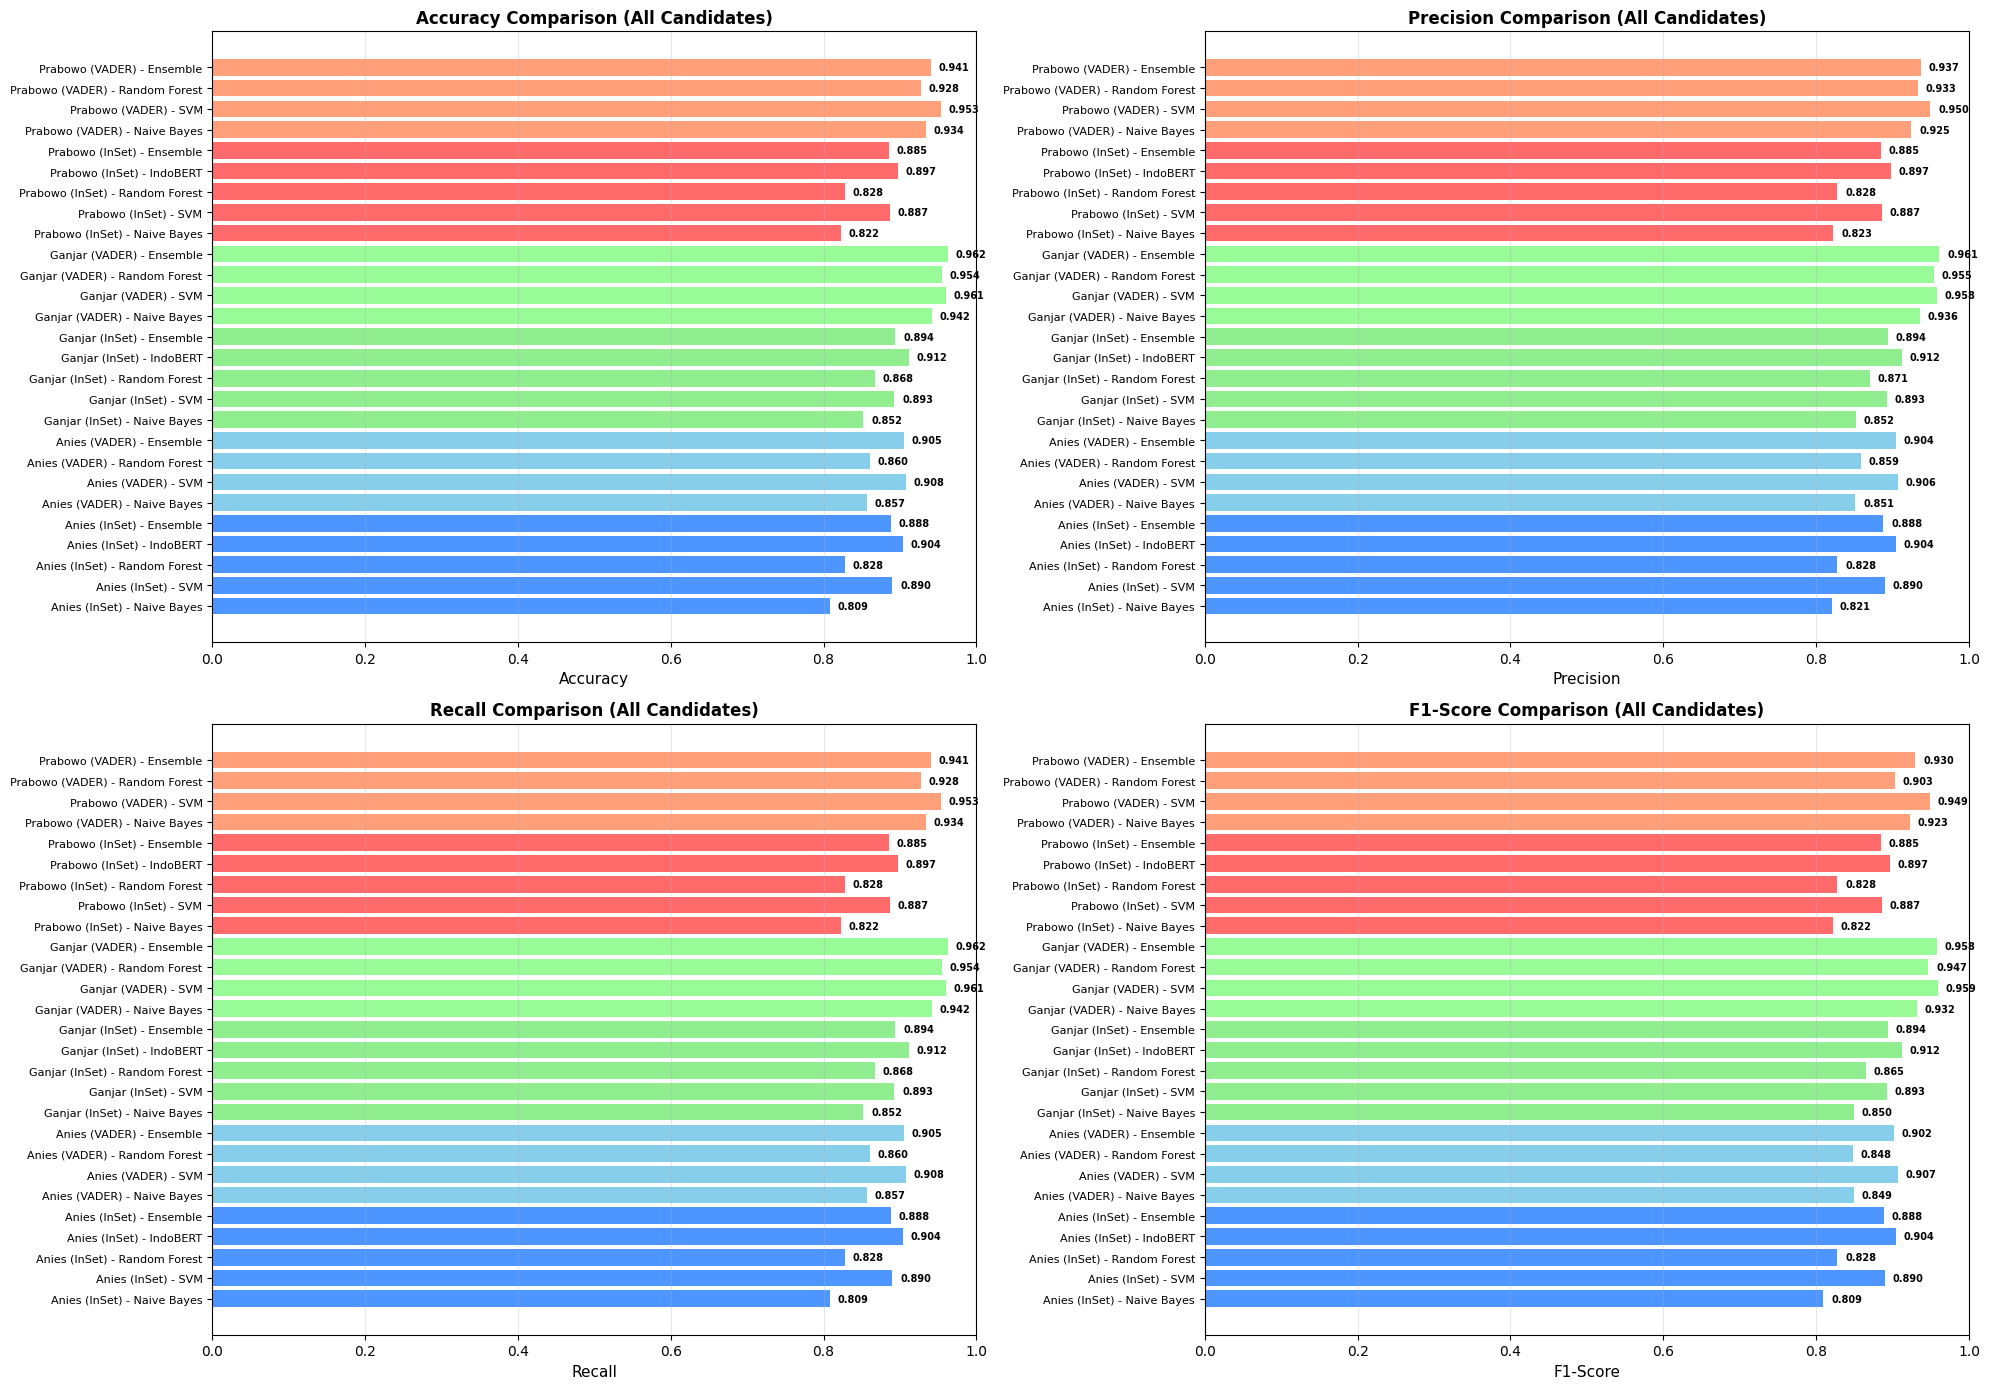


BEST MODEL OVERALL
Model: Ganjar (VADER) - SVM
Accuracy:  0.9606
Precision: 0.9584
Recall:    0.9606
F1-Score:  0.9590

BEST MODEL PER CANDIDATE

ANIES:
  Best Model: Anies (VADER) - SVM
  F1-Score: 0.9069 | Accuracy: 0.9077

GANJAR:
  Best Model: Ganjar (VADER) - SVM
  F1-Score: 0.9590 | Accuracy: 0.9606

PRABOWO:
  Best Model: Prabowo (VADER) - SVM
  F1-Score: 0.9492 | Accuracy: 0.9531

✓ Results saved to /kaggle/working/processed/model_results.csv


In [31]:
# Compare all models
print("=" * 80)
print("MODEL COMPARISON SUMMARY - PER CANDIDATE")
print("=" * 80)

# Create DataFrame from all results
df_results = pd.DataFrame(all_results)

print("\n--- Performance Metrics (All Candidates) ---")
print(df_results.to_string(index=False))

# Group by candidate
print("\n" + "=" * 80)
print("PERFORMANCE BY CANDIDATE")
print("=" * 80)

for candidate in ['Anies', 'Ganjar', 'Prabowo']:
    df_cand = df_results[df_results['model'].str.contains(candidate, case=False)]
    if len(df_cand) > 0:
        print(f"\n### {candidate.upper()} ###")
        print(df_cand[['model', 'accuracy', 'precision', 'recall', 'f1']].to_string(index=False))

# Visualize comparison - Per Candidate
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
metrics = ['accuracy', 'precision', 'recall', 'f1']
titles = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 2, idx % 2]
    
    df_plot = df_results[['model', metric]].copy()
    
    # Color by candidate and method
    def get_color(model_name):
        if 'Anies' in model_name:
            return '#4D96FF' if 'InSet' in model_name else '#87CEEB'
        elif 'Ganjar' in model_name:
            return '#90EE90' if 'InSet' in model_name else '#98FB98'
        elif 'Prabowo' in model_name:
            return '#FF6B6B' if 'InSet' in model_name else '#FFA07A'
        return 'gray'
    
    colors = [get_color(m) for m in df_plot['model']]
    
    bars = ax.barh(df_plot['model'], df_plot[metric], color=colors)
    ax.set_xlabel(title, fontsize=11)
    ax.set_xlim(0, 1)
    ax.set_title(f'{title} Comparison (All Candidates)', fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    ax.tick_params(axis='y', labelsize=8)
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', 
                ha='left', va='center', fontsize=7, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(PICTURES_DIR, 'model_comparison_per_candidate.png'), dpi=150, bbox_inches='tight')
plt.show()

# Find best model overall
best_model = df_results.loc[df_results['f1'].idxmax()]
print(f"\n{'=' * 80}")
print("BEST MODEL OVERALL")
print('=' * 80)
print(f"Model: {best_model['model']}")
print(f"Accuracy:  {best_model['accuracy']:.4f}")
print(f"Precision: {best_model['precision']:.4f}")
print(f"Recall:    {best_model['recall']:.4f}")
print(f"F1-Score:  {best_model['f1']:.4f}")

# Best model per candidate
print(f"\n{'=' * 80}")
print("BEST MODEL PER CANDIDATE")
print('=' * 80)

for candidate in ['Anies', 'Ganjar', 'Prabowo']:
    df_cand = df_results[df_results['model'].str.contains(candidate, case=False)]
    if len(df_cand) > 0:
        best_cand = df_cand.loc[df_cand['f1'].idxmax()]
        print(f"\n{candidate.upper()}:")
        print(f"  Best Model: {best_cand['model']}")
        print(f"  F1-Score: {best_cand['f1']:.4f} | Accuracy: {best_cand['accuracy']:.4f}")

# Save results to CSV
df_results.to_csv(os.path.join(PROCESSED_DIR, 'model_results.csv'), index=False)
print(f"\n✓ Results saved to {os.path.join(PROCESSED_DIR, 'model_results.csv')}")